 Thiago de Oliveira da Costa - 2020005

GitHub: https://github.com/CCT-College-Dublin/project-ThBrasilDaCosta

 # Car Crash Fault Prediction

## CRISP-DM Data Understanding

In [1]:
#!pip install scikit-learn --upgrade --user

In [2]:
#!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn -U --user

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)




###### Loading Data Frame:

In [4]:
crashes_data = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv", low_memory=False)

In [5]:
crashes_data.shape

(172105, 43)

In [6]:
crashes_data.head(10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,1C3C3E2F-9A23-4ED0-9BB3-B6C370D99C37,DISABLING,THREE OCLOCK,TWO OCLOCK,PASSENGER CAR,MAKING LEFT TURN,East,South,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,0483CE47-E0FC-4BCA-BAB0-B7541820FEE6,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,ACCELERATING,North,North,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,4406AA84-07F8-45F4-88A2-09AD89AC9AAF,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,East,East,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,NaN,NaN,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,CA,148FAA0F-4EBB-43E8-9339-BBED3F245751,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,West,North,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"
5,MCP295200DV,230032956,Montgomery County Police,Property Damage Crash,07/11/2023 07:40:00 AM,County,WAYNE AVE,County,ALLEY,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,800B57CA-3277-4DC5-8C8D-457AF042F683,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,E9504EBF-592D-4E6D-B28E-07B8773E2530,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,TRANSIT BUS,STOPPED IN TRAFFIC LANE,East,East,30,No,No,2016,GILL,BUS,NO MISUSE,38.994498,-77.027334,"(38.99449791, -77.02733407)"
6,MCP33510013,230033282,Montgomery County Police,Property Damage Crash,07/12/2023 08:28:00 PM,Maryland (State),COLESVILLE RD,US (State),COLESVILLE RD,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DUSK,NO CONTROLS,NONE DETECTED,NaN,3F9D8C7E-6F06-45DC-8250-E30A8ACC5F2A,Yes,NO APPARENT INJURY,"AN

###### Column names:

In [7]:
crashes_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

###### Column data types:

In [8]:
crashes_data.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

##### Missing Values:

In [9]:
crashes_data.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16973
Road Name                          15937
Cross-Street Type                  17006
Cross-Street Name                  15951
Off-Road Description              156170
Municipality                      152979
Related Non-Motorist              166642
Collision Type                       585
Weather                            13354
Surface Condition                  20118
Light                               1445
Traffic Control                    25469
Driver Substance Abuse             31324
Non-Motorist Substance Abuse      167788
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140746
Driver Distracted By                   0
Drivers License 

In [10]:
num_col = crashes_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = crashes_data[num_col].corr()

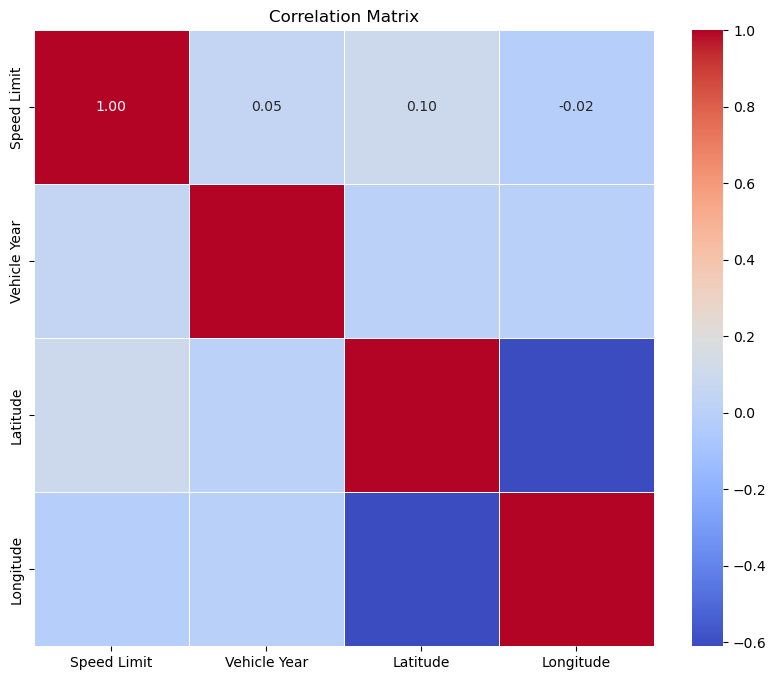

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [12]:
crashes_data.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,172105.000000,172105.000000,172105.000000,172105.000000
mean,32.549752,1966.306946,39.083119,-77.112343
std,11.059987,340.615468,0.072032,0.098571
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024417,-77.189327
50%,35.000000,2011.000000,39.074933,-77.105412
75%,40.000000,2015.000000,39.139742,-77.039592
max,75.000000,9999.000000,39.990414,-75.527708


## CRISP-DM Data Preparation

## Data Cleaning
##### Dropping unecessary columns and rows:

In [13]:
crashes_data = crashes_data.drop(['Report Number','Crash Date/Time','Local Case Number', 
                                  'Agency Name','Route Type', 'Road Name', 'Cross-Street Type',
                                  'Cross-Street Name', 'Off-Road Description','Municipality',
                                  'Person ID', 'Drivers License State','Vehicle ID',
                                  'Vehicle Continuing Dir', 'Vehicle Going Dir','Latitude',
                                  'Longitude', 'Location','Circumstance',
                                  'Vehicle First Impact Location','Vehicle Second Impact Location',
                                  'Vehicle Year','Vehicle Make','Vehicle Model'
                                 ], axis=1).copy()

In [14]:
crashes_data.shape

(172105, 19)

In [15]:
crashes_data.dtypes

ACRS Report Type                object
Related Non-Motorist            object
Collision Type                  object
Weather                         object
Surface Condition               object
Light                           object
Traffic Control                 object
Driver Substance Abuse          object
Non-Motorist Substance Abuse    object
Driver At Fault                 object
Injury Severity                 object
Driver Distracted By            object
Vehicle Damage Extent           object
Vehicle Body Type               object
Vehicle Movement                object
Speed Limit                      int64
Driverless Vehicle              object
Parked Vehicle                  object
Equipment Problems              object
dtype: object

In [16]:
crashes_data.head()

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
0,Property Damage Crash,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,Yes,NO APPARENT INJURY,UNKNOWN,SUPERFICIAL,PASSENGER CAR,PARKING,15,No,No,UNKNOWN
1,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MAKING LEFT TURN,40,No,No,NO MISUSE
2,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PICKUP TRUCK,ACCELERATING,35,No,No,NO MISUSE
3,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,FUNCTIONAL,PASSENGER CAR,STARTING FROM LANE,40,No,No,NO MISUSE
4,Property Damage Crash,NaN,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,35,No,No,NO MISUSE


In [17]:
crashes_data.shape

(172105, 19)

In [18]:
crashes_data.columns

Index(['ACRS Report Type', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle',
       'Equipment Problems'],
      dtype='object')

##### Identifying duplicated rows:

In [19]:
crashes_data.loc[crashes_data.duplicated()]

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
118,Property Damage Crash,NaN,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NaN,NaN,Unknown,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,No,NO MISUSE
198,Injury Crash,NaN,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,POSSIBLE INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,No,NO MISUSE
205,Property Damage Crash,NaN,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,Unknown,NO APPARENT INJURY,UNKNOWN,FUNCTIONAL,(SPORT) UTILITY VEHICLE,UNKNOWN,35,No,No,NO MISUSE
212,Injury Crash,NaN,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,POSSIBLE INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,No,NO MISUSE
312,Property Damage Crash,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,SLOWING OR STOPPING,35,No,No,NO MISUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172097,Property Damage Crash,NaN,SAME DIR REAR END,CLEAR,NaN,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,PASSENGER CAR,STOPPED IN TRAFFIC LANE,0,No,No,NO MISUSE
172098,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,25,No,No,NO MISUSE
172099,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,25,No,No,NO MISUSE
172101,Property Damage Crash,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NaN,NaN,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,DISABLING,PASSENGER CAR,SLOWING OR STOPPING,35,No,No,NO MISUSE


In [20]:
crashes_data = crashes_data.loc[~crashes_data.duplicated(subset=[
        'ACRS Report Type', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Driver At Fault', 'Injury Severity',
       'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle','Equipment Problems'])].reset_index(drop=True).copy()

In [21]:
crashes_data.shape

(135968, 19)

In [22]:
crashes_data.head(3)

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
0,Property Damage Crash,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,Yes,NO APPARENT INJURY,UNKNOWN,SUPERFICIAL,PASSENGER CAR,PARKING,15,No,No,UNKNOWN
1,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MAKING LEFT TURN,40,No,No,NO MISUSE
2,Property Damage Crash,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PICKUP TRUCK,ACCELERATING,35,No,No,NO MISUSE


##### Identifying missing values:

In [23]:
crashes_data.isna().sum()

ACRS Report Type                     0
Related Non-Motorist            130619
Collision Type                     580
Weather                          12581
Surface Condition                18763
Light                             1415
Traffic Control                  22811
Driver Substance Abuse           28115
Non-Motorist Substance Abuse    131764
Driver At Fault                      0
Injury Severity                      0
Driver Distracted By                 0
Vehicle Damage Extent              315
Vehicle Body Type                 2540
Vehicle Movement                   382
Speed Limit                          0
Driverless Vehicle                   0
Parked Vehicle                       0
Equipment Problems               30462
dtype: int64

##### Handling missing values:

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
features = ['Collision Type', 'Weather', 'Light', 'Traffic Control', 'Driver Substance Abuse',
            'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Equipment Problems' ]

imputer = SimpleImputer(strategy='most_frequent')

crashes_data[features] = imputer.fit_transform(crashes_data[features])

In [26]:
crashes_data_mapping = crashes_data.groupby('Weather')['Surface Condition'].agg(lambda x: x.mode().iloc[0]).to_dict()

def handle_missing(row):
    if pd.isnull(row['Surface Condition']) and row['Weather'] in crashes_data_mapping:
        return crashes_data_mapping[row['Weather']]
    else:
        return row['Surface Condition']
    
crashes_data['Surface Condition'] = crashes_data.apply(handle_missing,axis=1)

In [27]:
nan_feat = ['Related Non-Motorist','Non-Motorist Substance Abuse']
imp_const_nan = SimpleImputer(strategy='constant', fill_value = 'NON')
crashes_data[nan_feat] = imp_const_nan.fit_transform(crashes_data[nan_feat])

In [28]:
crashes_data.isna().sum()

ACRS Report Type                0
Related Non-Motorist            0
Collision Type                  0
Weather                         0
Surface Condition               0
Light                           0
Traffic Control                 0
Driver Substance Abuse          0
Non-Motorist Substance Abuse    0
Driver At Fault                 0
Injury Severity                 0
Driver Distracted By            0
Vehicle Damage Extent           0
Vehicle Body Type               0
Vehicle Movement                0
Speed Limit                     0
Driverless Vehicle              0
Parked Vehicle                  0
Equipment Problems              0
dtype: int64

In [29]:
crashes_data.head(20)

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
0,Property Damage Crash,NON,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,UNKNOWN,NON,Yes,NO APPARENT INJURY,UNKNOWN,SUPERFICIAL,PASSENGER CAR,PARKING,15,No,No,UNKNOWN
1,Property Damage Crash,NON,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,No,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MAKING LEFT TURN,40,No,No,NO MISUSE
2,Property Damage Crash,NON,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PICKUP TRUCK,ACCELERATING,35,No,No,NO MISUSE
3,Property Damage Crash,NON,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,FUNCTIONAL,PASSENGER CAR,STARTING FROM LANE,40,No,No,NO MISUSE
4,Property Damage Crash,NON,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,35,No,No,NO MISUSE
5,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,TRANSIT BUS,STOPPED IN TRAFFIC LANE,30,No,No,NO MISUSE
6,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DUSK,NO CONTROLS,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,25,No,No,NO MISUSE
7,Injury Crash,NON,SINGLE VEHICLE,CLEAR,DRY,DARK -- UNKNOWN LIGHTING,NO CONTROLS,ALCOHOL PRESENT,NON,Yes,SUSPECTED MINOR INJURY,UNKNOWN,DESTROYED,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,No,UNKNOWN
8,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,UNKNOWN,NON,Yes,NO APPARENT INJURY,UNKNOWN,DISABLING,PASSENGER CAR,STARTING FROM LANE,35,No,No,UNKNOWN
9,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,OTHER,NONE DETECTED,NON,Yes,NO APPARENT INJURY,INATTENTIVE OR LOST IN THOUGHT,SUPERFICIAL,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,30,No,No,NO MISUSE


In [30]:
crashes_data.tail(30)

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
135938,Property Damage Crash,NON,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,PASSENGER CAR,MOVING CONSTANT SPEED,25,No,No,NO MISUSE
135939,Property Damage Crash,NON,OTHER,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,PICKUP TRUCK,STOPPED IN TRAFFIC LANE,30,No,No,NO MISUSE
135940,Injury Crash,NON,SAME DIR REAR END,RAINING,WATER(STANDING/MOVING),DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,No,POSSIBLE INJURY,NOT DISTRACTED,SUPERFICIAL,PASSENGER CAR,SLOWING OR STOPPING,35,No,No,NO MISUSE
135941,Property Damage Crash,NON,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,Yes,NO APPARENT INJURY,UNKNOWN,SUPERFICIAL,PASSENGER CAR,PARKING,5,No,No,NO MISUSE
135942,Injury Crash,NON,HEAD ON,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,VAN,MOVING CONSTANT SPEED,30,No,No,NO MISUSE
135943,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DARK NO LIGHTS,NO CONTROLS,NONE DETECTED,NON,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,35,No,No,NO MISUSE
135944,Property Damage Crash,NON,SAME DIRECTION SIDESWIPE,RAINING,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,Yes,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,VAN,CHANGING LANES,30,No,No,NO MISUSE
135945,Property Damage Crash,NON,OTHER,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,UNKNOWN,NON,Yes,NO APPARENT INJURY,OTHER DISTRACTION,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,25,No,No,NO MISUSE
135946,Property Damage Crash,NON,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,UNKNOWN,NON,Yes,NO APPARENT INJURY,UNKNOWN,FUNCTIONAL,UNKNOWN,MOVING CONSTANT SPEED,25,No,No,UNKNOWN
135947,Injury Crash,NON,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,UNKNOWN,NON,Yes,POSSIBLE INJURY,UNKNOWN,DESTROYED,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,No,NO MISUSE


In [31]:
crashes_data.isna().sum()

ACRS Report Type                0
Related Non-Motorist            0
Collision Type                  0
Weather                         0
Surface Condition               0
Light                           0
Traffic Control                 0
Driver Substance Abuse          0
Non-Motorist Substance Abuse    0
Driver At Fault                 0
Injury Severity                 0
Driver Distracted By            0
Vehicle Damage Extent           0
Vehicle Body Type               0
Vehicle Movement                0
Speed Limit                     0
Driverless Vehicle              0
Parked Vehicle                  0
Equipment Problems              0
dtype: int64

##### Feature Engineering:

In [32]:
caps_to_convert = ['ACRS Report Type', 'Driver At Fault', 'Driverless Vehicle', 'Parked Vehicle']

In [33]:
crashes_data[caps_to_convert] = crashes_data[caps_to_convert].applymap(str.upper)

C:\Users\thiag\AppData\Local\Temp\ipykernel_25260\4064340103.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crashes_data[caps_to_convert] = crashes_data[caps_to_convert].applymap(str.upper)


In [34]:
crashes_data.head(3)

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
0,PROPERTY DAMAGE CRASH,NON,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,UNKNOWN,NON,YES,NO APPARENT INJURY,UNKNOWN,SUPERFICIAL,PASSENGER CAR,PARKING,15,NO,NO,UNKNOWN
1,PROPERTY DAMAGE CRASH,NON,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,NO,NO APPARENT INJURY,NOT DISTRACTED,DISABLING,PASSENGER CAR,MAKING LEFT TURN,40,NO,NO,NO MISUSE
2,PROPERTY DAMAGE CRASH,NON,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NON,YES,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PICKUP TRUCK,ACCELERATING,35,NO,NO,NO MISUSE


In [35]:
columns = ['ACRS Report Type', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle',
       'Equipment Problems']

In [36]:
new_row = {
    'ACRS Report Type': 'UNKNOWN',
    'Related Non-Motorist': 'UNKNOWN',
    'Collision Type': 'UNKNOWN',
    'Weather': 'UNKNOWN',
    'Surface Condition': 'UNKNOWN',
    'Light': 'UNKNOWN',
    'Traffic Control': 'UNKNOWN',
    'Driver Substance Abuse': 'UNKNOWN',
    'Non-Motorist Substance Abuse': 'UNKNOWN',
    'Driver At Fault': 'NO',
    'Injury Severity': 'UNKNOWN',
    'Driver Distracted By': 'UNKNOWN',
    'Vehicle Damage Extent': 'UNKNOWN',
    'Vehicle Body Type': 'UNKNOWN',
    'Vehicle Movement': 'UNKNOWN',
    'Driverless Vehicle': 'UNKNOWN',
    'Parked Vehicle': 'UNKNOWN',
    'Equipment Problems': 'UNKNOWN',
    'Speed Limit': 0 
}

In [37]:
df_new_row =pd.DataFrame([new_row], columns=columns)
crashes_data = pd.concat([crashes_data, df_new_row], ignore_index=True)

In [38]:
crashes_data.drop(crashes_data[crashes_data['Driver At Fault'] == 'UNKNOWN'].index, inplace=True)

In [39]:
crashes_data.reset_index(drop=True, inplace=True)

In [40]:
crashes_data.tail(3)

,ACRS Report Type,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Equipment Problems
131508,PROPERTY DAMAGE CRASH,NON,ANGLE MEETS LEFT TURN,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NON,NO,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,VAN,MAKING LEFT TURN,35,NO,NO,NO MISUSE
131509,PROPERTY DAMAGE CRASH,NON,OTHER,CLOUDY,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,NON,YES,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,LEAVING TRAFFIC LANE,35,NO,NO,NO MISUSE
131510,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,UNKNOWN,UNKNOWN


In [41]:
crashes_data['Driver At Fault'].unique()

array(['YES', 'NO'], dtype=object)

In [42]:
non_motorist_mapping = {
    'BICYCLIST, OTHER': 'BICYCLIST',
    'BICYCLIST, PEDESTRIAN': 'BICYCLIST',
    'OTHER CONVEYANCE': 'OTHER',
    'OTHER, PEDESTRIAN': 'OTHER',
    'OTHER, OTHER CONVEYANCE': 'OTHER',
    'OTHER PEDALCYCLIST': 'OTHER',
    'OTHER CONVEYANCE, PEDESTRIAN':'OTHER'
}
drivsbab_mapping = {
    'ALCOHOL CONTRIBUTED': 'ALCOHOL PRESENT',
    'COMBINATION CONTRIBUTED': 'COMBINED SUBSTANCE PRESENT',
    'MEDICATION CONTRIBUTED': 'MEDICATION PRESENT',
    'ILLEGAL DRUG CONTRIBUTED': 'ILLEGAL DRUG PRESENT'    
}
non_drivsbab_mapping = {
    'ALCOHOL CONTRIBUTED': 'ALCOHOL PRESENT',
    'ALCOHOL CONTRIBUTED, ALCOHOL PRESENT': 'ALCOHOL PRESENT',
    'COMBINATION CONTRIBUTED': 'COMBINED SUBSTANCE PRESENT',
    'MEDICATION CONTRIBUTED': 'MEDICATION PRESENT',
    'ILLEGAL DRUG CONTRIBUTED': 'ILLEGAL DRUG PRESENT',
    'N/A, NONE DETECTED': 'NONE DETECTED',
    'ALCOHOL PRESENT, NONE DETECTED': 'NONE DETECTED',
    'NONE DETECTED, UNKNOWN': 'UNKNOWN',
    'N/A, UNKNOWN':'UNKNOWN'
}
driver_distracted_mapping = {
    'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)': 'OTHER DISTRACTION',
    'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE': 'OTHER DISTRACTION',
    'BY OTHER OCCUPANTS': 'OTHER DISTRACTION',
    'USING DEVICE OBJECT BROUGHT INTO VEHICLE': 'BY MOVING OBJECT IN VEHICLE',
    'TEXTING FROM A CELLULAR PHONE': 'MOBILEPHONE',
    'OTHER CELLULAR PHONE RELATED': 'MOBILEPHONE',
    'TALKING OR LISTENING TO CELLULAR PHONE': 'MOBILEPHONE',
    'DIALING CELLULAR PHONE': 'MOBILEPHONE'
}
vehc_bodytype_mapping = {
    'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))': 'TRUCK',
    'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)': 'TRUCK',
    'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))': 'TRUCK',
    'PASSENGER CAR': 'CAR',
    '(SPORT) UTILITY VEHICLE': 'CAR',
    'LIMOUSINE': 'CAR',
    'STATION WAGON': 'CAR',
    'MOPED': 'MOTORCYCLE',
    'TRANSIT BUS': 'BUS',
    'OTHER BUS': 'BUS',
    'SCHOOL BUS': 'BUS',
    'CROSS COUNTRY BUS': 'BUS',
    'RECREATIONAL VEHICLE': 'OTHER',
    'AUTOCYCLE': 'OTHER',
    'SNOWMOBILE': 'OTHER',
    'ALL TERRAIN VEHICLE (ATV)': 'OTHER',
    'LOW SPEED VEHICLE': 'OTHER',
}
crashes_data['Related Non-Motorist'] = crashes_data['Related Non-Motorist'].replace(non_motorist_mapping)
crashes_data['Driver Substance Abuse'] = crashes_data['Driver Substance Abuse'].replace(drivsbab_mapping)
crashes_data['Non-Motorist Substance Abuse'] = crashes_data['Non-Motorist Substance Abuse'].replace(non_drivsbab_mapping)
crashes_data['Driver Distracted By'] = crashes_data['Driver Distracted By'].replace(driver_distracted_mapping)
crashes_data['Vehicle Body Type'] = crashes_data['Vehicle Body Type'].replace(vehc_bodytype_mapping)


In [43]:
crashes_data.shape

(131511, 19)

In [44]:
crashes_data.columns

Index(['ACRS Report Type', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle',
       'Equipment Problems'],
      dtype='object')

In [45]:
crashes_data['ACRS Report Type'].unique()


array(['PROPERTY DAMAGE CRASH', 'INJURY CRASH', 'FATAL CRASH', 'UNKNOWN'],
      dtype=object)

In [46]:
crashes_data['Related Non-Motorist'].unique()

array(['NON', 'BICYCLIST', 'PEDESTRIAN', 'OTHER',
       'MACHINE OPERATOR/RIDER', 'IN ANIMAL-DRAWN VEH', 'UNKNOWN'],
      dtype=object)

In [47]:
crashes_data['Collision Type'].unique()

array(['OTHER', 'STRAIGHT MOVEMENT ANGLE', 'HEAD ON LEFT TURN',
       'SAME DIR REAR END', 'SINGLE VEHICLE', 'HEAD ON',
       'ANGLE MEETS LEFT HEAD ON', 'OPPOSITE DIRECTION SIDESWIPE',
       'SAME DIRECTION RIGHT TURN', 'ANGLE MEETS LEFT TURN',
       'SAME DIRECTION SIDESWIPE', 'SAME DIR BOTH LEFT TURN',
       'ANGLE MEETS RIGHT TURN', 'SAME DIR REND RIGHT TURN',
       'SAME DIRECTION LEFT TURN', 'SAME DIR REND LEFT TURN', 'UNKNOWN',
       'OPPOSITE DIR BOTH LEFT TURN'], dtype=object)

In [48]:
crashes_data['Weather'].unique()

array(['CLEAR', 'CLOUDY', 'RAINING', 'UNKNOWN', 'FOGGY', 'OTHER', 'SNOW',
       'SLEET', 'WINTRY MIX', 'BLOWING SNOW', 'SEVERE WINDS',
       'BLOWING SAND, SOIL, DIRT'], dtype=object)

In [49]:
crashes_data['Surface Condition'].unique()

array(['DRY', 'WET', 'UNKNOWN', 'WATER(STANDING/MOVING)',
       'MUD, DIRT, GRAVEL', 'ICE', 'SNOW', 'SLUSH', 'OTHER', 'OIL',
       'SAND'], dtype=object)

In [50]:
crashes_data['Light'].unique()

array(['DAYLIGHT', 'DUSK', 'DARK -- UNKNOWN LIGHTING', 'DARK LIGHTS ON',
       'DAWN', 'OTHER', 'DARK NO LIGHTS', 'UNKNOWN'], dtype=object)

In [51]:
crashes_data['Traffic Control'].unique()

array(['NO CONTROLS', 'TRAFFIC SIGNAL', 'OTHER', 'STOP SIGN',
       'FLASHING TRAFFIC SIGNAL', 'WARNING SIGN', 'UNKNOWN', 'YIELD SIGN',
       'PERSON', 'SCHOOL ZONE SIGN DEVICE', 'RAILWAY CROSSING DEVICE'],
      dtype=object)

In [52]:
crashes_data['Driver Substance Abuse'].unique()

array(['UNKNOWN', 'NONE DETECTED', 'ALCOHOL PRESENT',
       'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG PRESENT',
       'MEDICATION PRESENT', 'OTHER'], dtype=object)

In [53]:
crashes_data['Non-Motorist Substance Abuse'].unique()

array(['NON', 'NONE DETECTED', 'UNKNOWN', 'ALCOHOL PRESENT',
       'ILLEGAL DRUG PRESENT', 'OTHER', 'COMBINED SUBSTANCE PRESENT',
       'MEDICATION PRESENT'], dtype=object)

In [54]:
crashes_data['Driver At Fault'].unique()

array(['YES', 'NO'], dtype=object)

In [55]:
crashes_data['Injury Severity'].unique()

array(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY',
       'SUSPECTED SERIOUS INJURY', 'POSSIBLE INJURY', 'FATAL INJURY',
       'UNKNOWN'], dtype=object)

In [56]:
crashes_data['Driver Distracted By'].unique()

array(['UNKNOWN', 'NOT DISTRACTED', 'LOOKED BUT DID NOT SEE',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'NO DRIVER PRESENT', 'MOBILEPHONE', 'EATING OR DRINKING',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'BY MOVING OBJECT IN VEHICLE',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS', 'SMOKING RELATED'],
      dtype=object)

In [57]:
crashes_data['Vehicle Damage Extent'].unique()

array(['SUPERFICIAL', 'DISABLING', 'FUNCTIONAL', 'DESTROYED', 'UNKNOWN',
       'NO DAMAGE', 'OTHER'], dtype=object)

In [58]:
crashes_data['Vehicle Body Type'].unique()

array(['CAR', 'PICKUP TRUCK', 'BUS', 'VAN', 'MOTORCYCLE', 'UNKNOWN',
       'TRUCK TRACTOR', 'POLICE VEHICLE/EMERGENCY',
       'POLICE VEHICLE/NON EMERGENCY', 'TRUCK', 'OTHER',
       'AMBULANCE/EMERGENCY', 'AMBULANCE/NON EMERGENCY',
       'FIRE VEHICLE/NON EMERGENCY', 'FIRE VEHICLE/EMERGENCY',
       'FARM VEHICLE'], dtype=object)

In [59]:
crashes_data['Vehicle Movement'].unique()

array(['PARKING', 'MAKING LEFT TURN', 'ACCELERATING',
       'STARTING FROM LANE', 'STOPPED IN TRAFFIC LANE',
       'SLOWING OR STOPPING', 'MOVING CONSTANT SPEED',
       'MAKING RIGHT TURN', 'BACKING', 'UNKNOWN', 'CHANGING LANES',
       'MAKING U TURN', 'PARKED', 'PASSING', 'STARTING FROM PARKED',
       'DRIVERLESS MOVING VEH.', 'OTHER', 'NEGOTIATING A CURVE',
       'LEAVING TRAFFIC LANE', 'ENTERING TRAFFIC LANE',
       'RIGHT TURN ON RED', 'SKIDDING'], dtype=object)

In [60]:
crashes_data['Speed Limit'].unique()

array([15, 40, 35, 30, 25, 50,  0,  5, 45, 10, 55, 20, 65, 60, 75, 70],
      dtype=int64)

In [61]:
crashes_data['Driverless Vehicle'].unique()

array(['NO', 'UNKNOWN'], dtype=object)

In [62]:
crashes_data['Parked Vehicle'].unique()

array(['NO', 'YES', 'UNKNOWN'], dtype=object)

In [63]:
crashes_data['Equipment Problems'].unique()

array(['UNKNOWN', 'NO MISUSE', 'OTHER', 'AIR BAG FAILED',
       'STRAP/TETHER LOOSE', 'BELT(S) MISUSED', 'NOT STREPPED RIGHT',
       'BELTS/ANCHORS BROKE', 'FACING WRONG WAY', 'SIZE/TYPE IMPROPER'],
      dtype=object)

## Feature Understanding.

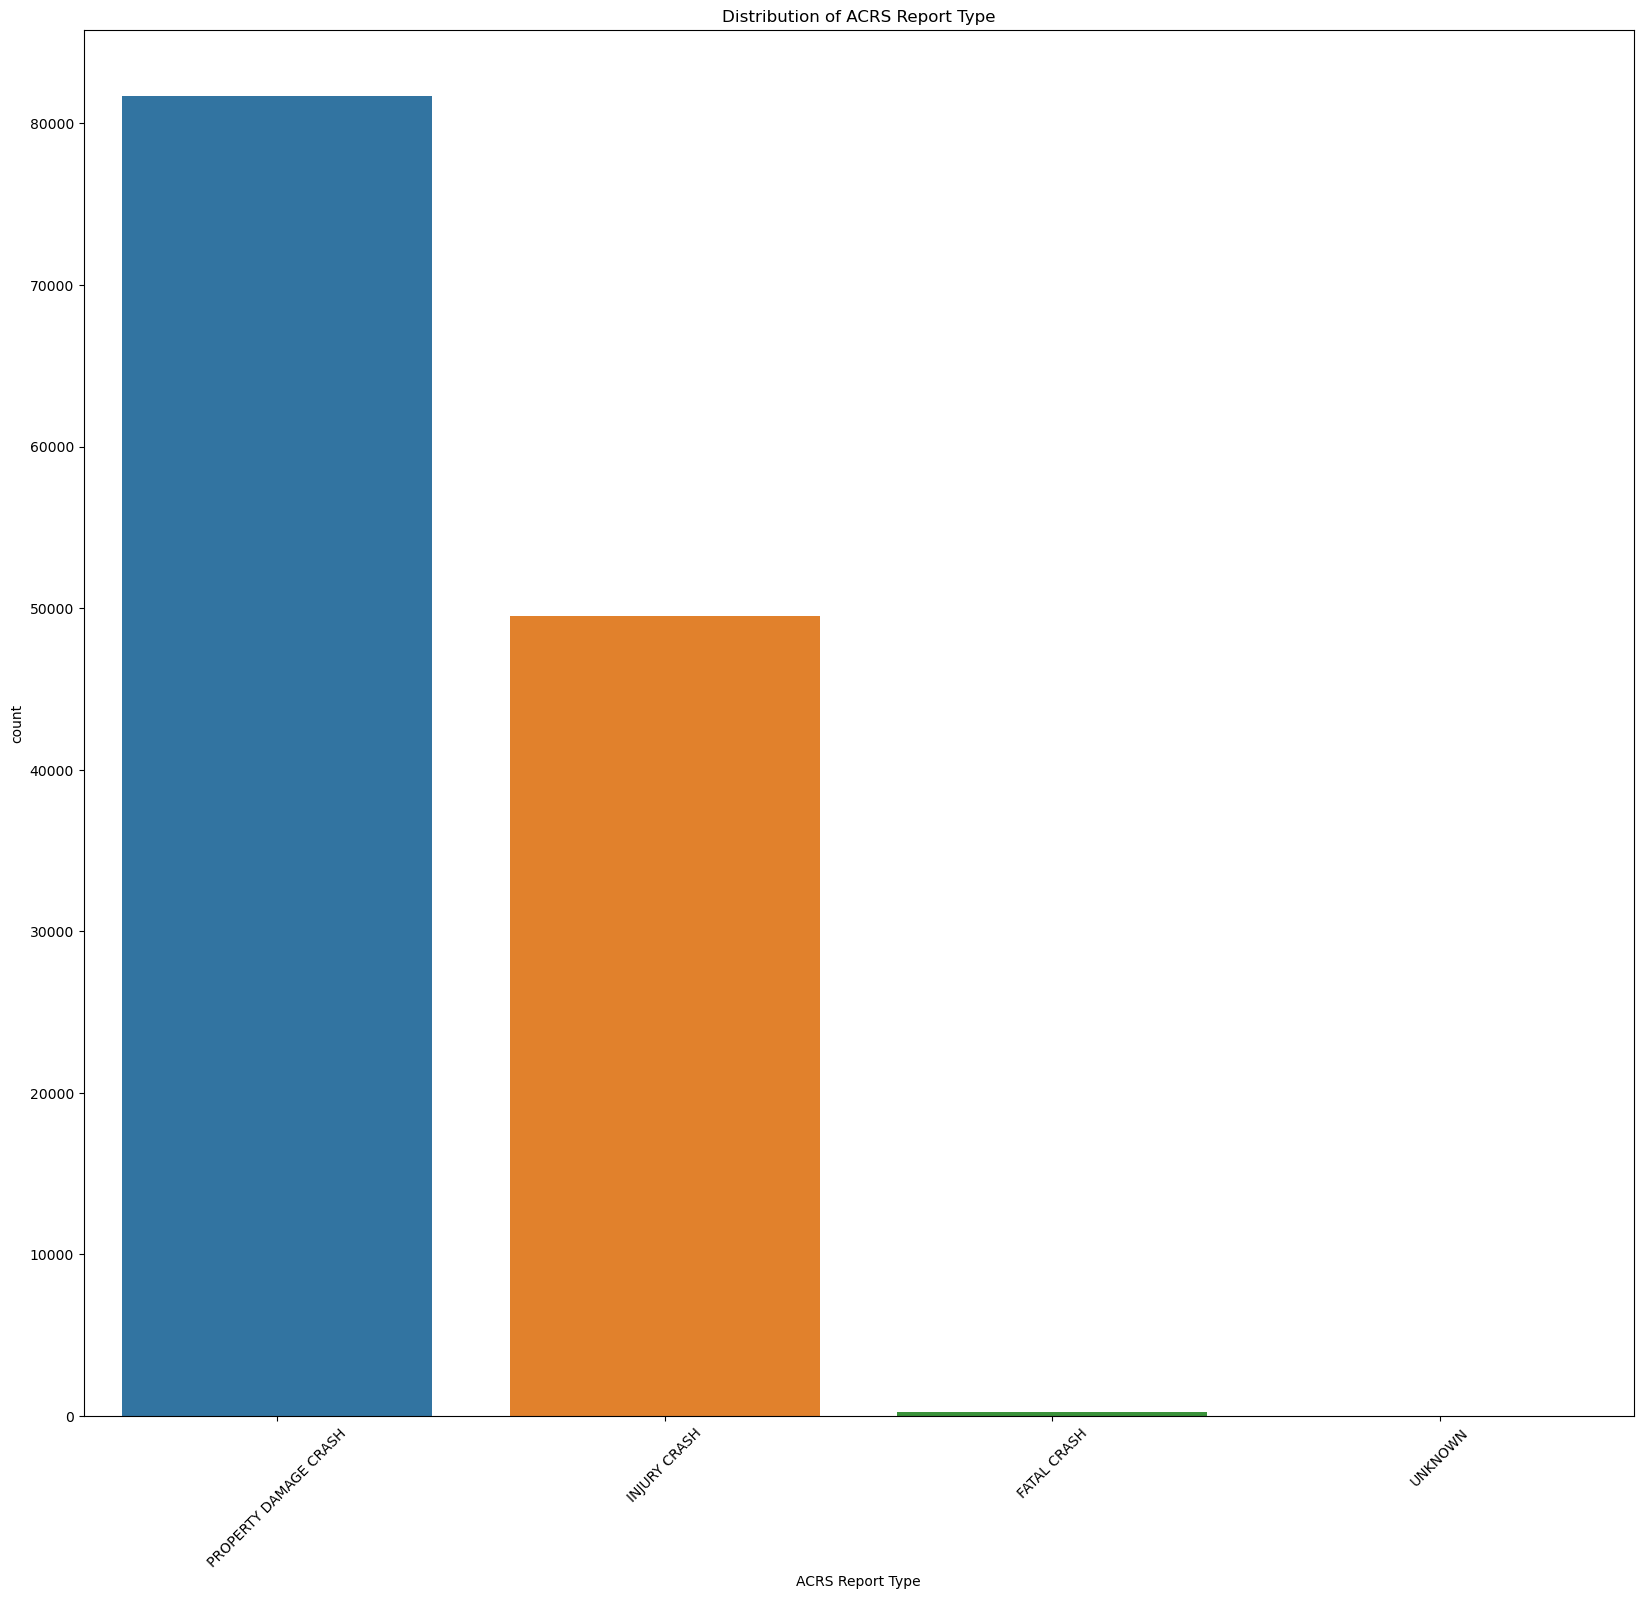

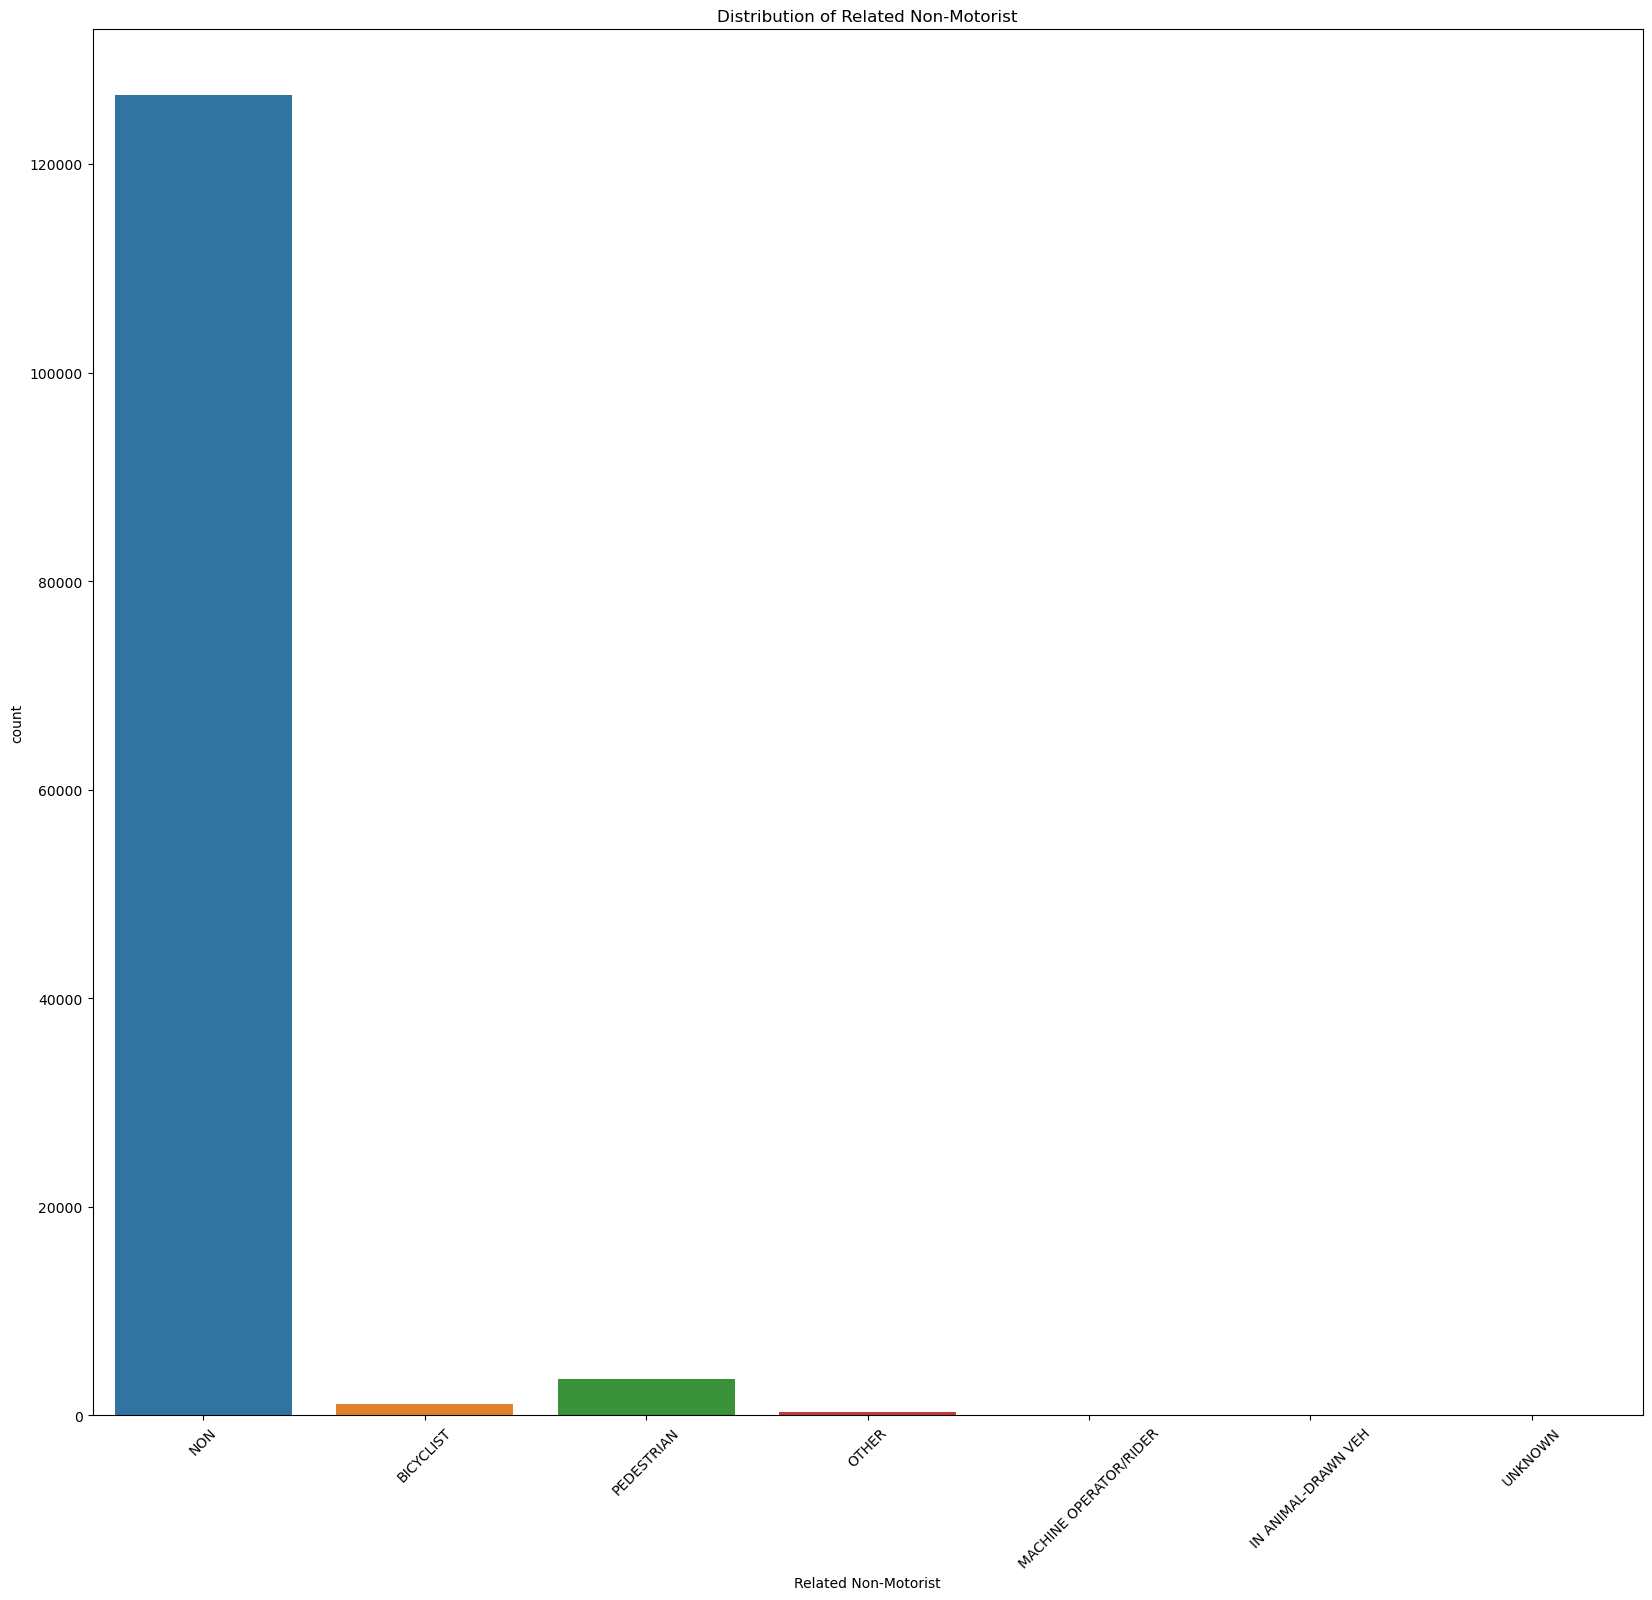

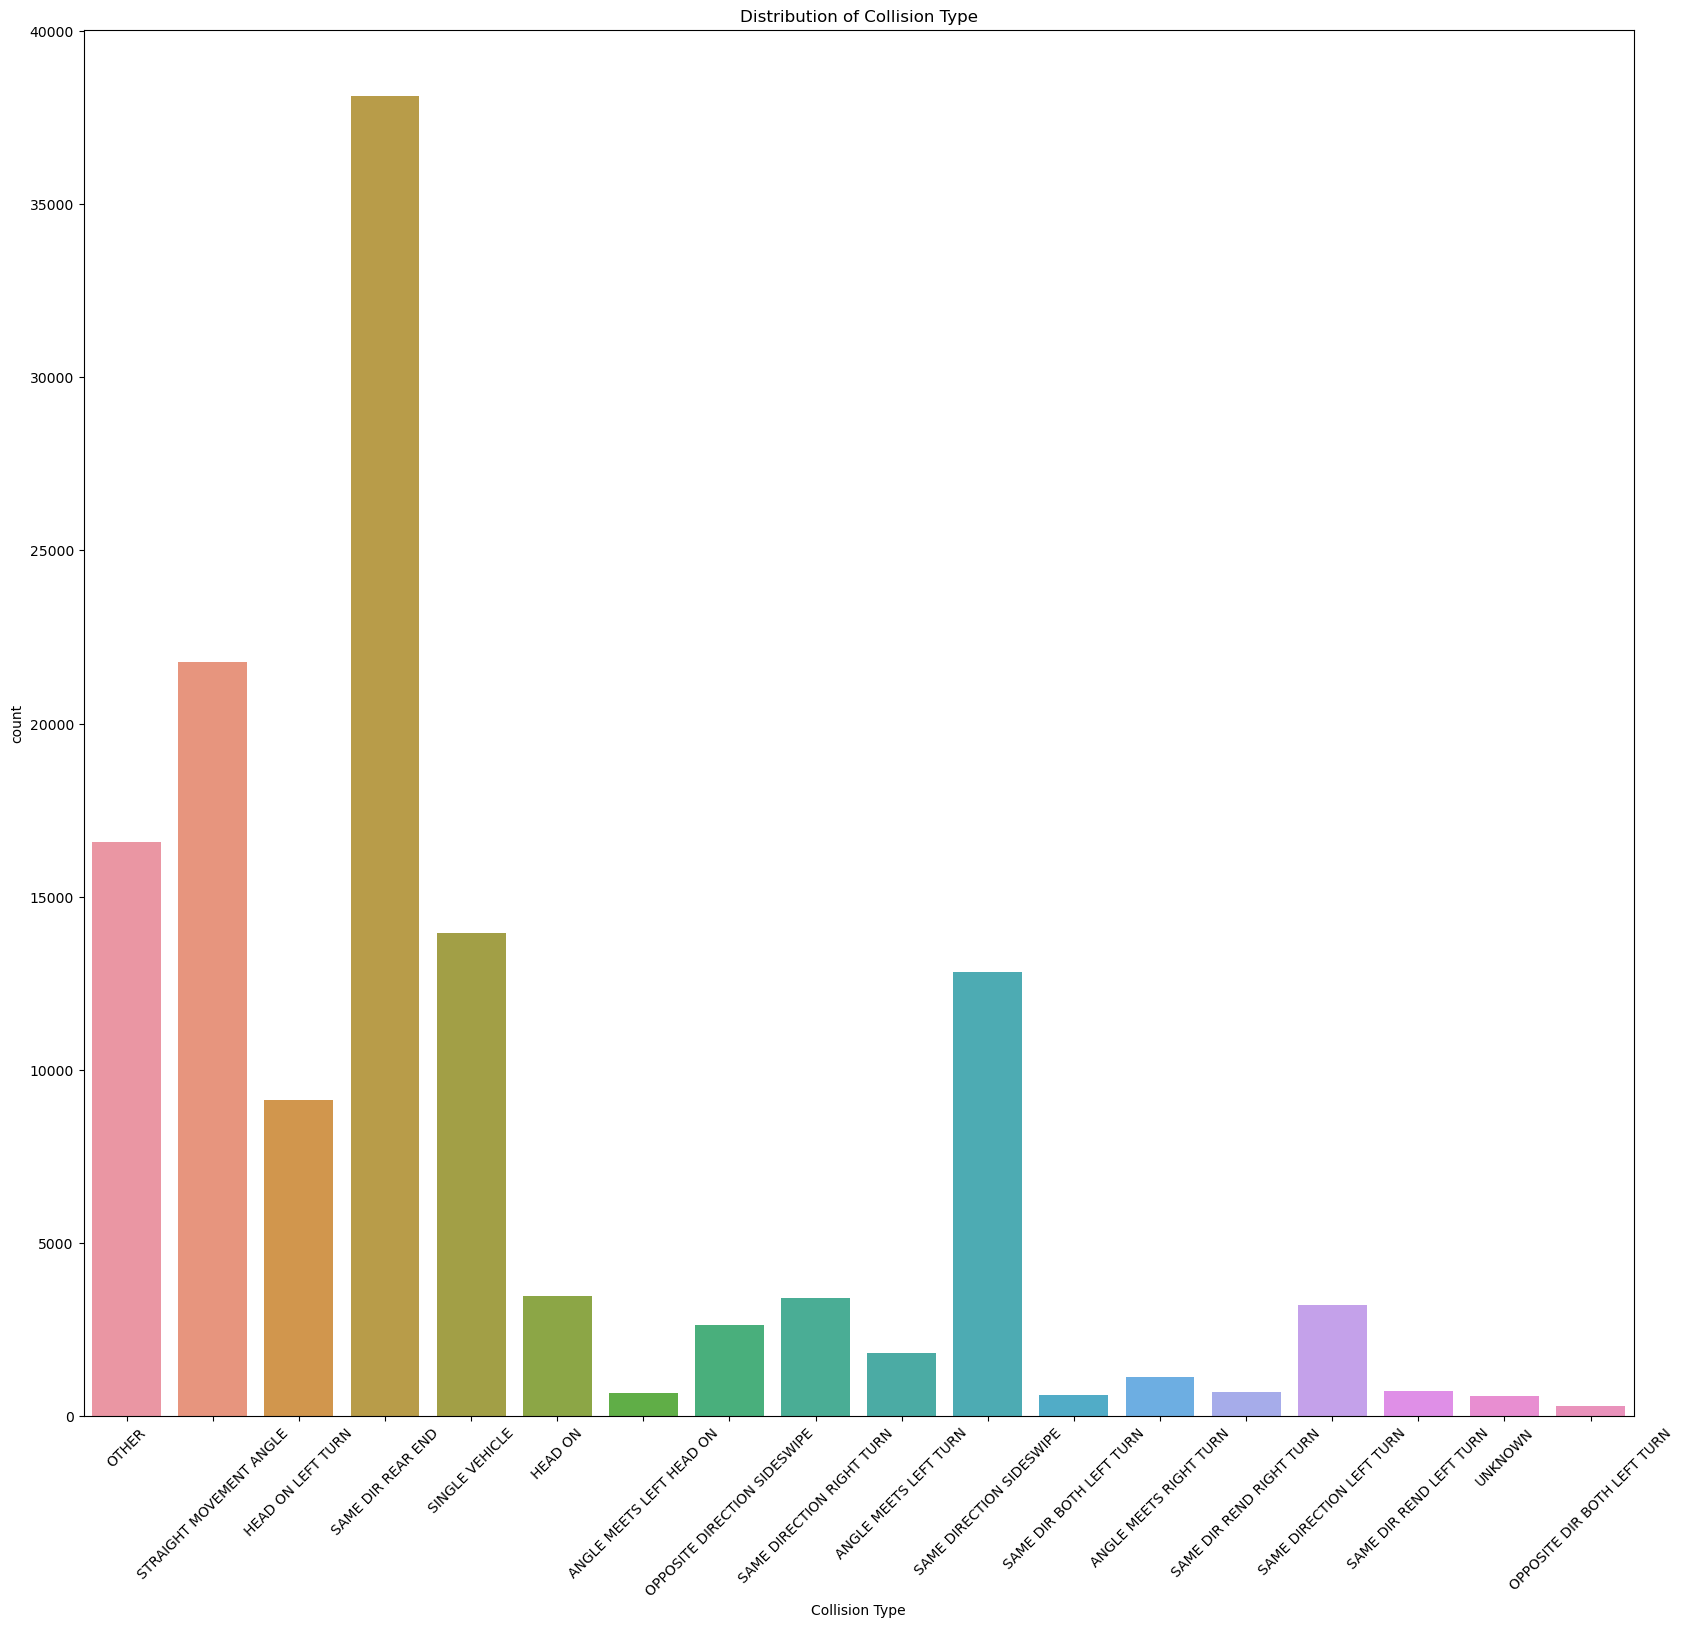

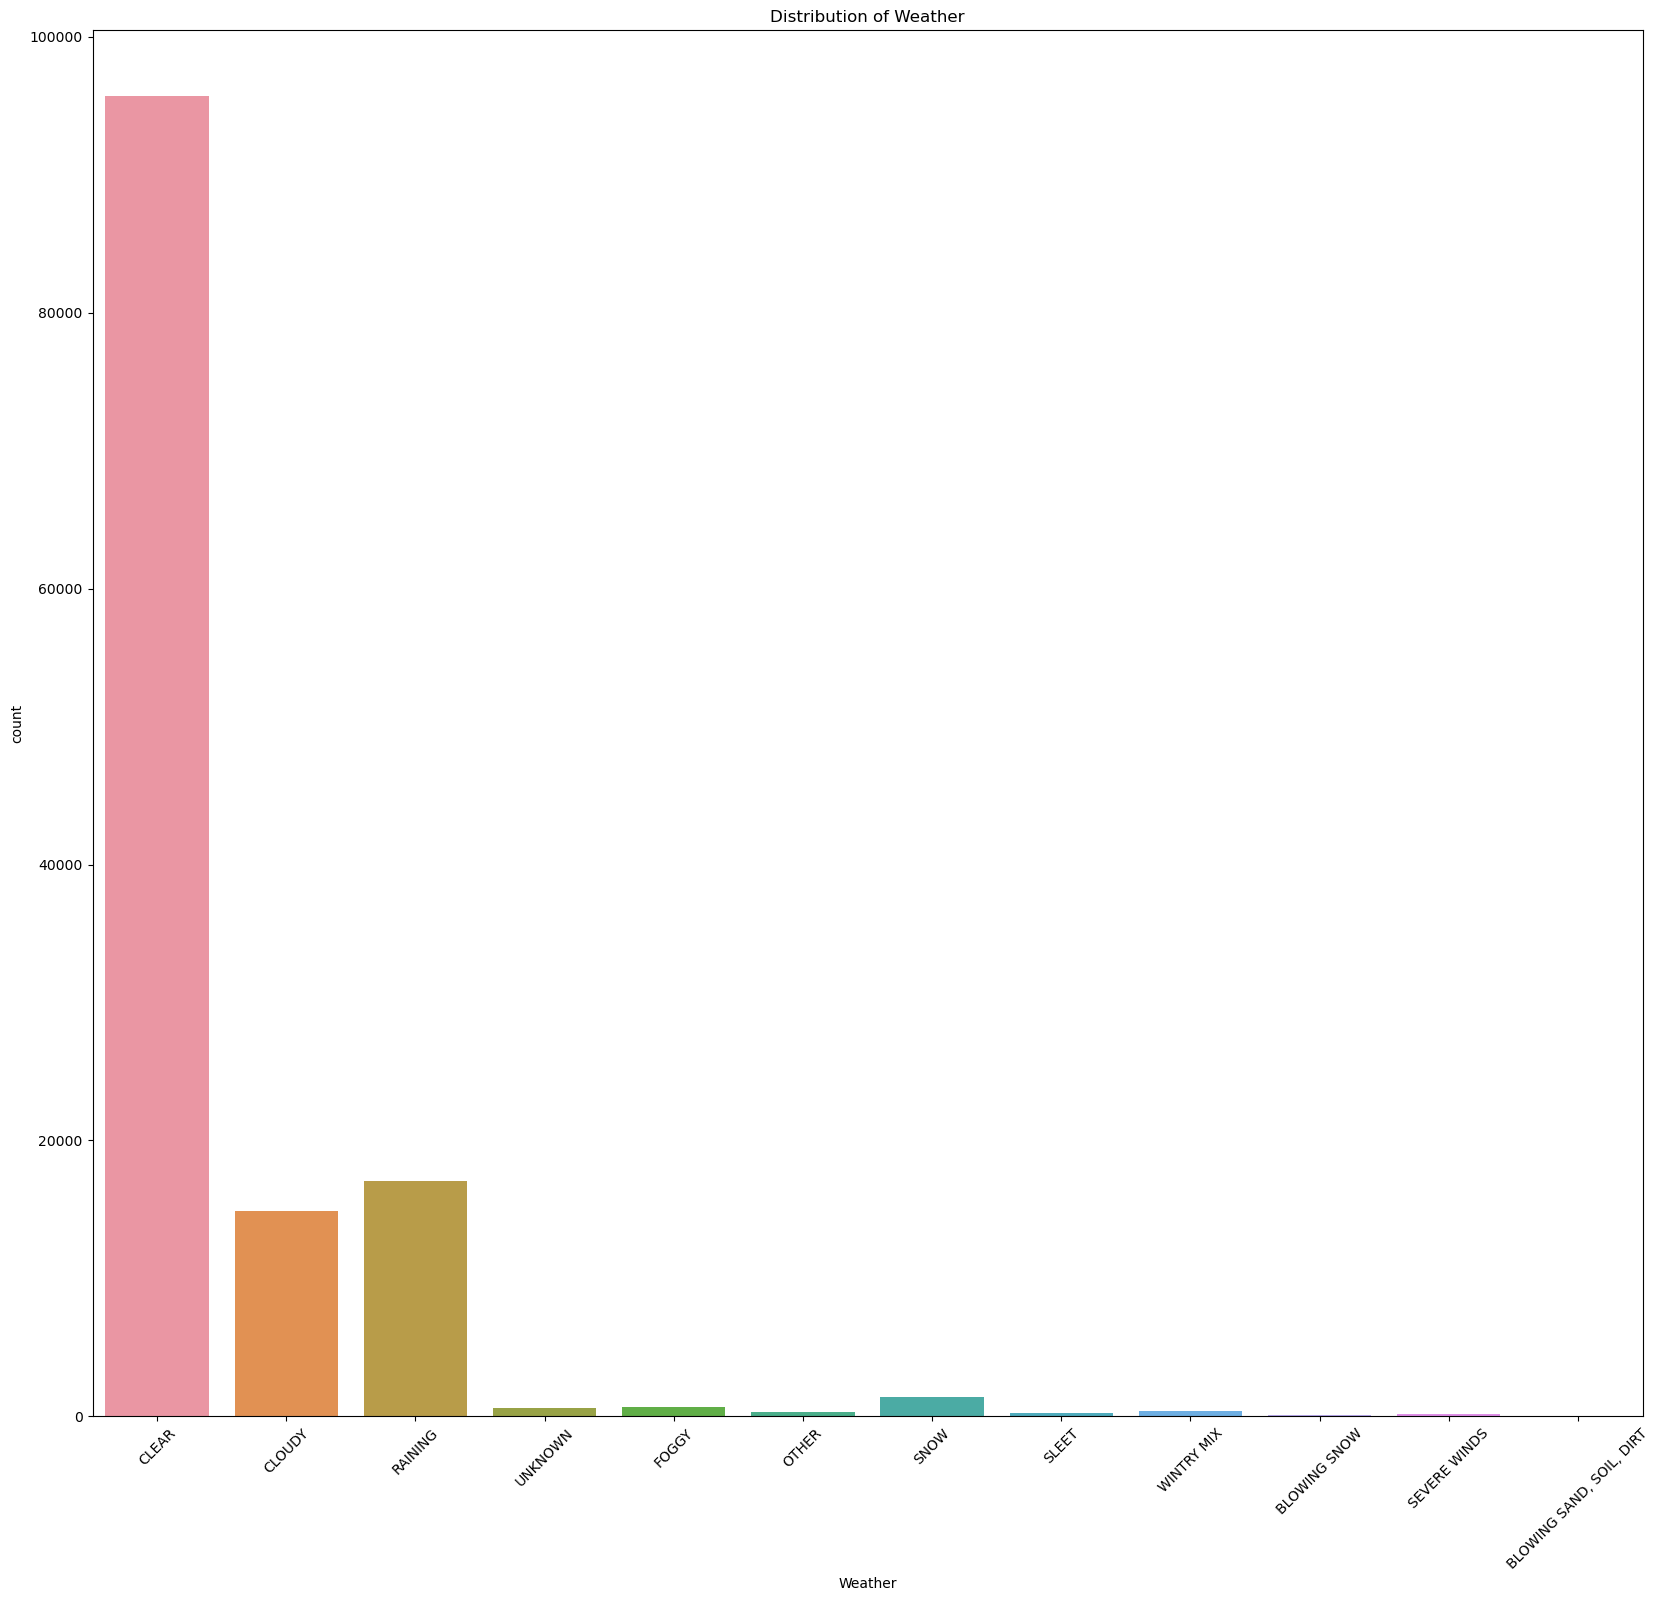

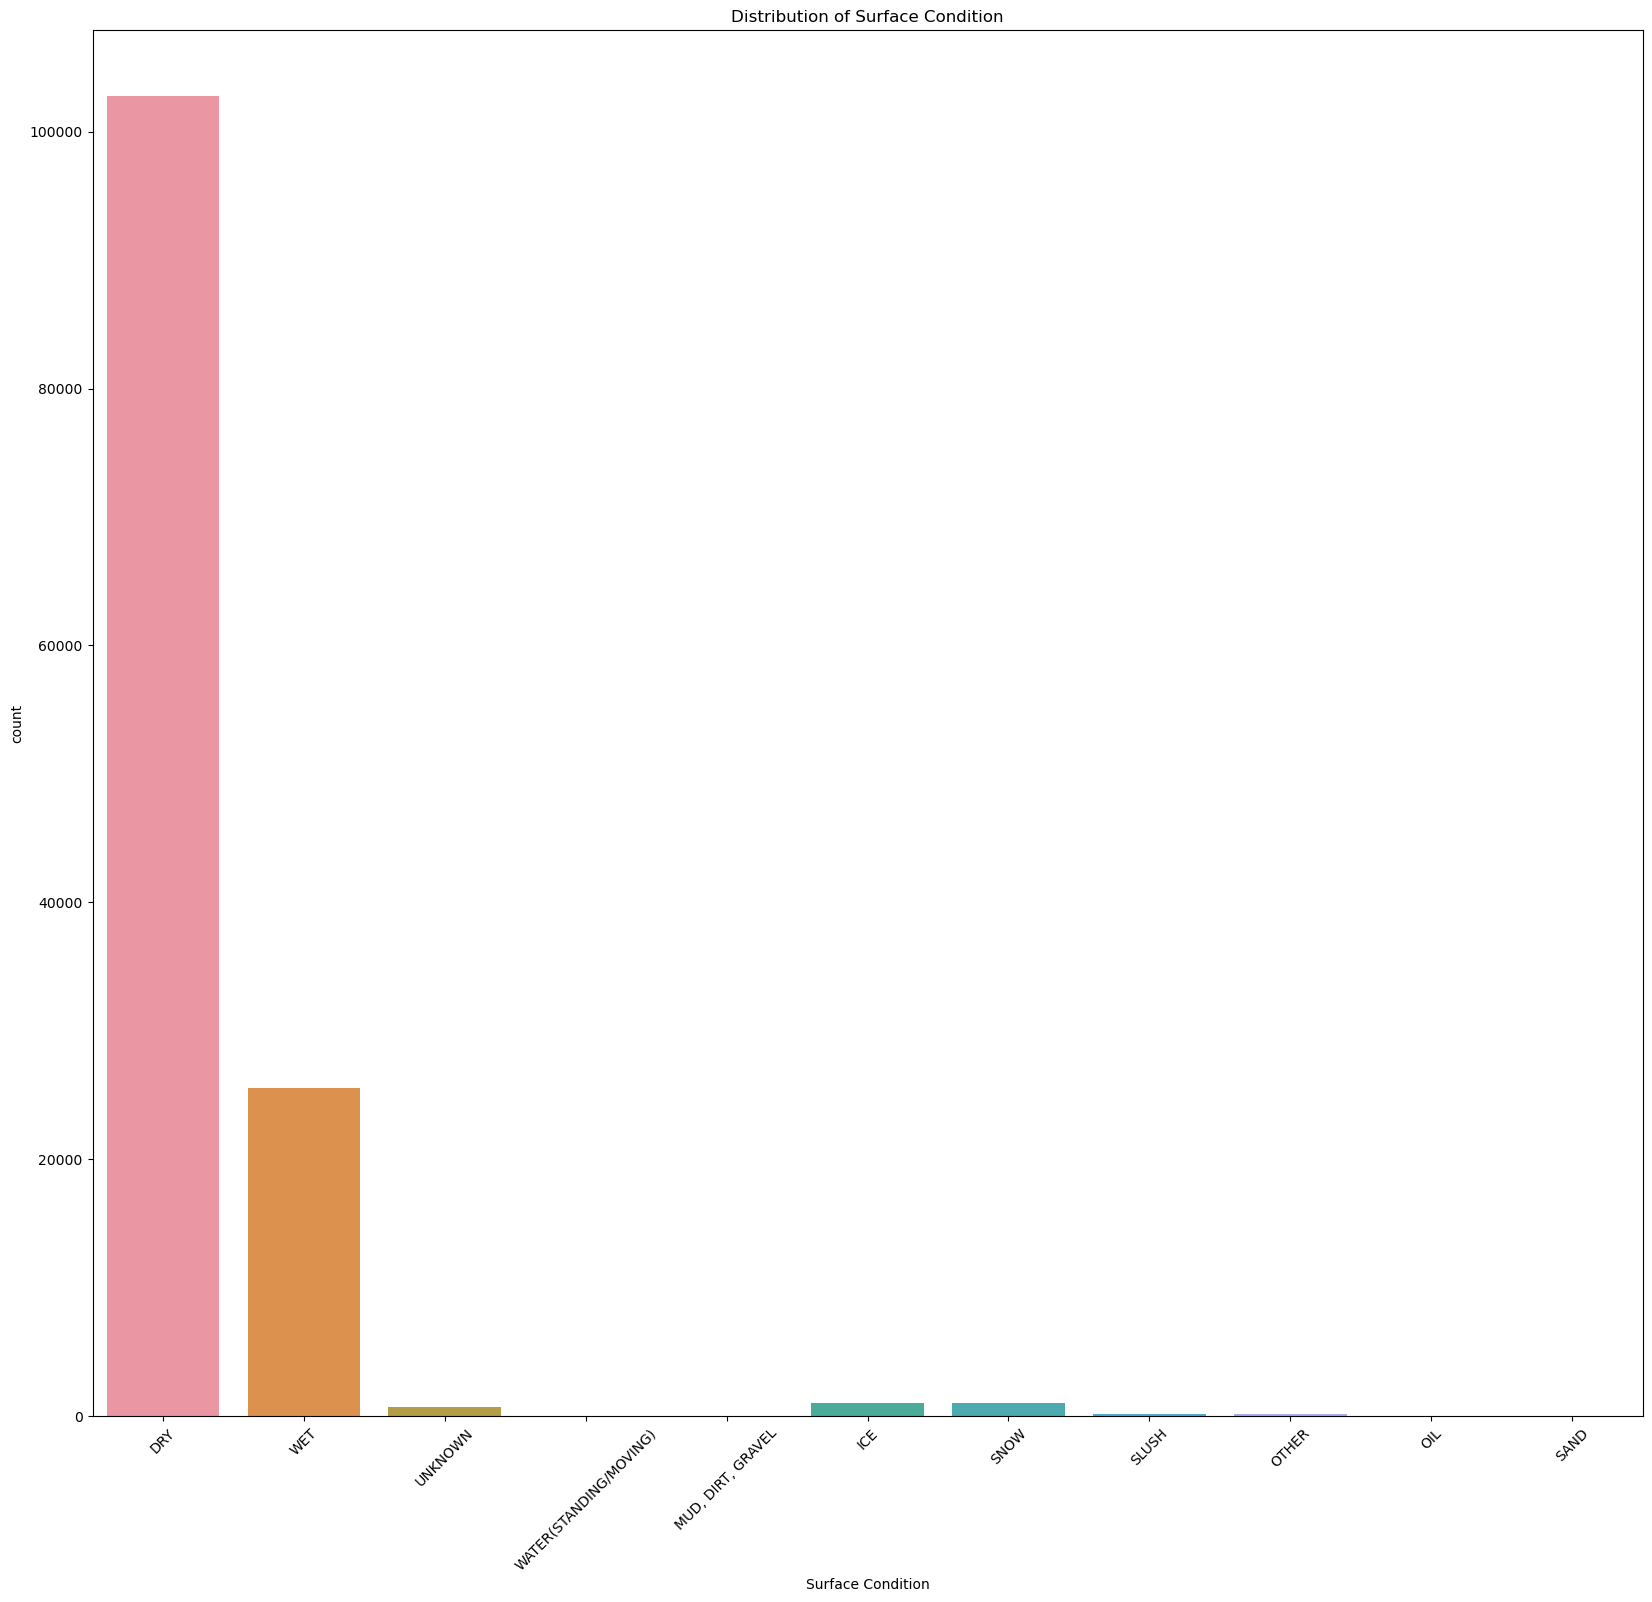

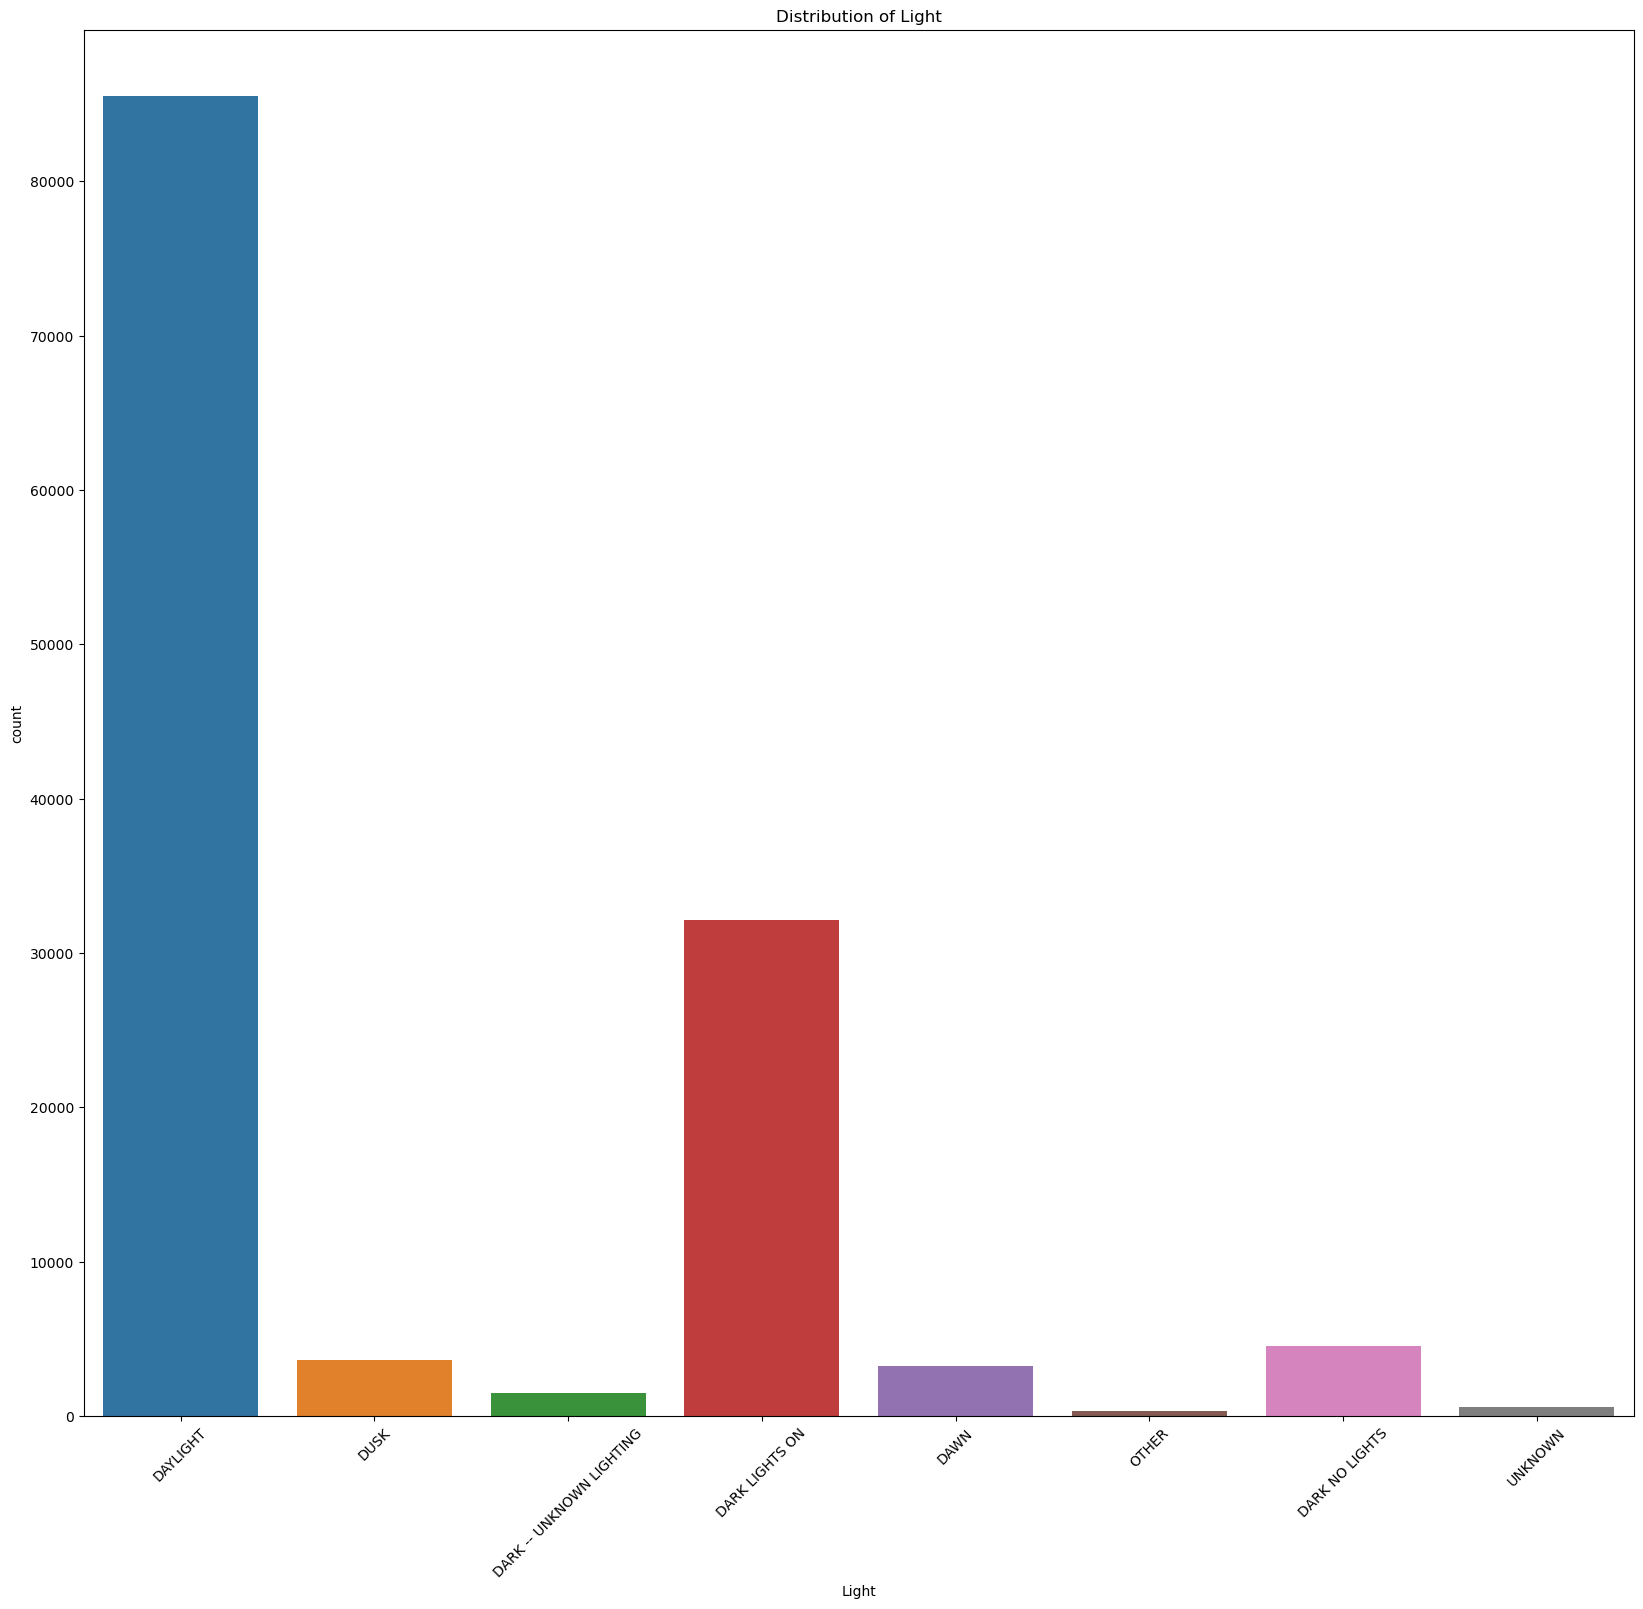

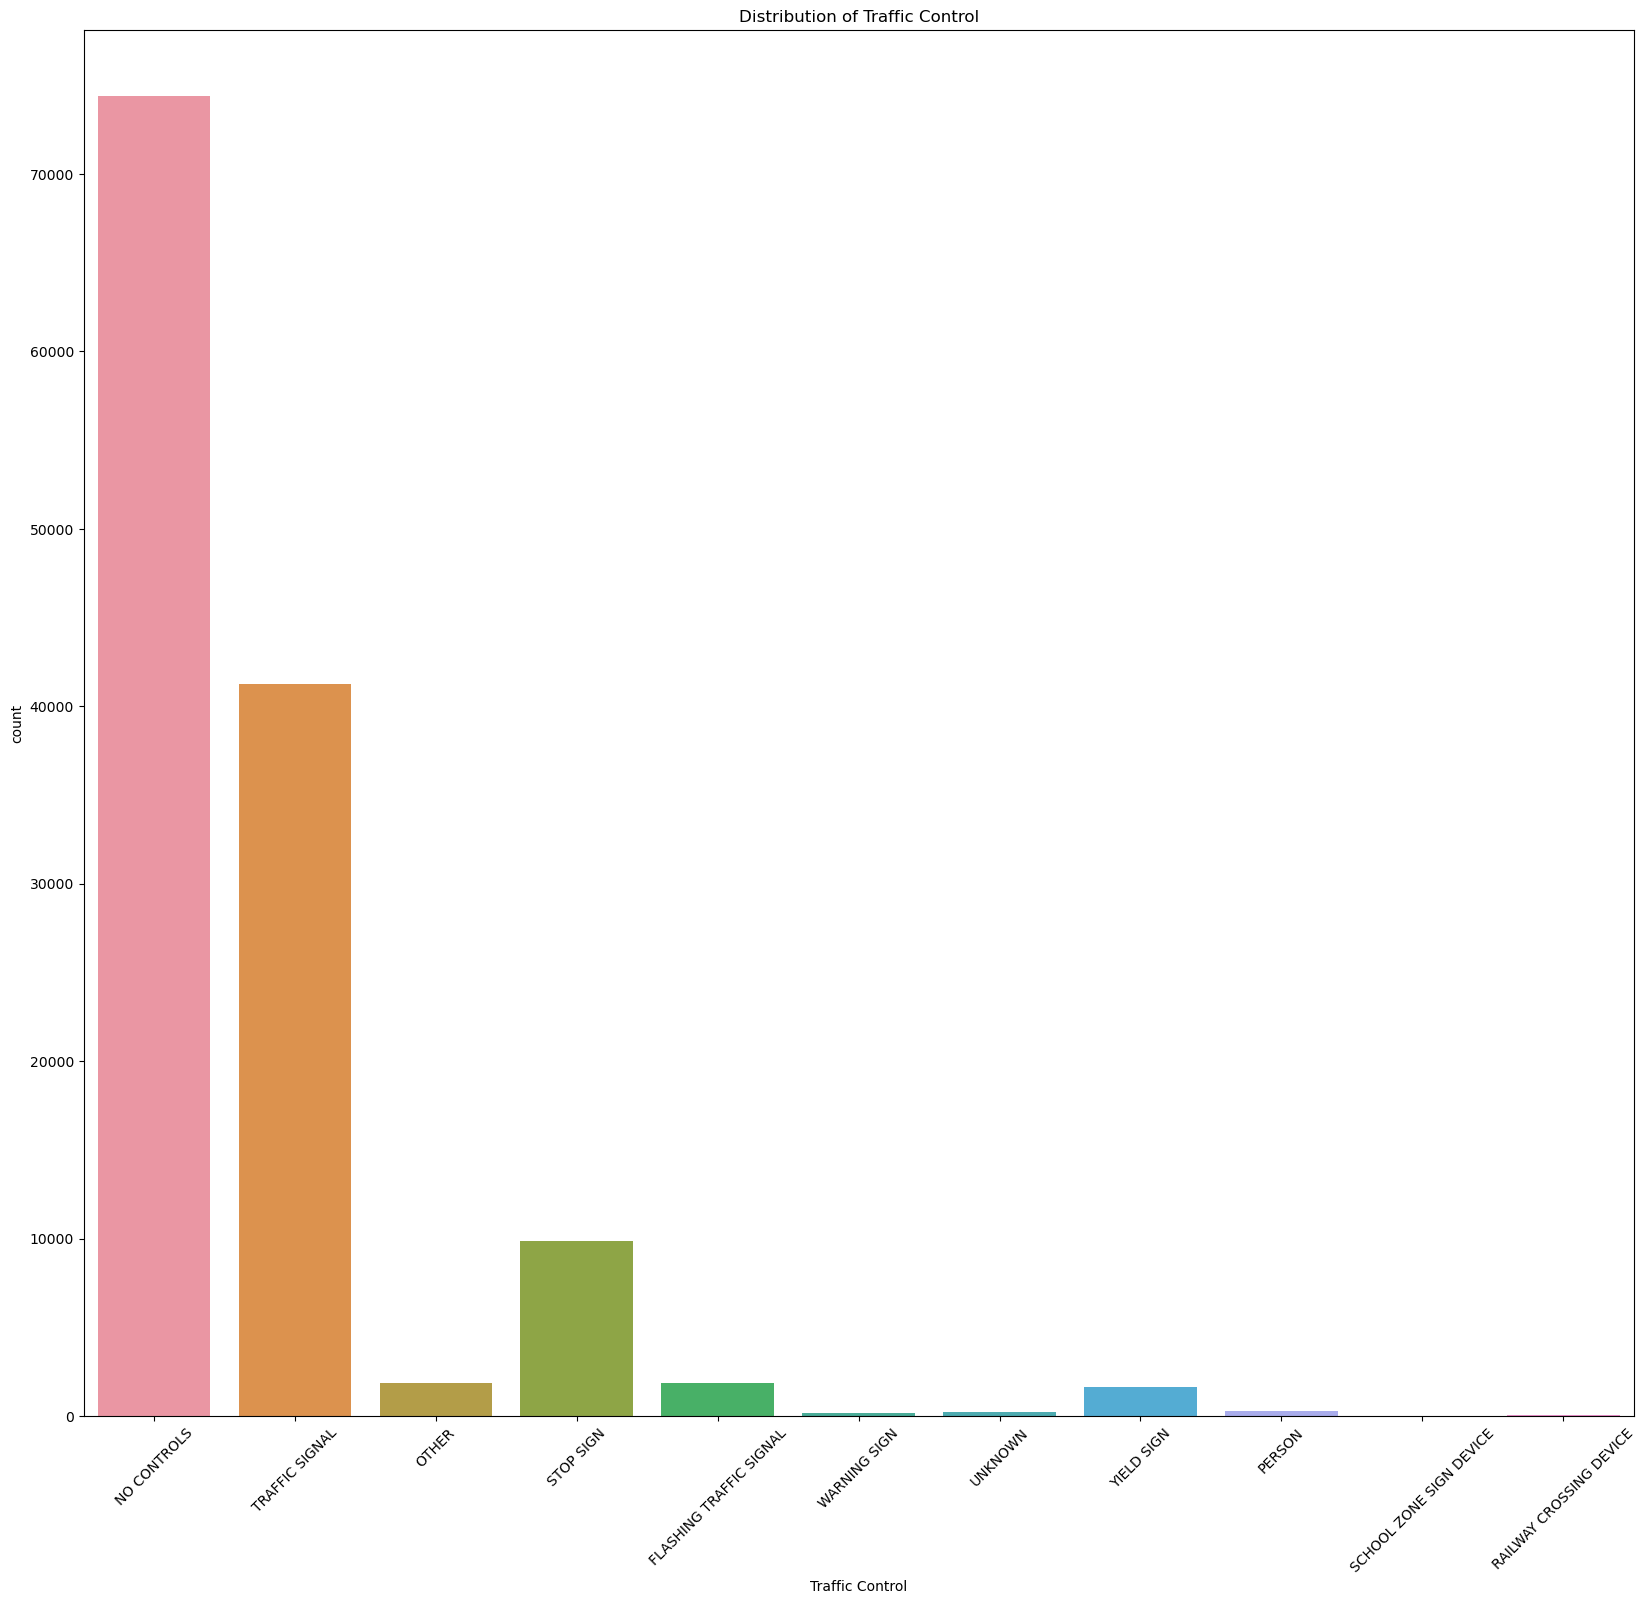

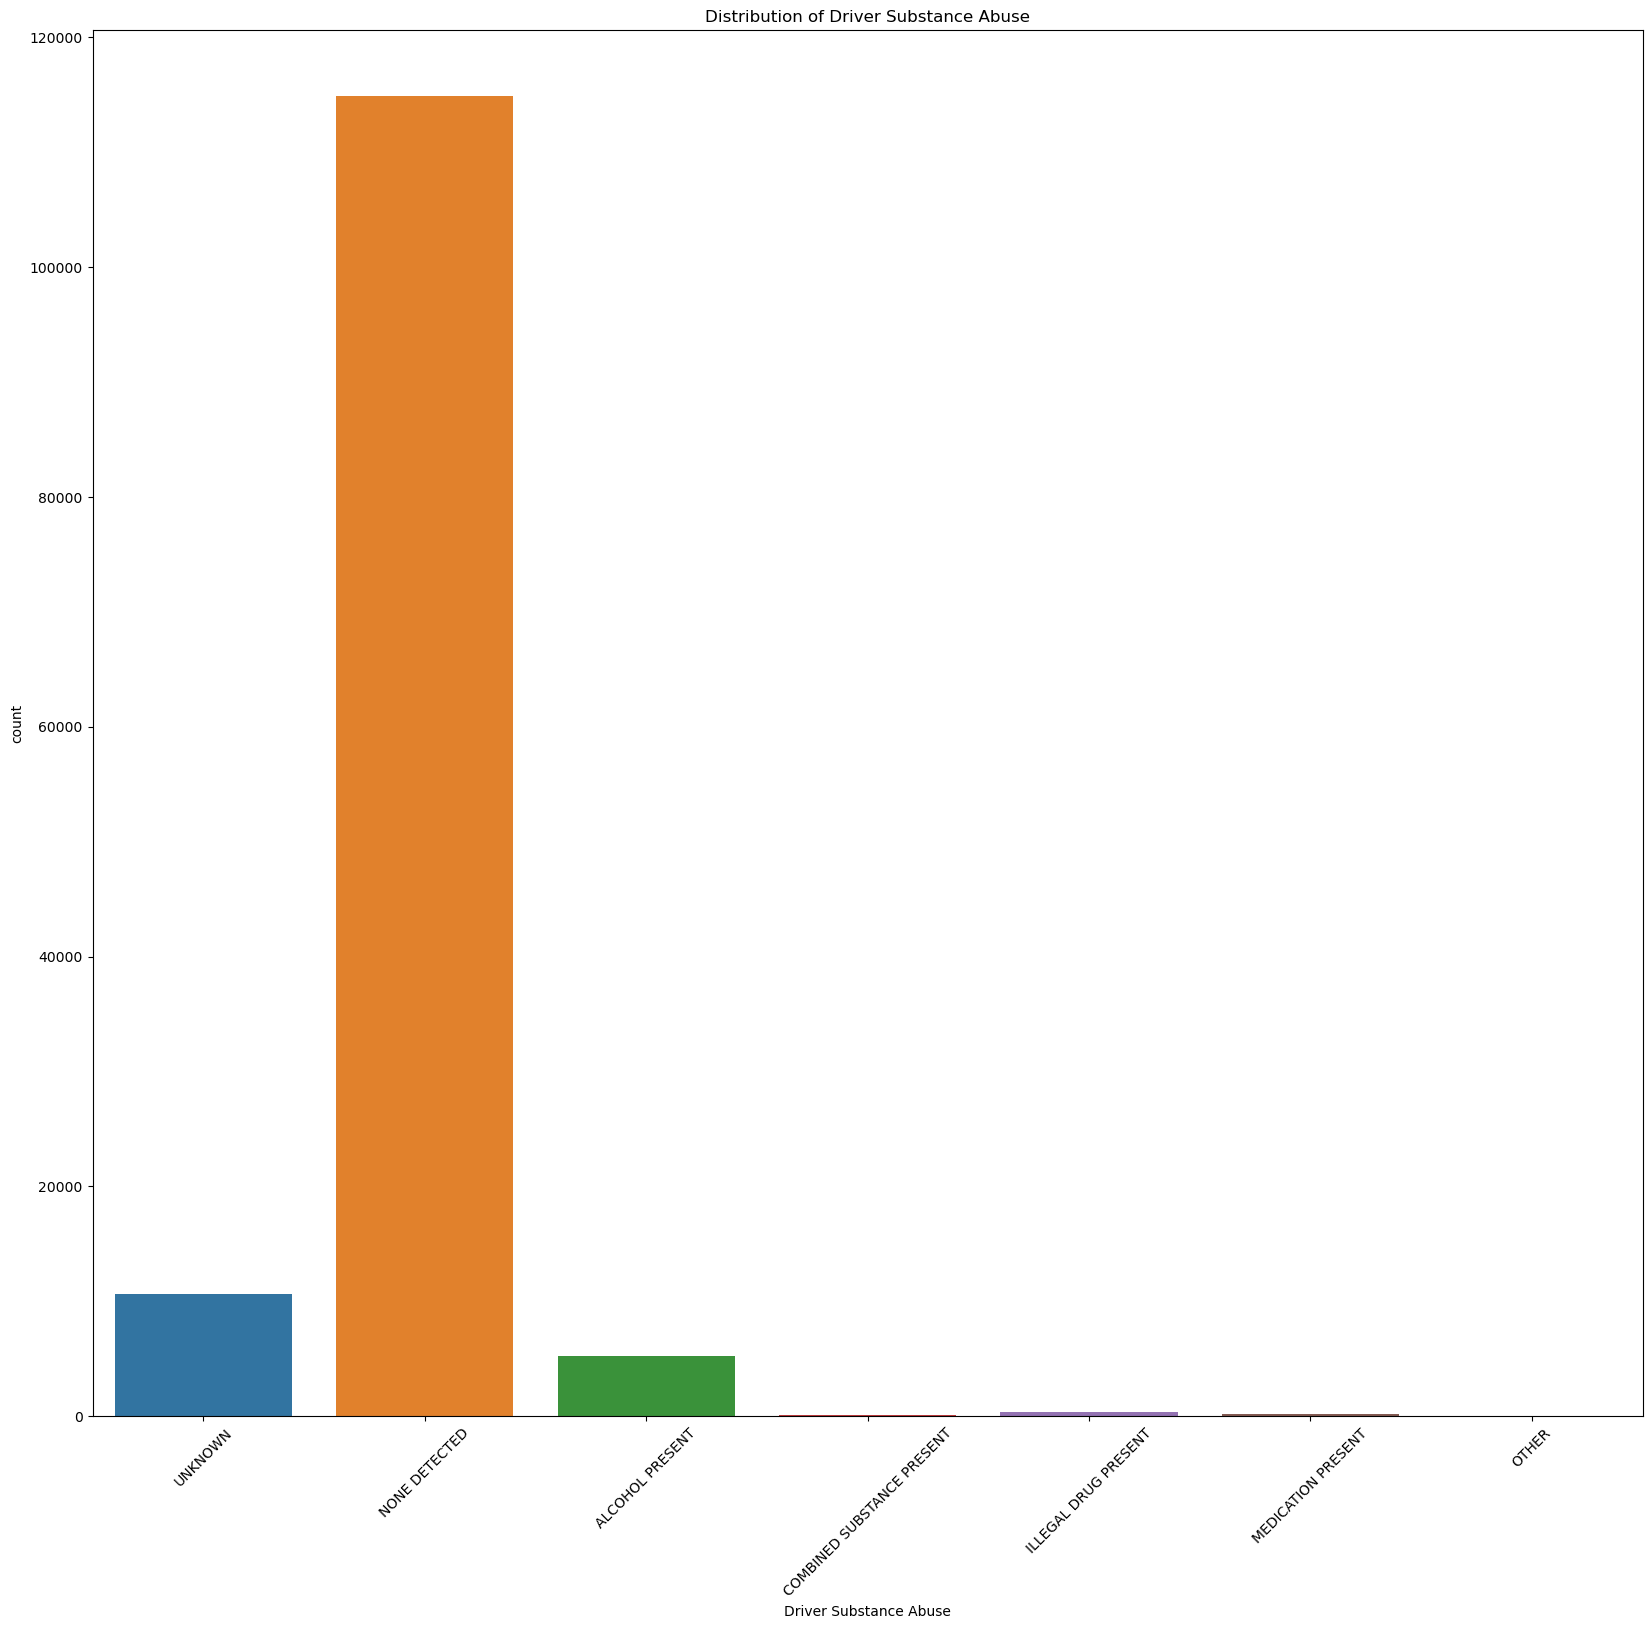

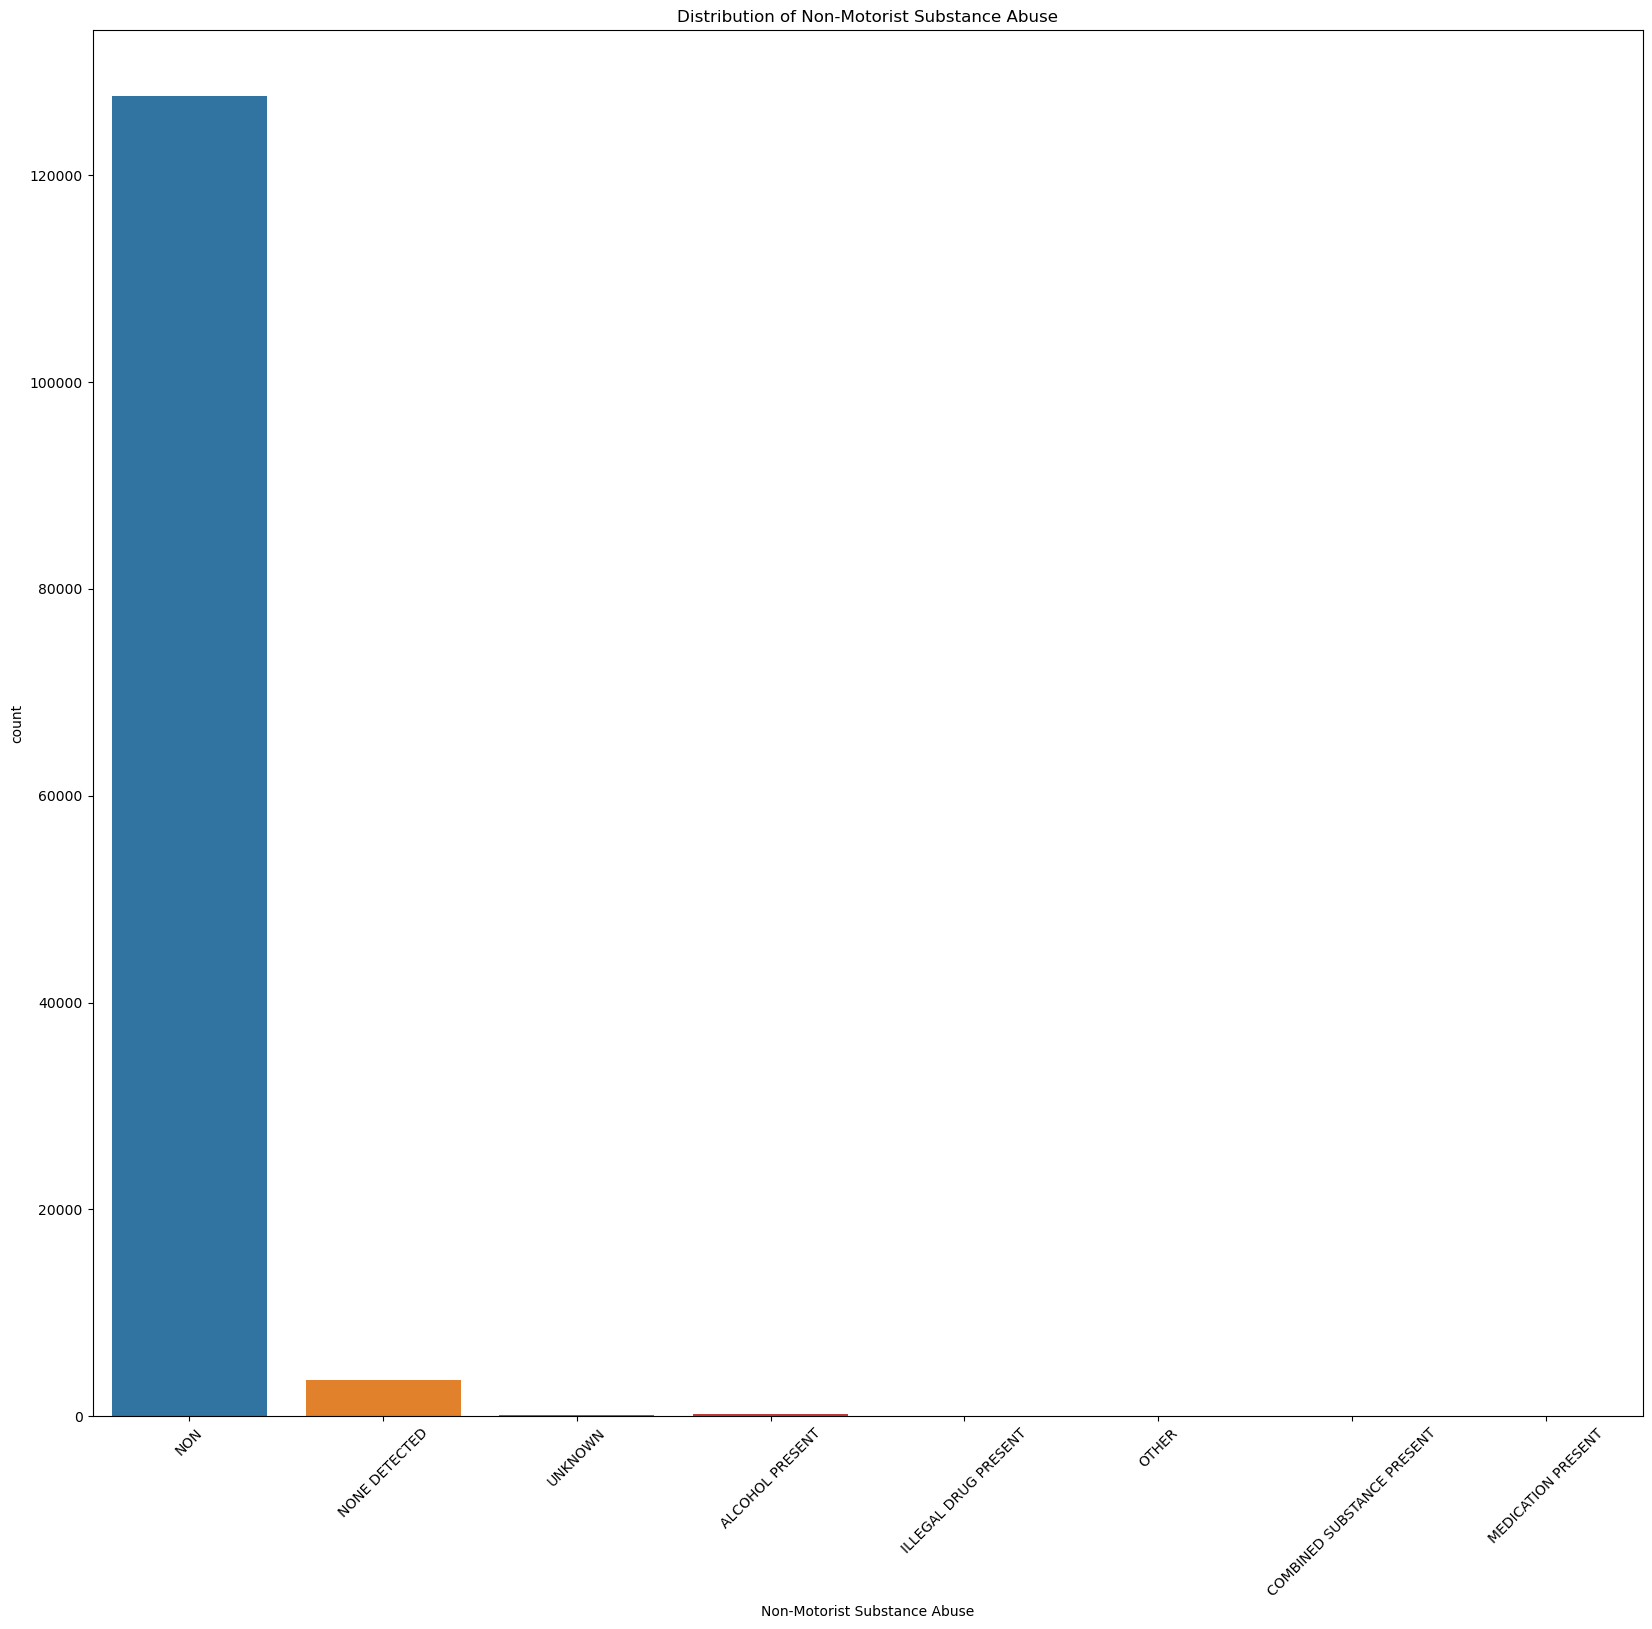

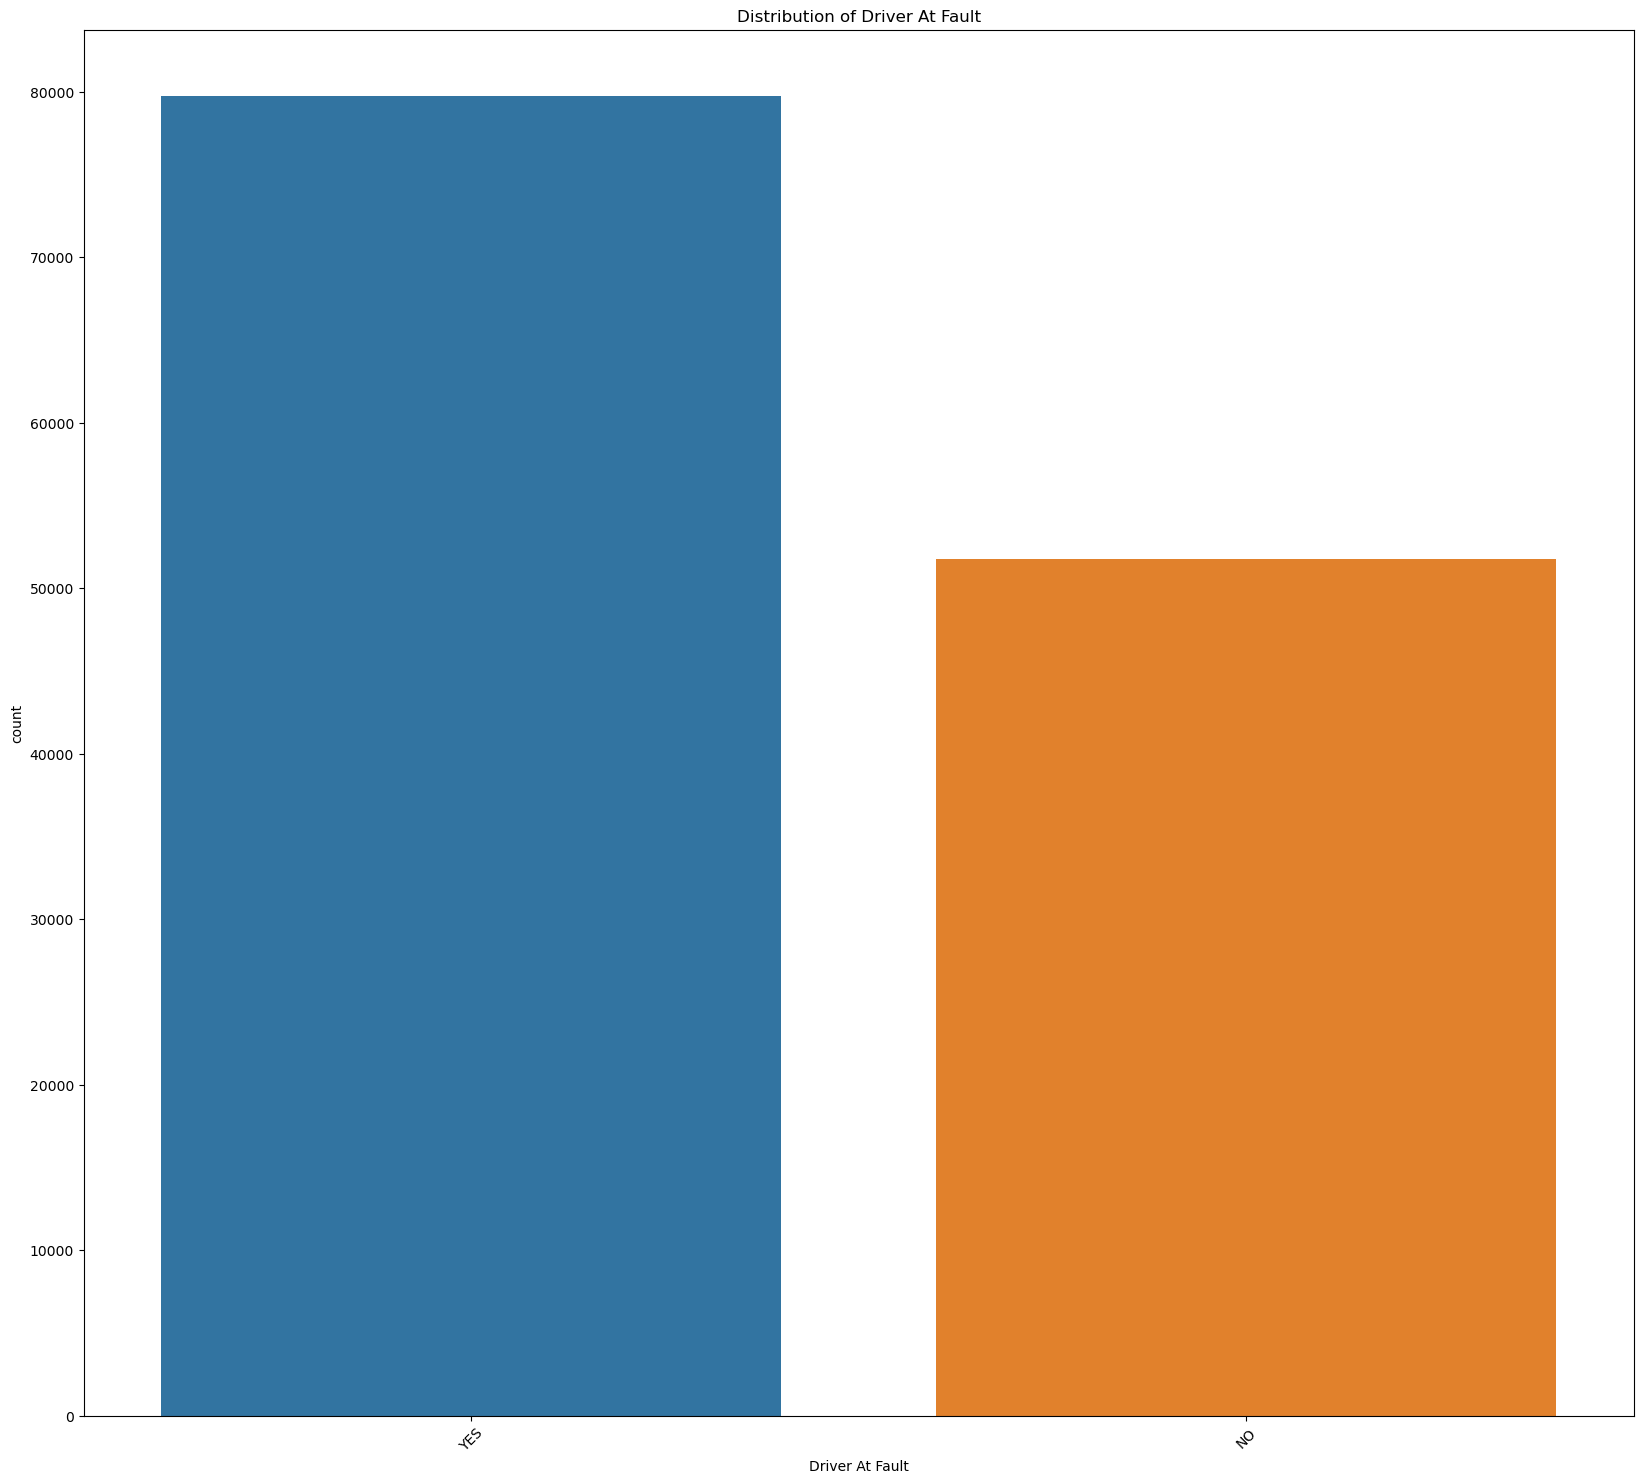

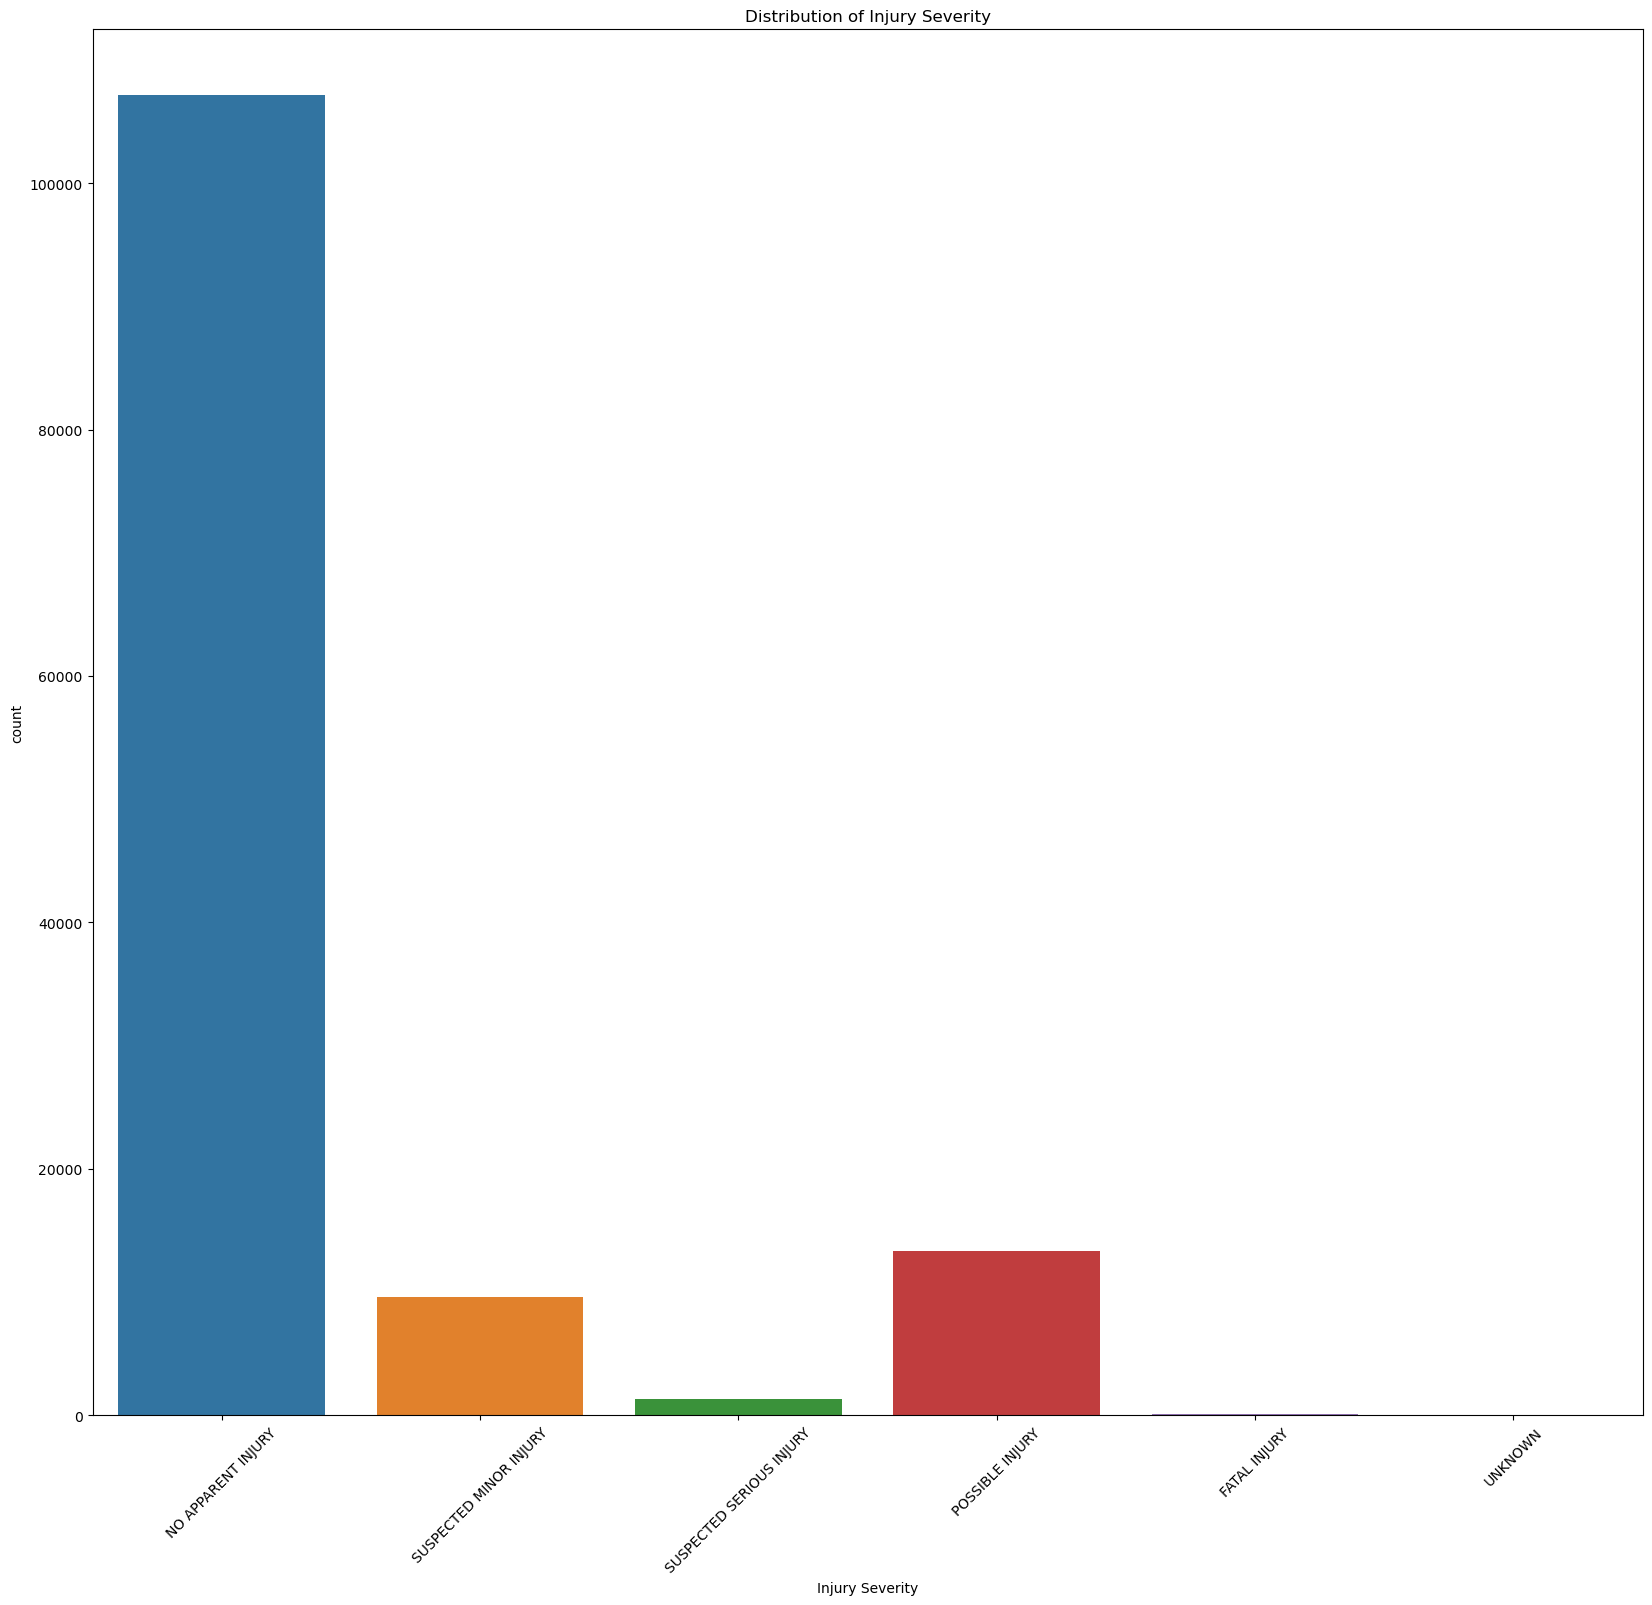

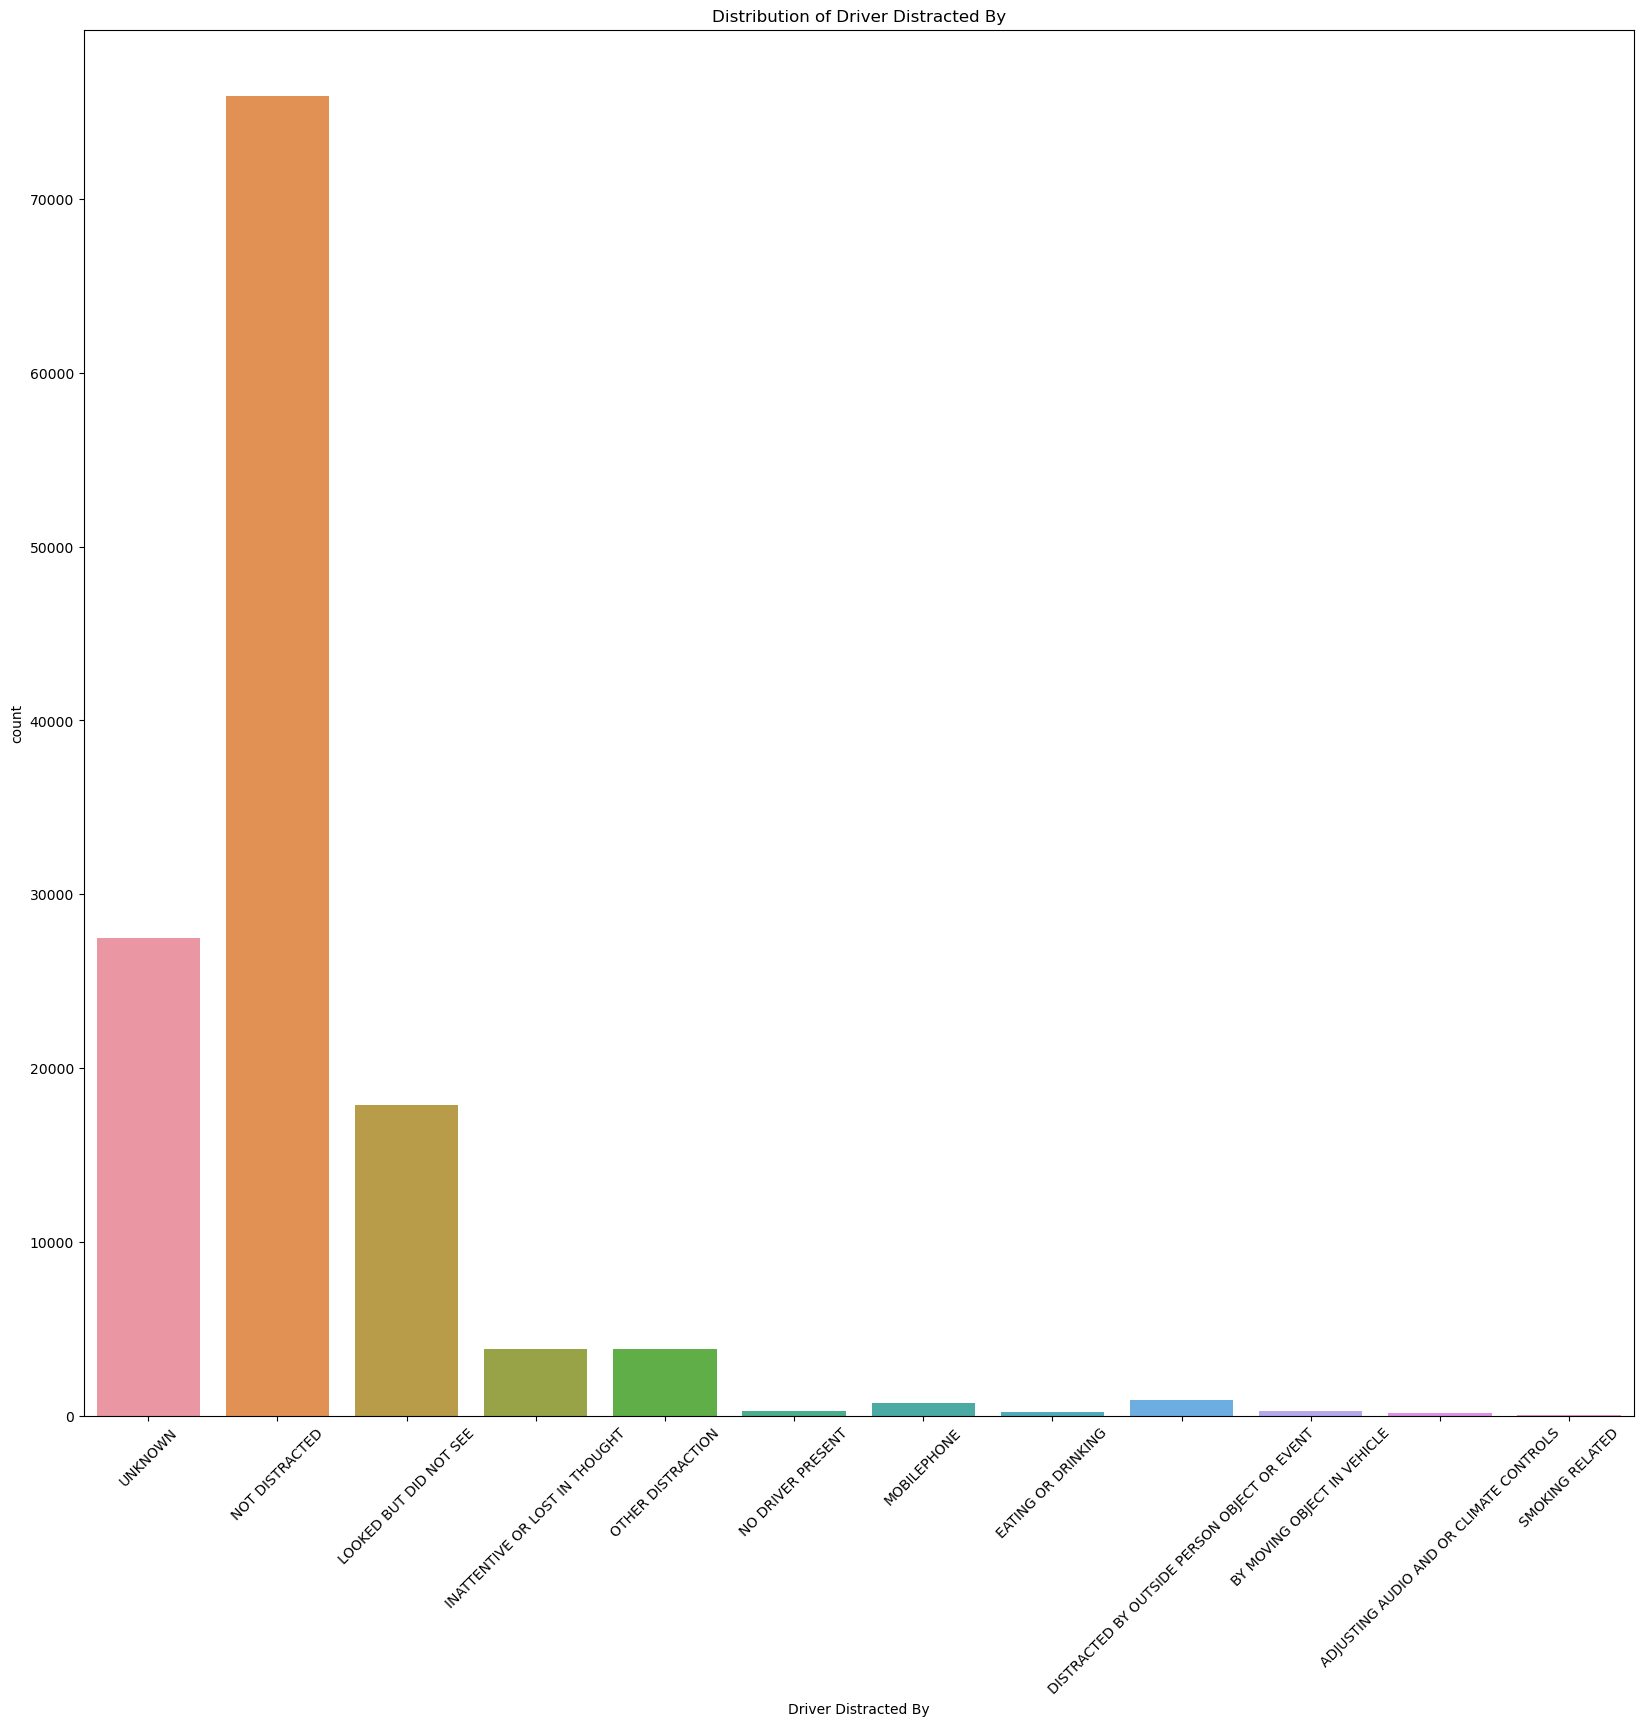

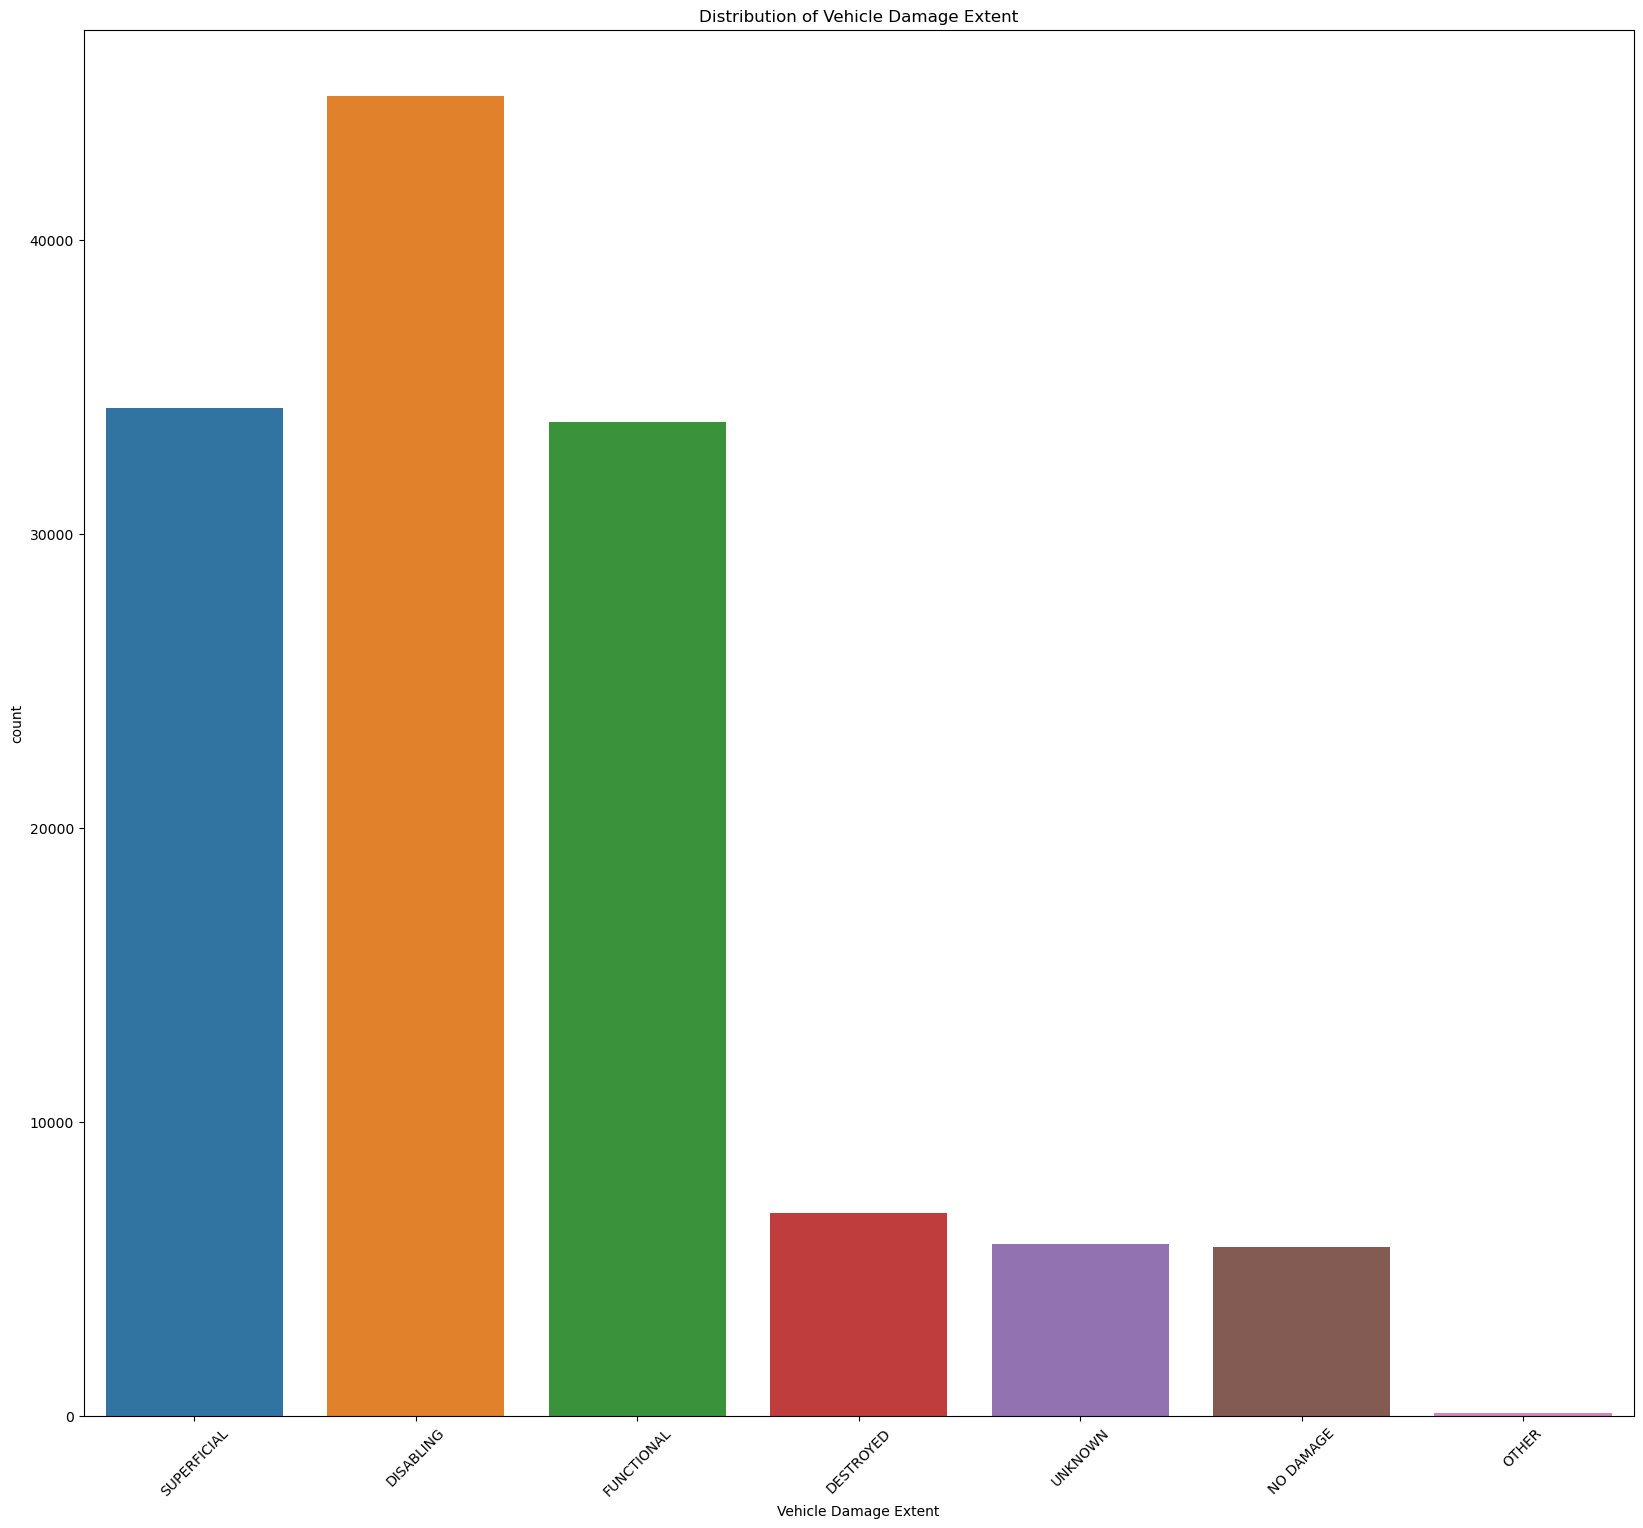

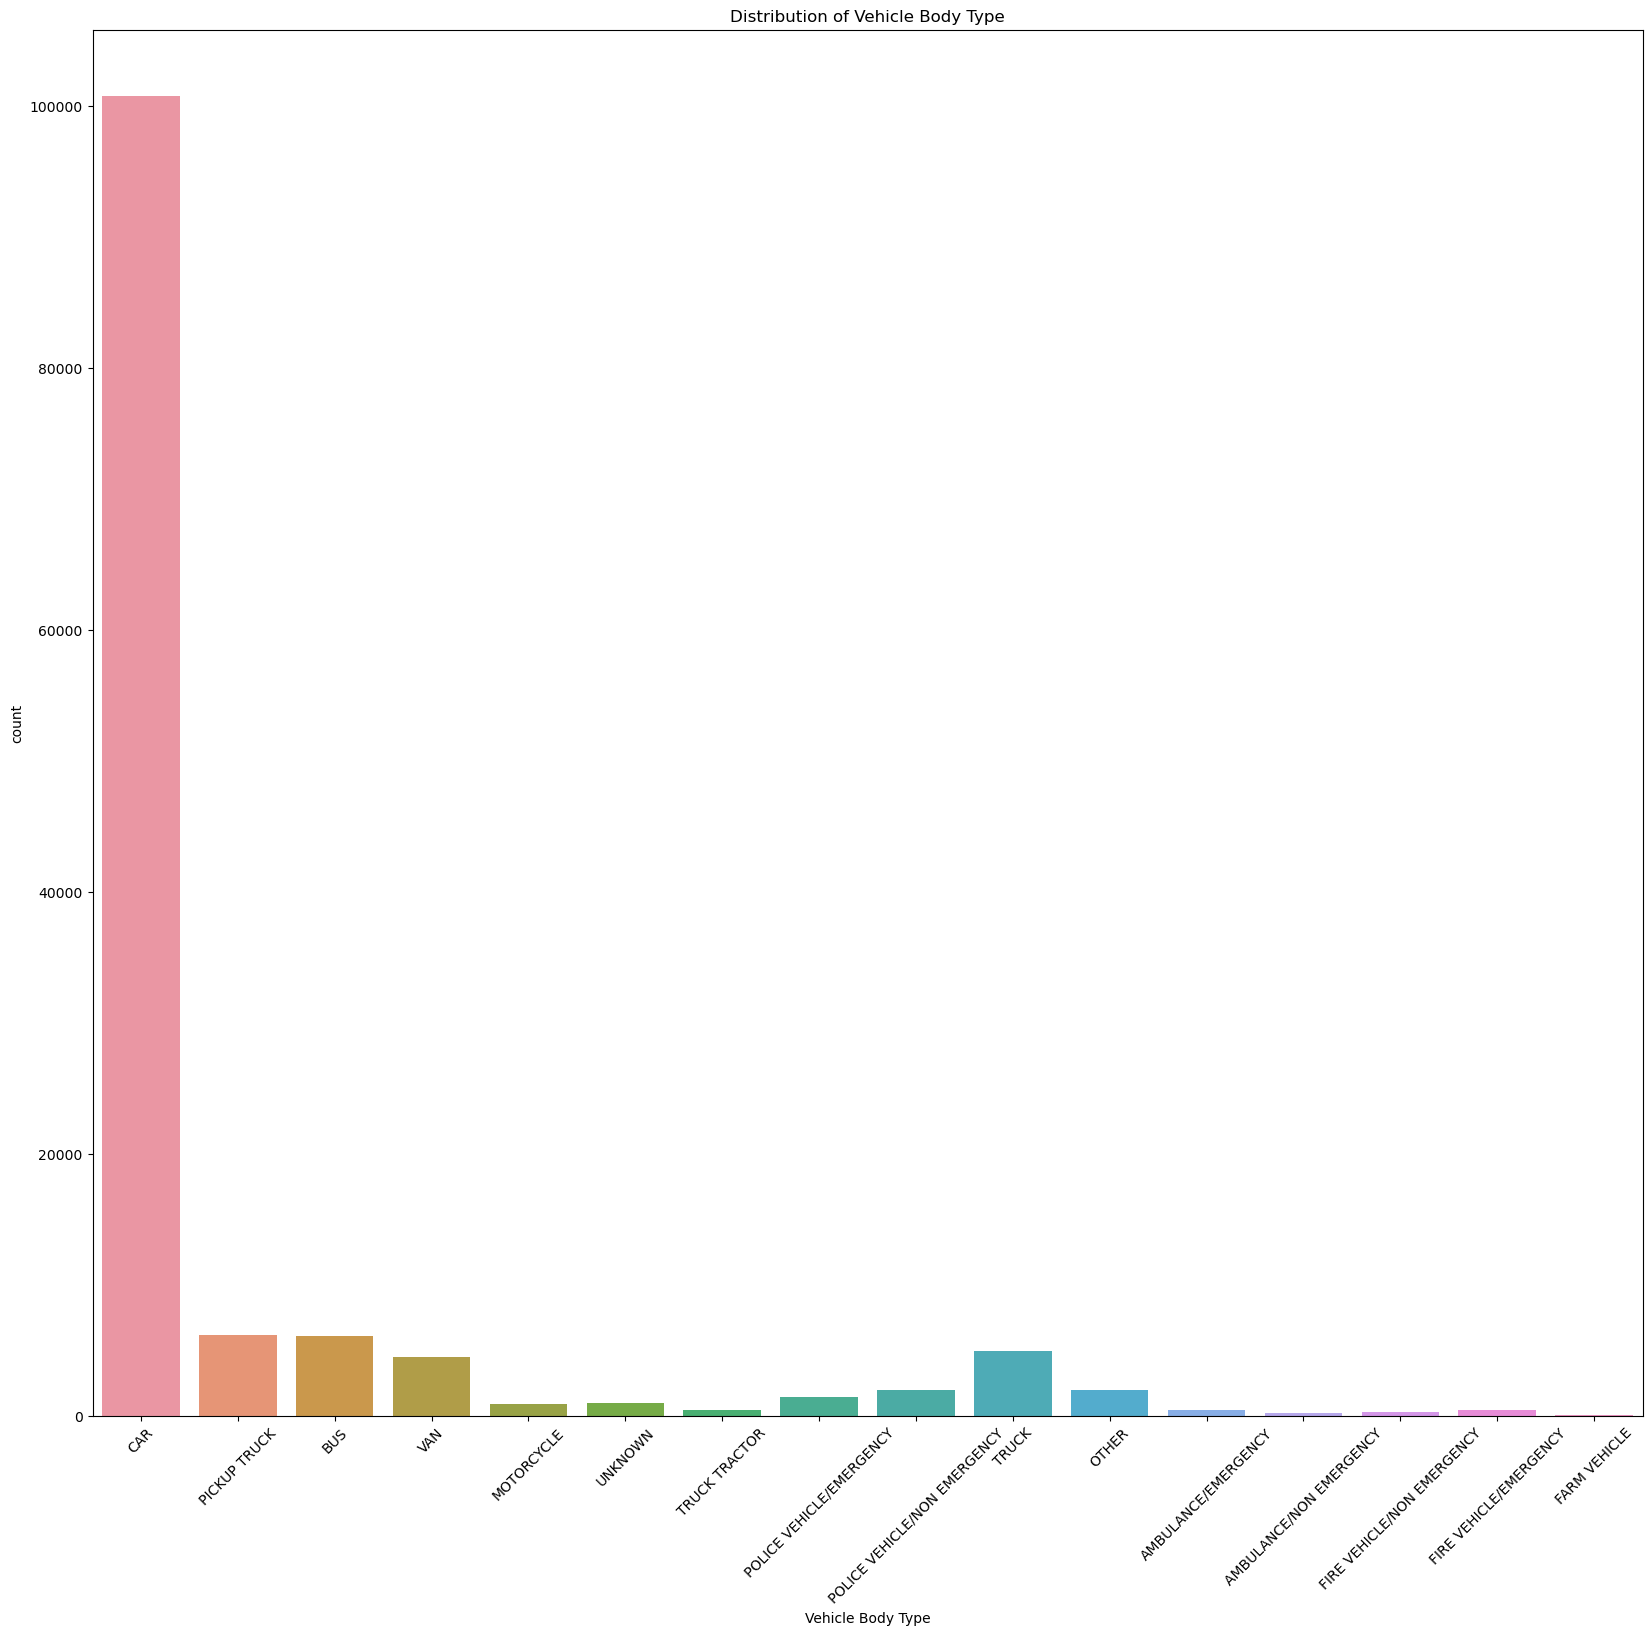

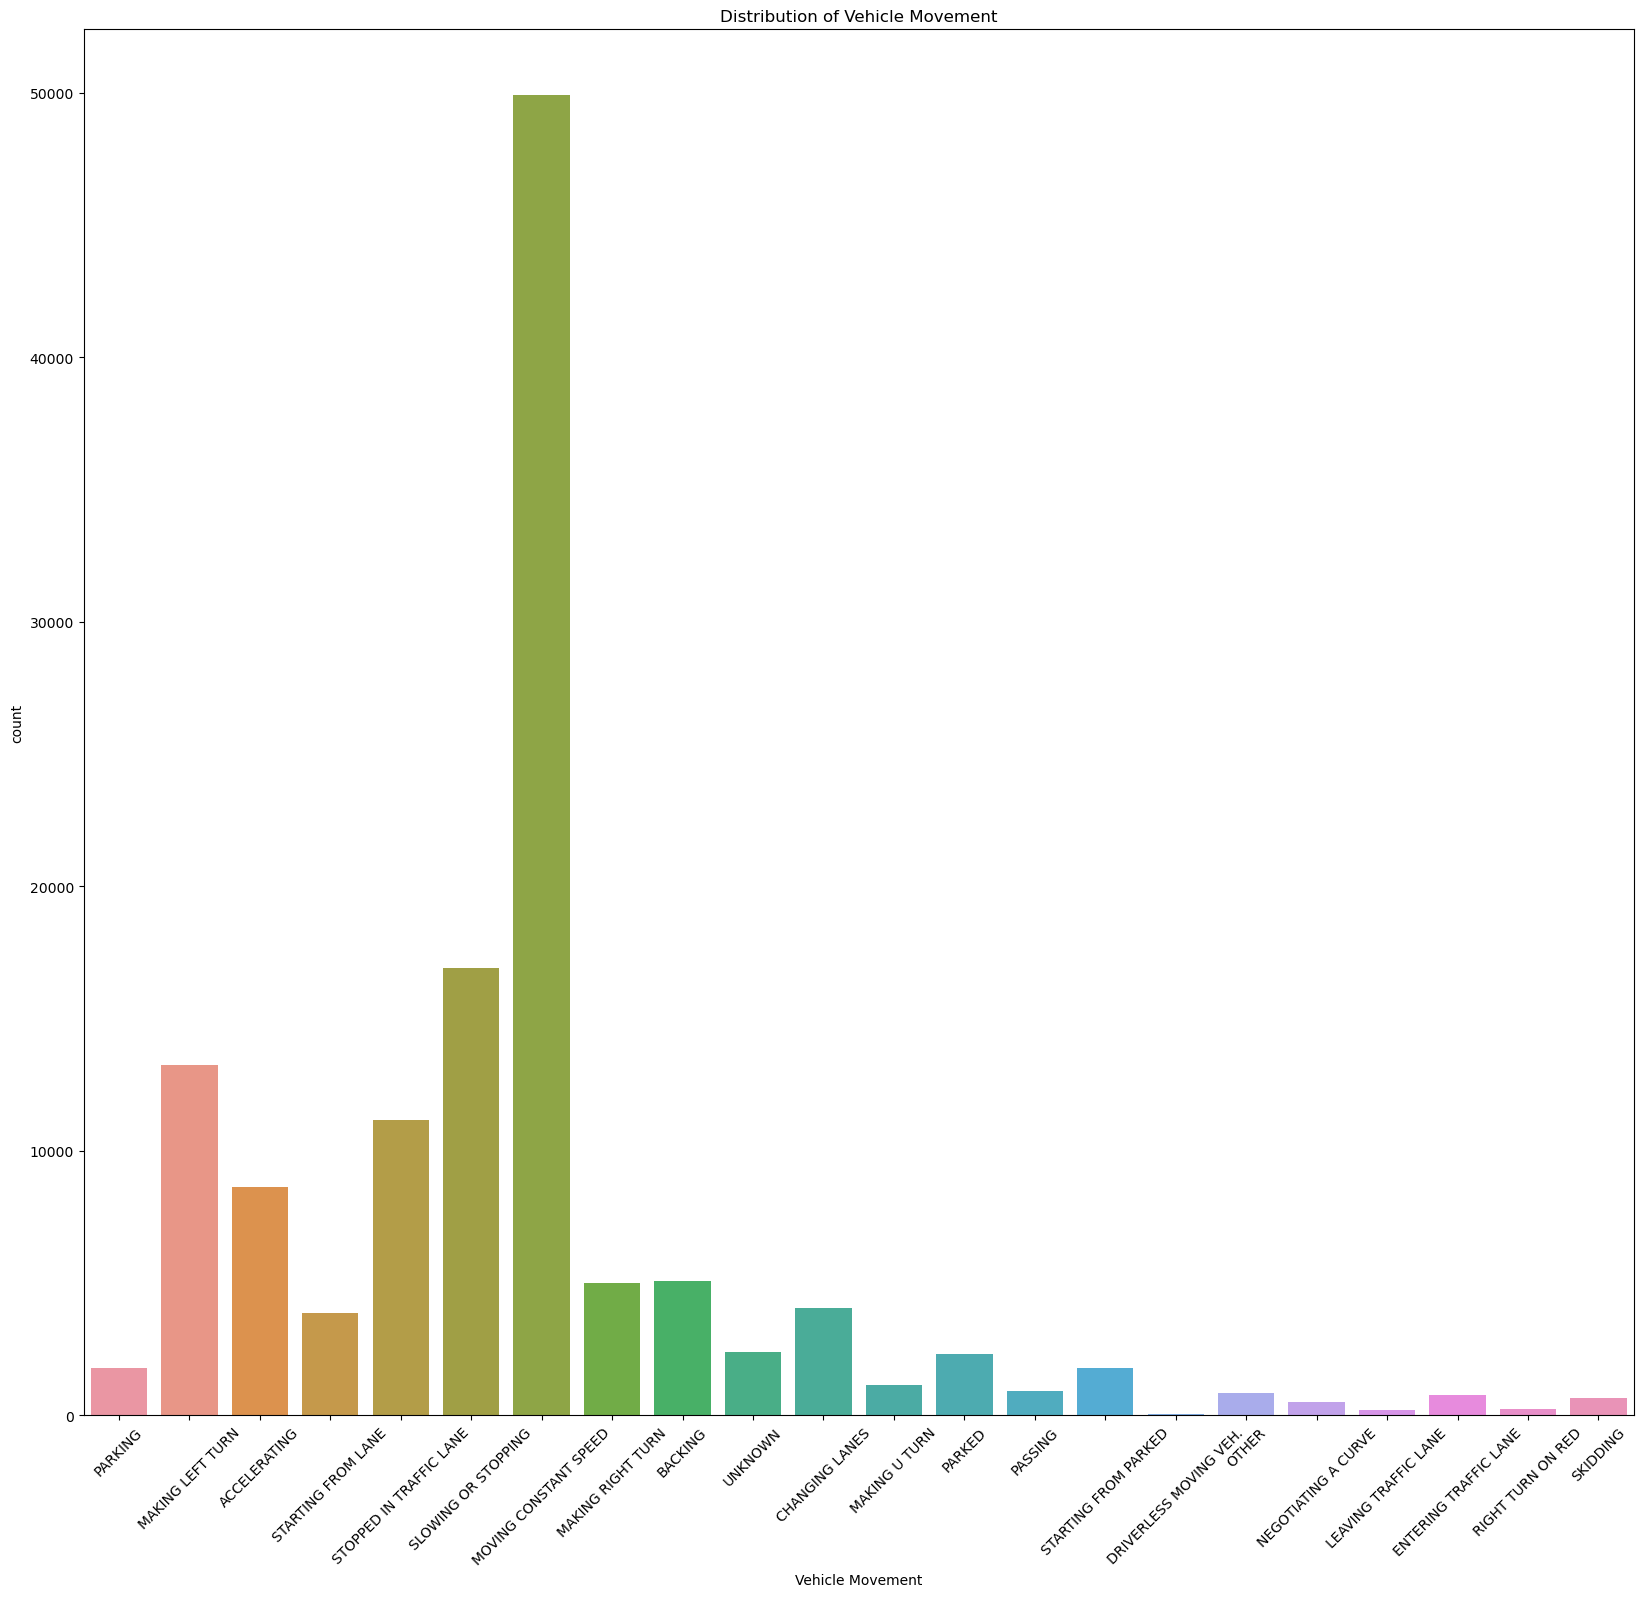

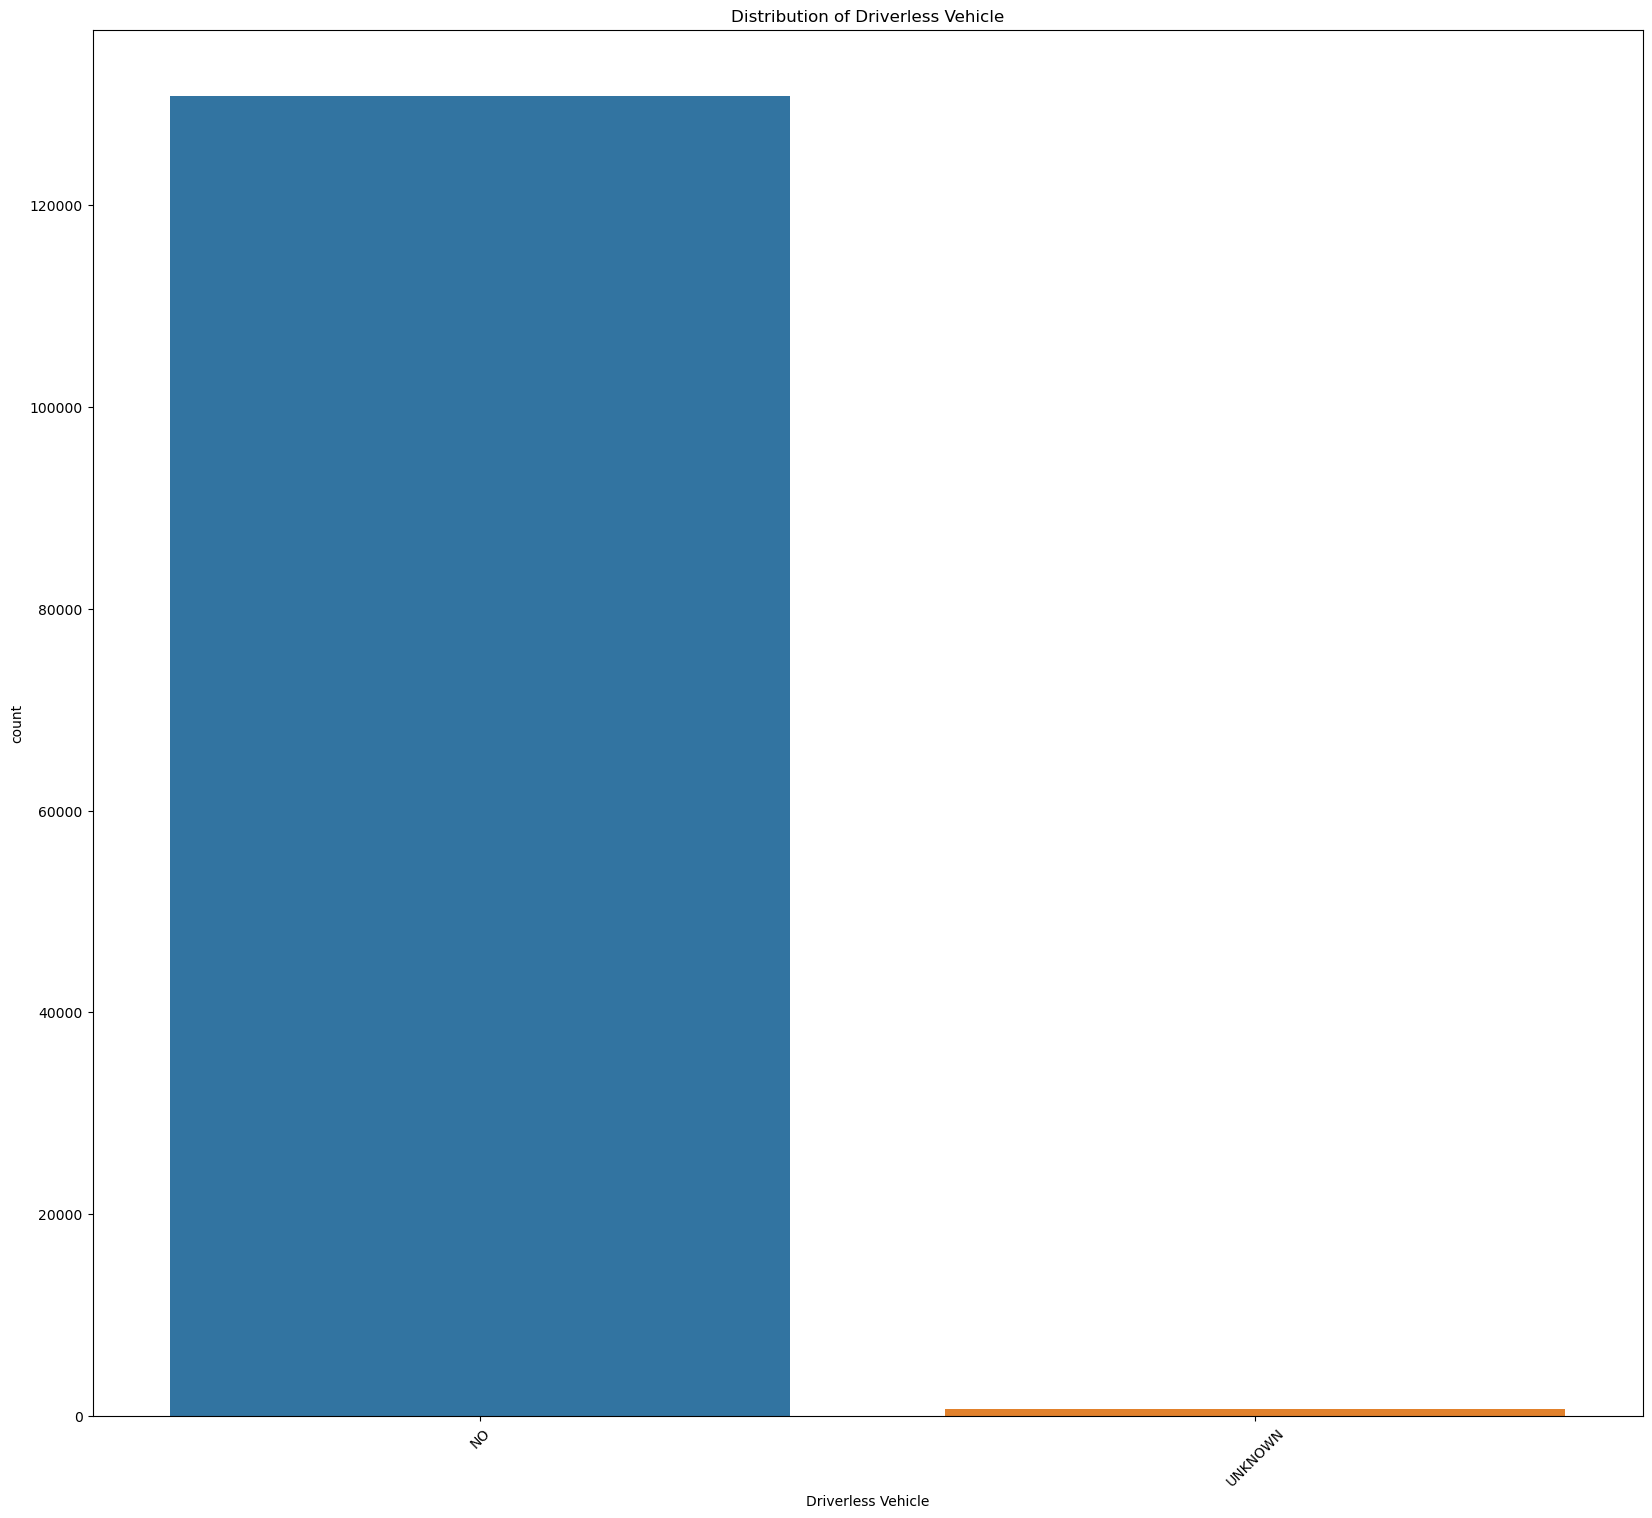

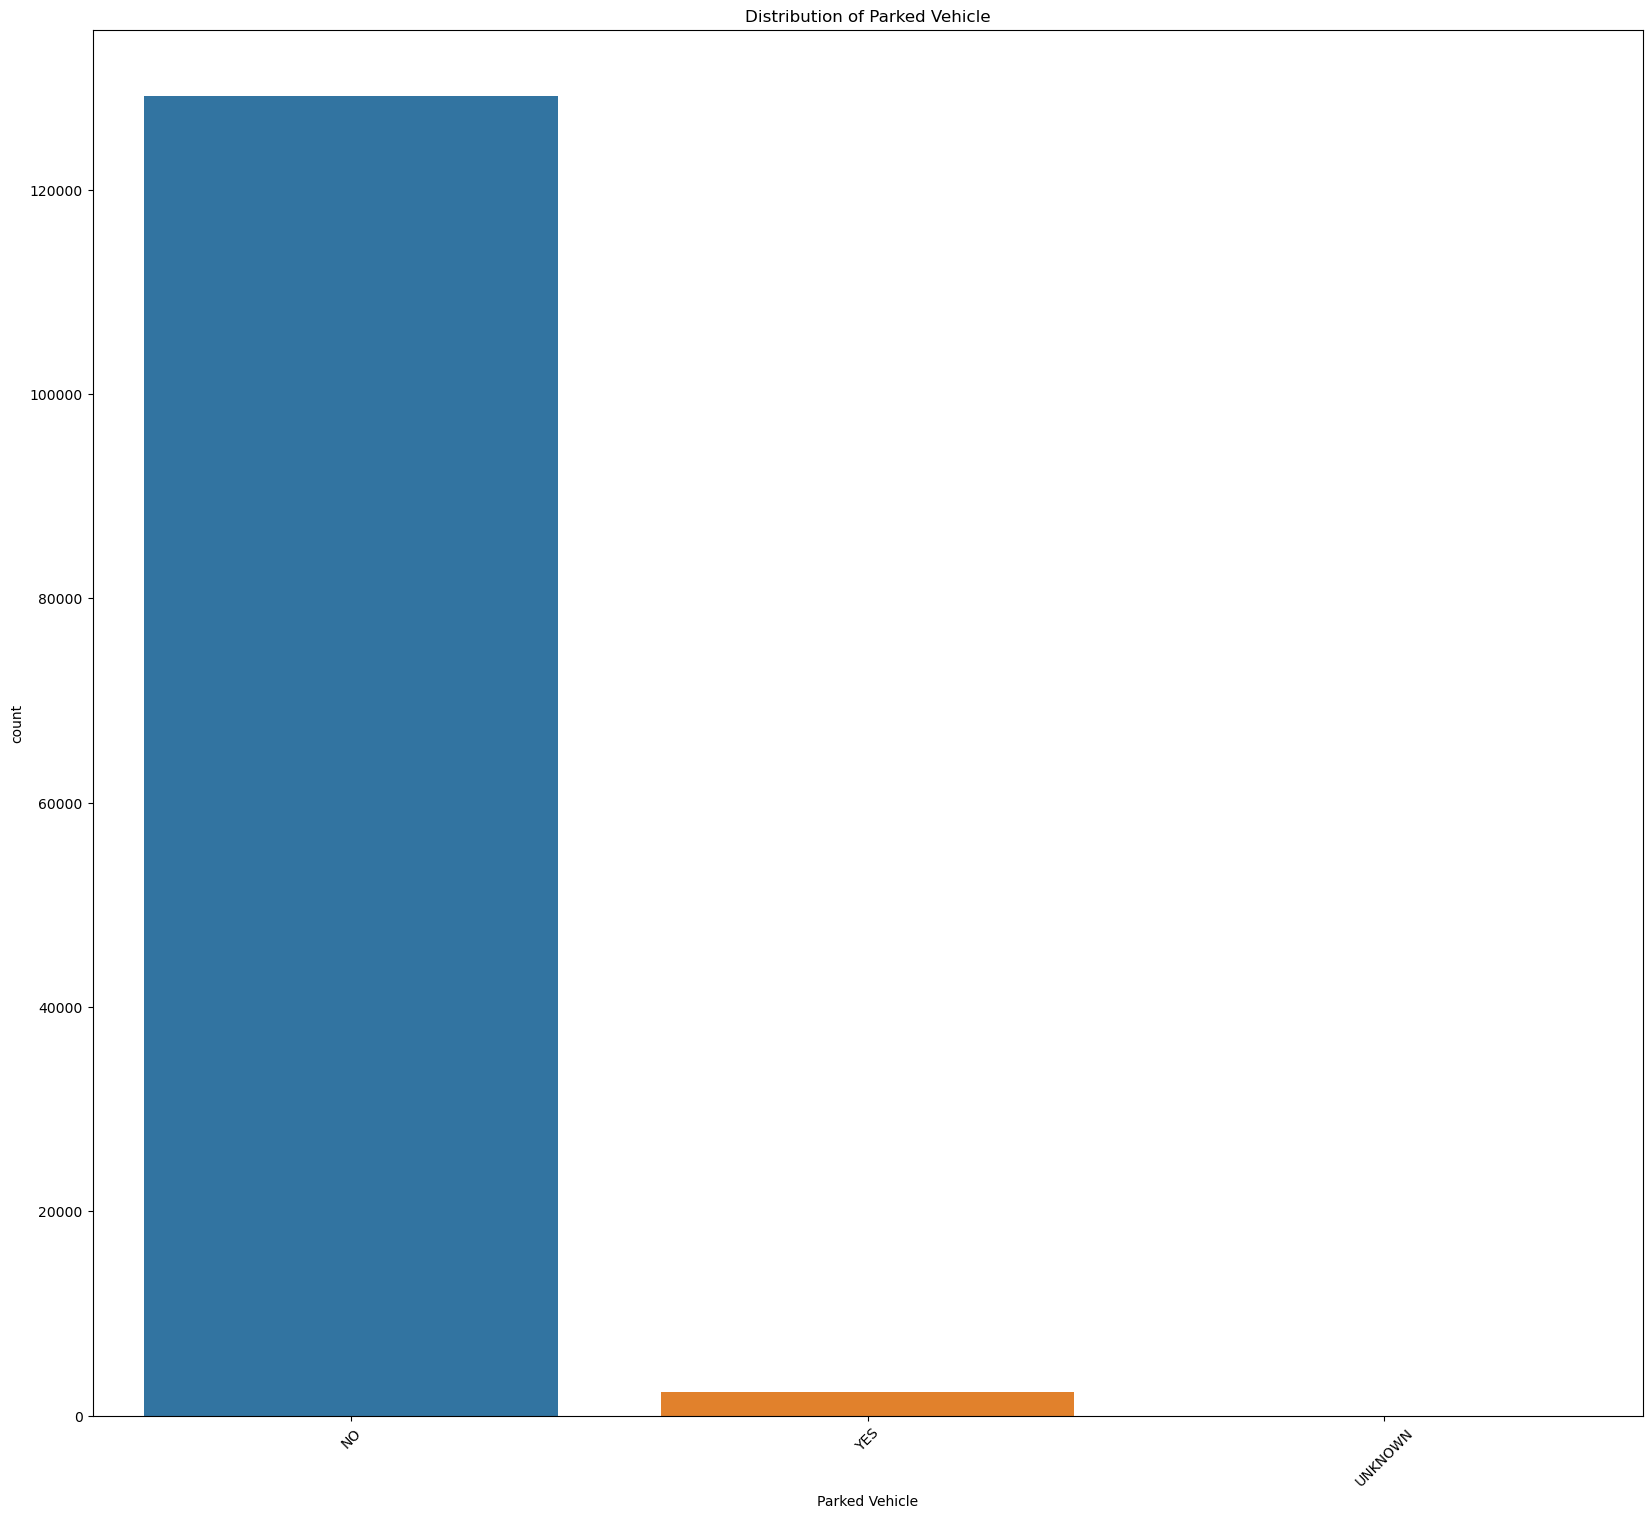

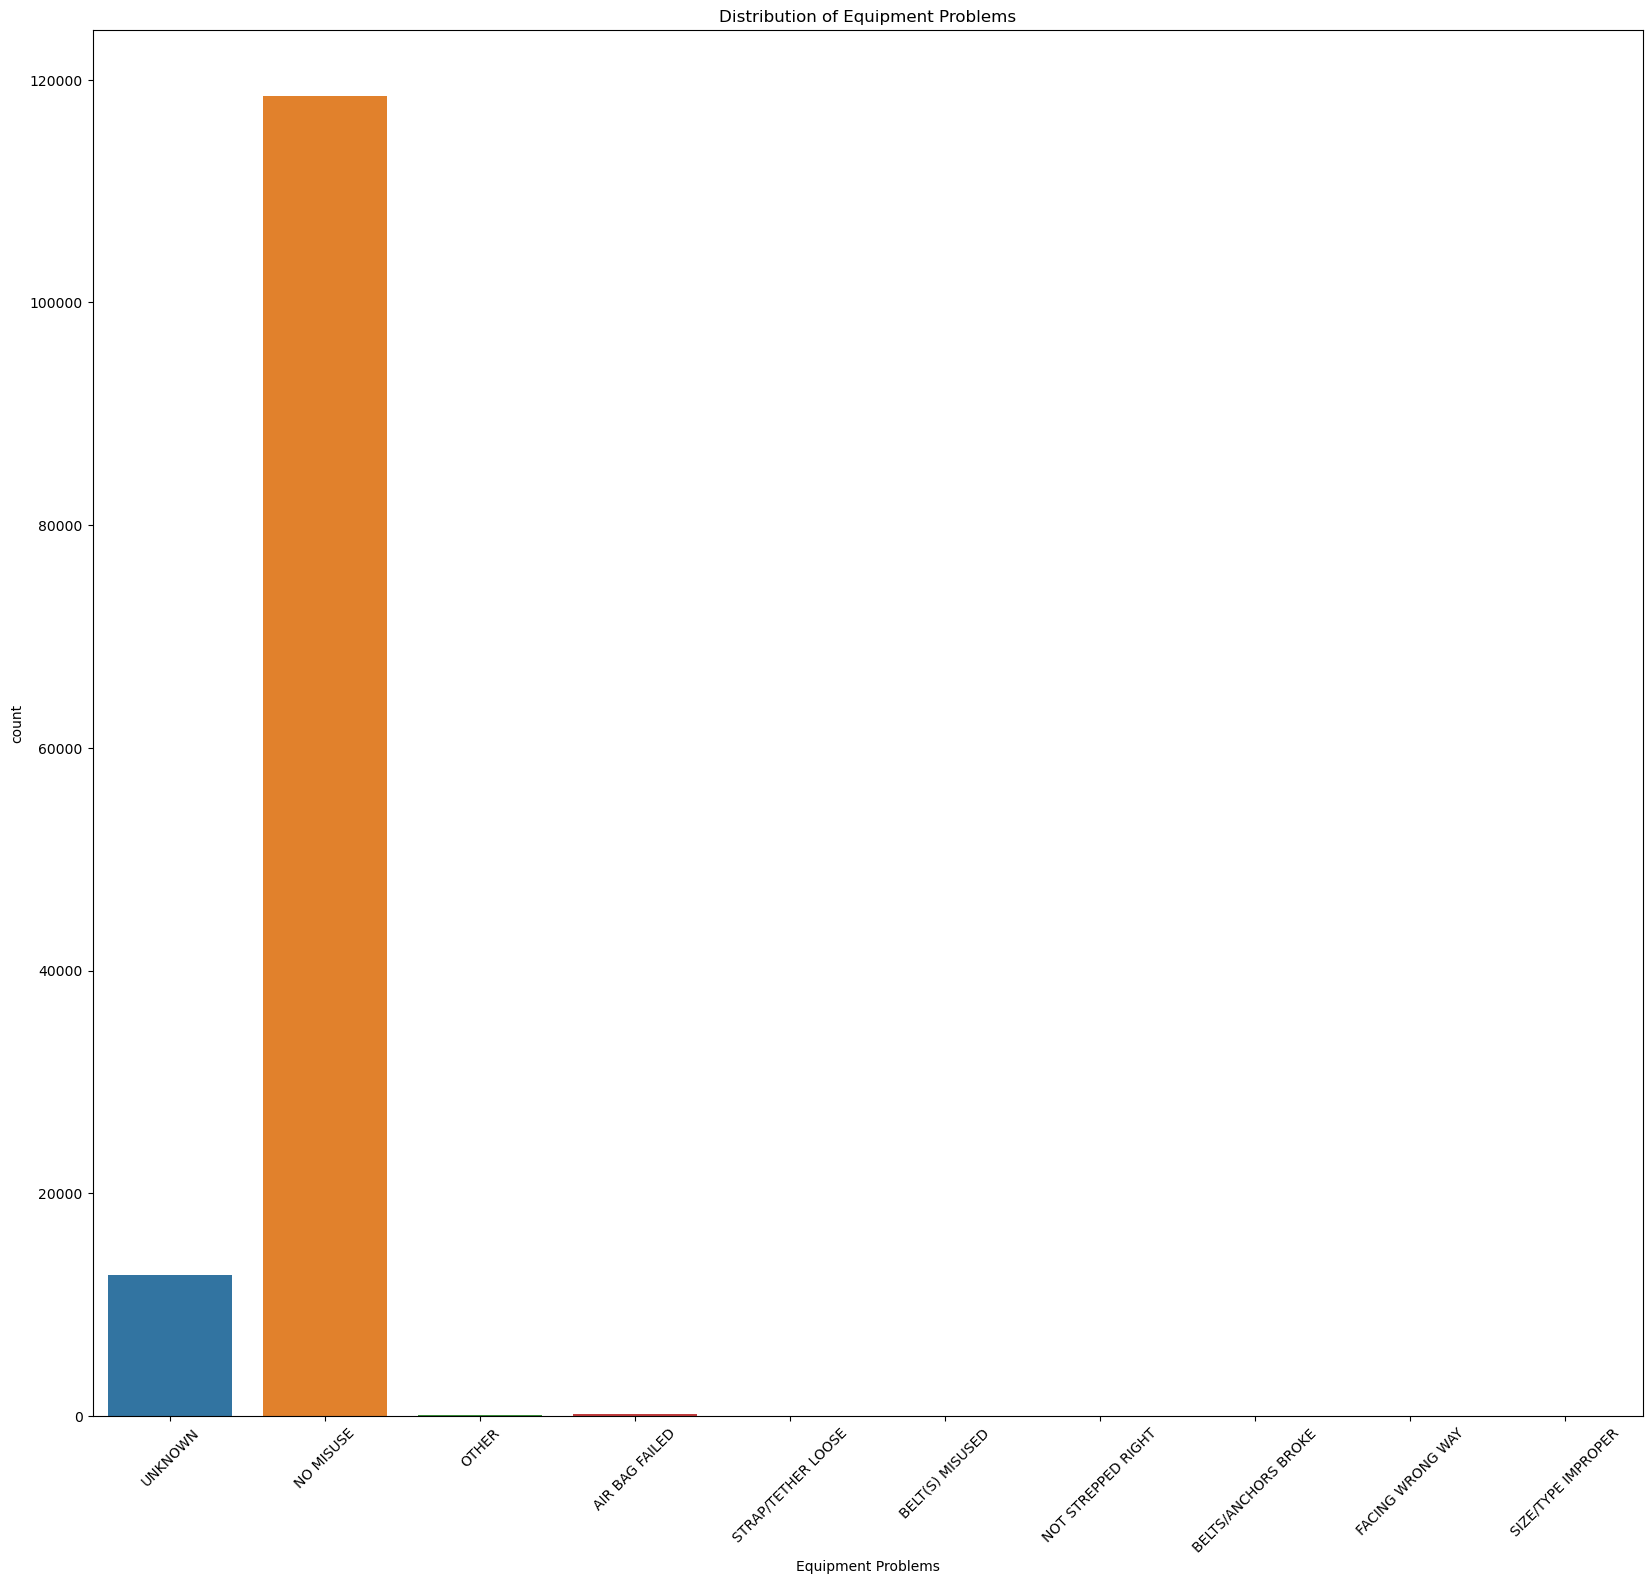

In [64]:
cat_col = crashes_data.select_dtypes(include=['object']).columns
for column in cat_col:
    plt.figure(figsize=(20, 18))
    sns.countplot(x=column, data=crashes_data)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [65]:
for column in cat_col:
    cross_tab = pd.crosstab(index=crashes_data[column], columns="count")
    print(f"\nCross-tabulation for {column}:")
    print(cross_tab)


Cross-tabulation for ACRS Report Type:
col_0                  count
ACRS Report Type            
FATAL CRASH              276
INJURY CRASH           49533
PROPERTY DAMAGE CRASH  81701
UNKNOWN                    1

Cross-tabulation for Related Non-Motorist:
col_0                    count
Related Non-Motorist          
BICYCLIST                 1090
IN ANIMAL-DRAWN VEH          1
MACHINE OPERATOR/RIDER      37
NON                     126578
OTHER                      343
PEDESTRIAN                3461
UNKNOWN                      1

Cross-tabulation for Collision Type:
col_0                         count
Collision Type                     
ANGLE MEETS LEFT HEAD ON        660
ANGLE MEETS LEFT TURN          1817
ANGLE MEETS RIGHT TURN         1115
HEAD ON                        3449
HEAD ON LEFT TURN              9120
OPPOSITE DIR BOTH LEFT TURN     272
OPPOSITE DIRECTION SIDESWIPE   2631
OTHER                         16568
SAME DIR BOTH LEFT TURN         602
SAME DIR REAR END            

In [66]:
crashes_data['Driver At Fault'].value_counts()

Driver At Fault
YES    79761
NO     51750
Name: count, dtype: int64

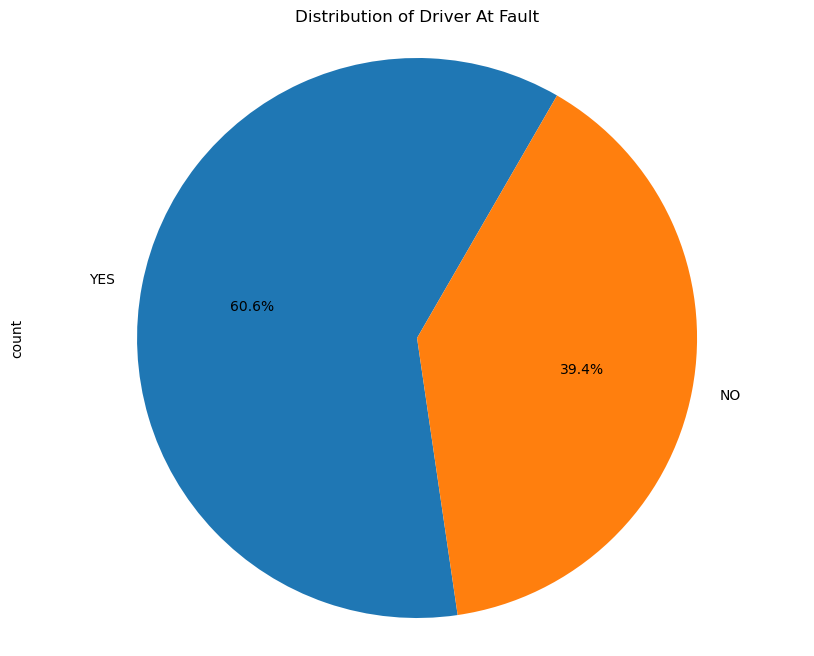

In [67]:
def plot_categorical_feature_pie(column):
    plt.figure(figsize=(10, 8))
    crashes_data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60)
    plt.title(f"Distribution of {column}")
    plt.axis('equal')  
    plt.show()


selected_feature = 'Driver At Fault'
plot_categorical_feature_pie(selected_feature)

In [68]:
crashes_data['Surface Condition'].value_counts()

Surface Condition
DRY                       102757
WET                        25538
ICE                         1005
SNOW                        1004
UNKNOWN                      734
SLUSH                        202
OTHER                        159
MUD, DIRT, GRAVEL             42
WATER(STANDING/MOVING)        40
OIL                           27
SAND                           3
Name: count, dtype: int64

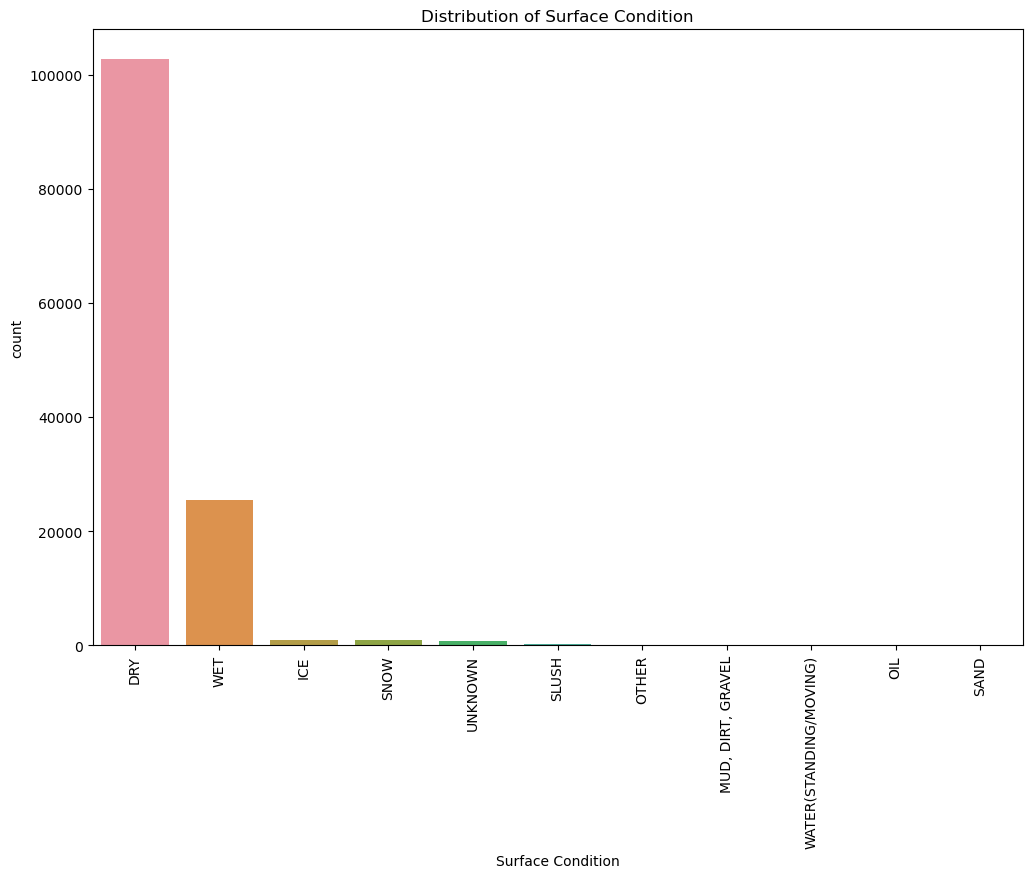

In [69]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'Surface Condition'  
plot_categorical_feature_bar(selected_feature)

In [70]:
crashes_data['Speed Limit'].value_counts()

Speed Limit
35    34668
40    23635
25    20083
30    18373
45     9929
15     5520
0      4218
50     4000
5      3734
55     3270
10     2811
20     1132
60       74
65       57
70        6
75        1
Name: count, dtype: int64

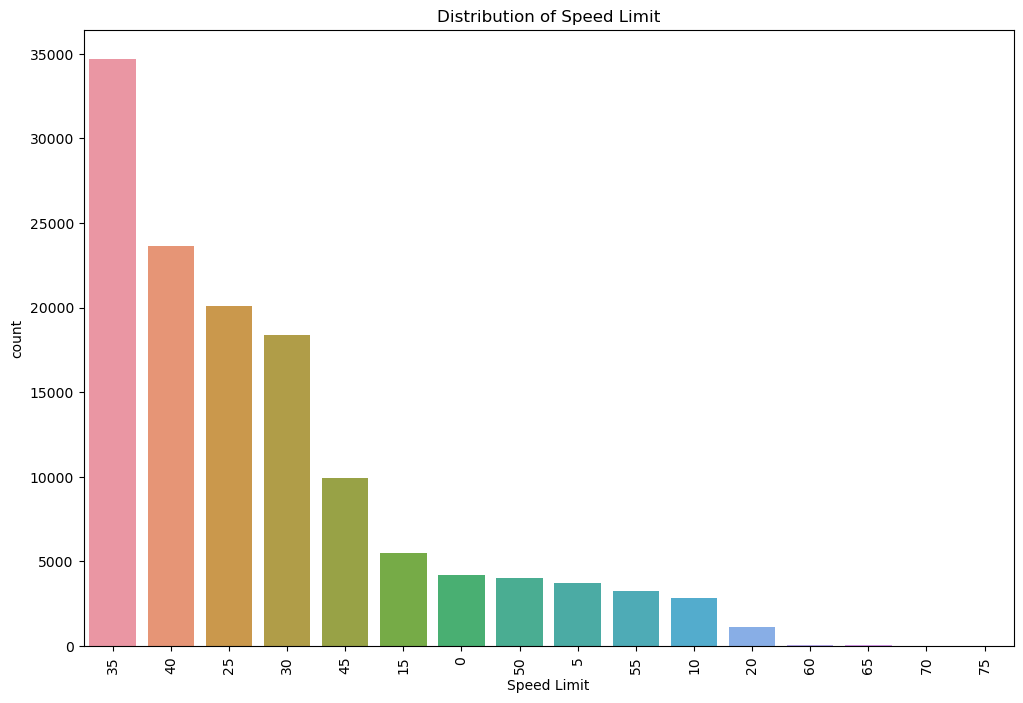

In [71]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'Speed Limit'  
plot_categorical_feature_bar(selected_feature)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


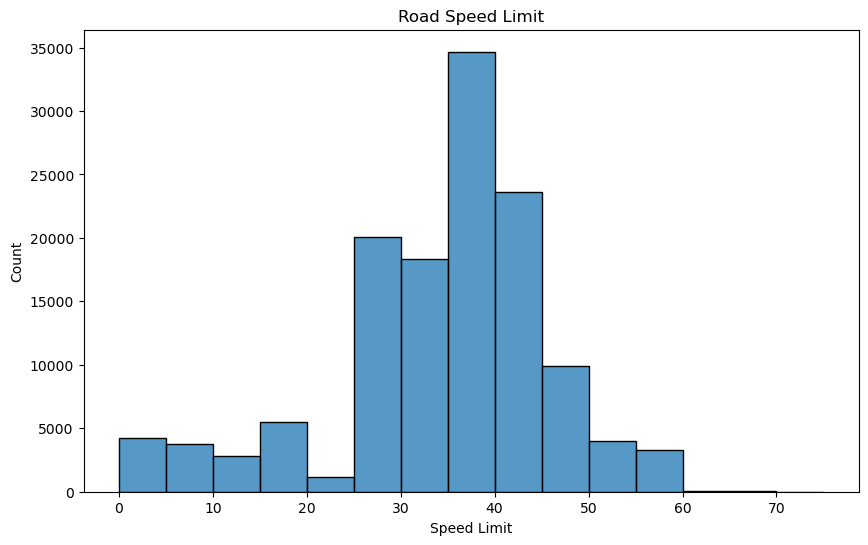

In [72]:
def plot_speed_limit_histogram(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Speed Limit', bins=15)
    plt.title('Road Speed Limit')
    plt.xlabel('Speed Limit')
    plt.show()
plot_speed_limit_histogram(crashes_data)

C:\Users\thiag\AppData\Local\Temp\ipykernel_25260\1391869761.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['Speed Limit'], shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


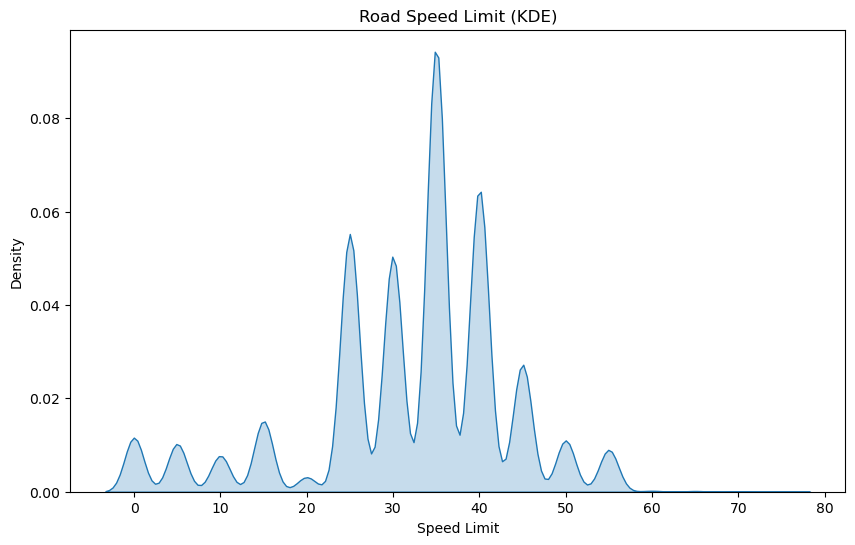

In [73]:
def plot_speed_limit_kde(data):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data['Speed Limit'], shade=True)
    plt.title('Road Speed Limit (KDE)')
    plt.xlabel('Speed Limit')
    plt.show()
plot_speed_limit_kde(crashes_data)

In [74]:
crashes_data['Collision Type'].value_counts()

Collision Type
SAME DIR REAR END               38133
STRAIGHT MOVEMENT ANGLE         21788
OTHER                           16568
SINGLE VEHICLE                  13941
SAME DIRECTION SIDESWIPE        12822
HEAD ON LEFT TURN                9120
HEAD ON                          3449
SAME DIRECTION RIGHT TURN        3401
SAME DIRECTION LEFT TURN         3211
OPPOSITE DIRECTION SIDESWIPE     2631
ANGLE MEETS LEFT TURN            1817
ANGLE MEETS RIGHT TURN           1115
SAME DIR REND LEFT TURN           720
SAME DIR REND RIGHT TURN          696
ANGLE MEETS LEFT HEAD ON          660
SAME DIR BOTH LEFT TURN           602
UNKNOWN                           565
OPPOSITE DIR BOTH LEFT TURN       272
Name: count, dtype: int64

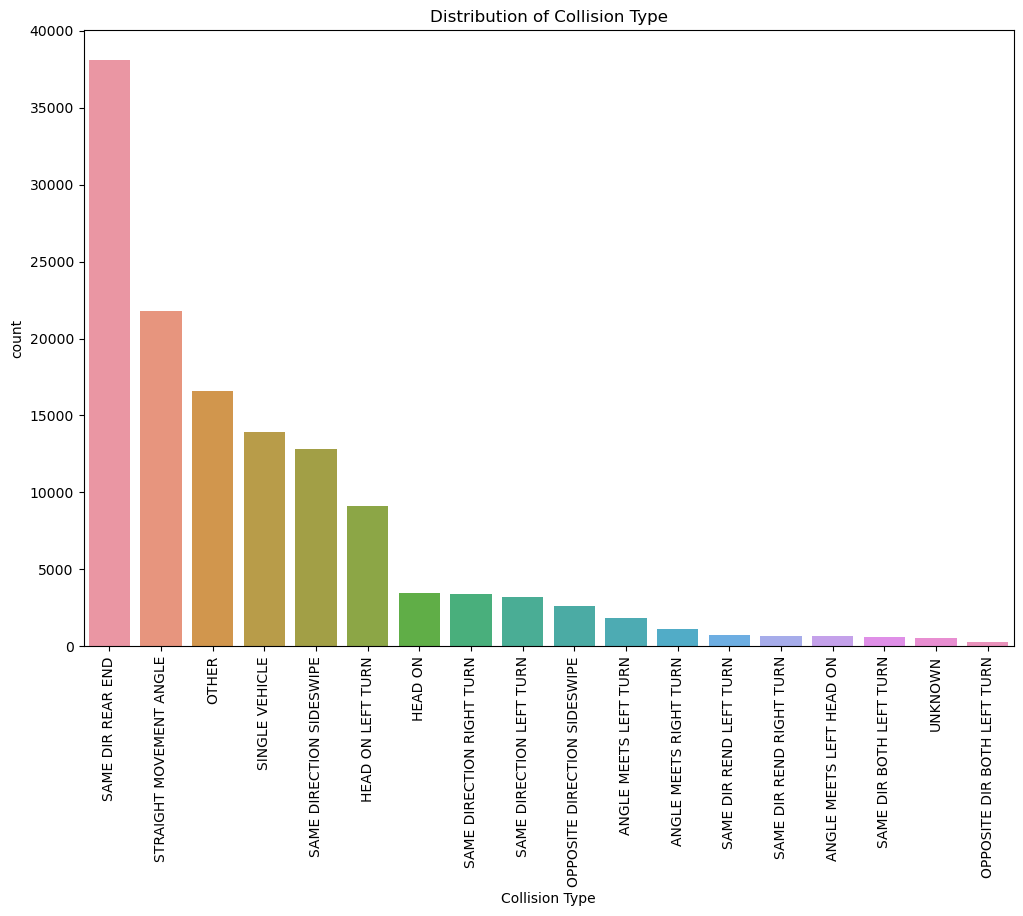

In [75]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'Collision Type'  
plot_categorical_feature_bar(selected_feature)

In [76]:
crashes_data['ACRS Report Type'].value_counts()

ACRS Report Type
PROPERTY DAMAGE CRASH    81701
INJURY CRASH             49533
FATAL CRASH                276
UNKNOWN                      1
Name: count, dtype: int64

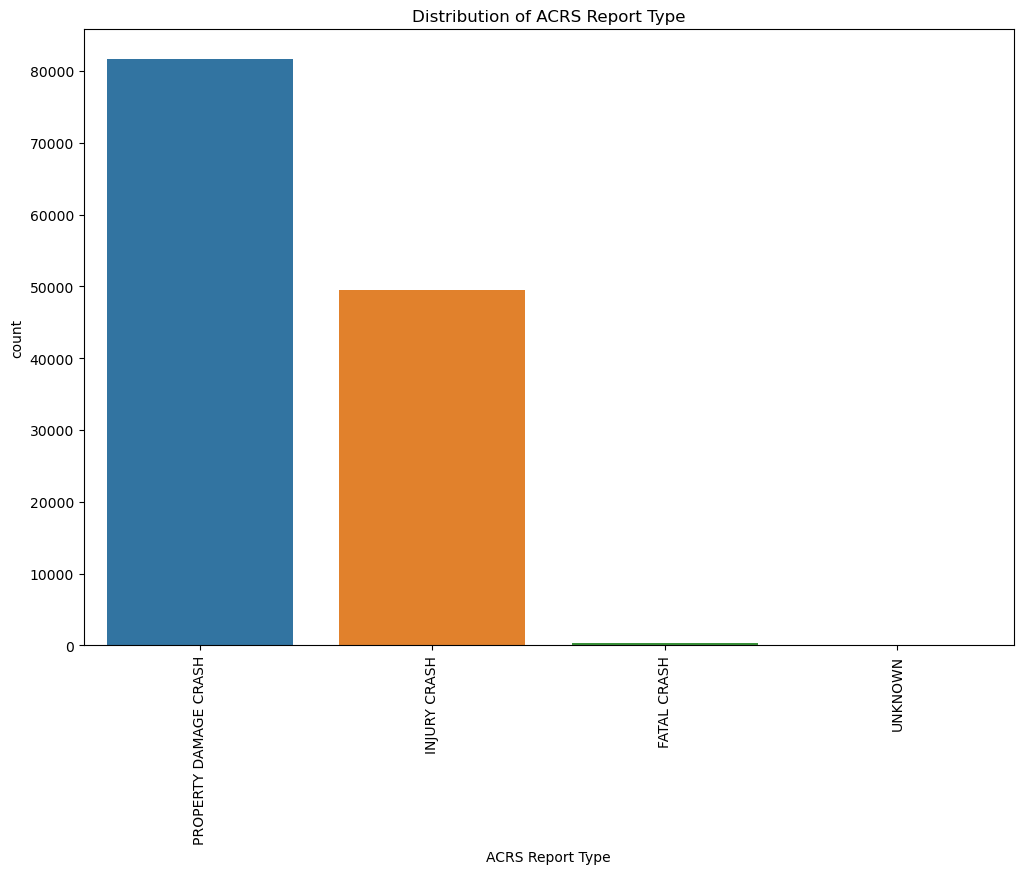

In [77]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'ACRS Report Type'  
plot_categorical_feature_bar(selected_feature)

In [78]:
crashes_data['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          107118
POSSIBLE INJURY              13340
SUSPECTED MINOR INJURY        9604
SUSPECTED SERIOUS INJURY      1332
FATAL INJURY                   116
UNKNOWN                          1
Name: count, dtype: int64

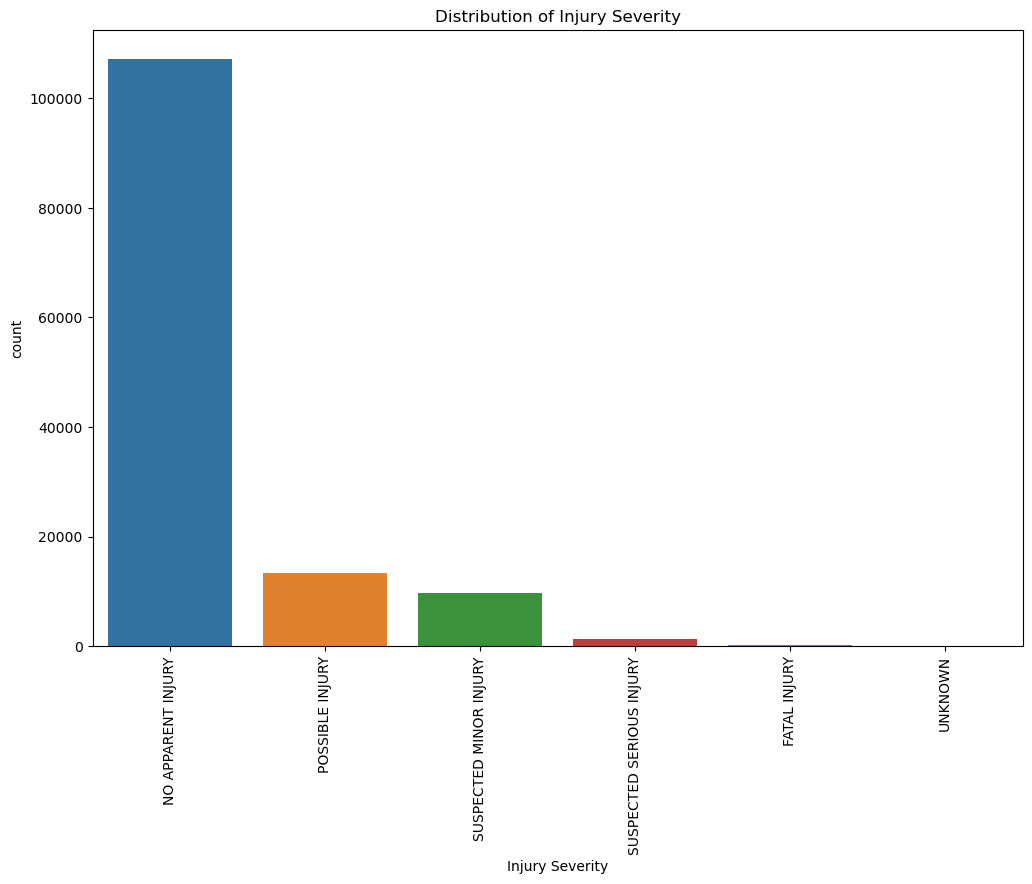

In [79]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'Injury Severity'  
plot_categorical_feature_bar(selected_feature)

In [80]:
crashes_data['Driver Substance Abuse'].value_counts()

Driver Substance Abuse
NONE DETECTED                 114870
UNKNOWN                        10672
ALCOHOL PRESENT                 5239
ILLEGAL DRUG PRESENT             358
MEDICATION PRESENT               179
COMBINED SUBSTANCE PRESENT       136
OTHER                             57
Name: count, dtype: int64

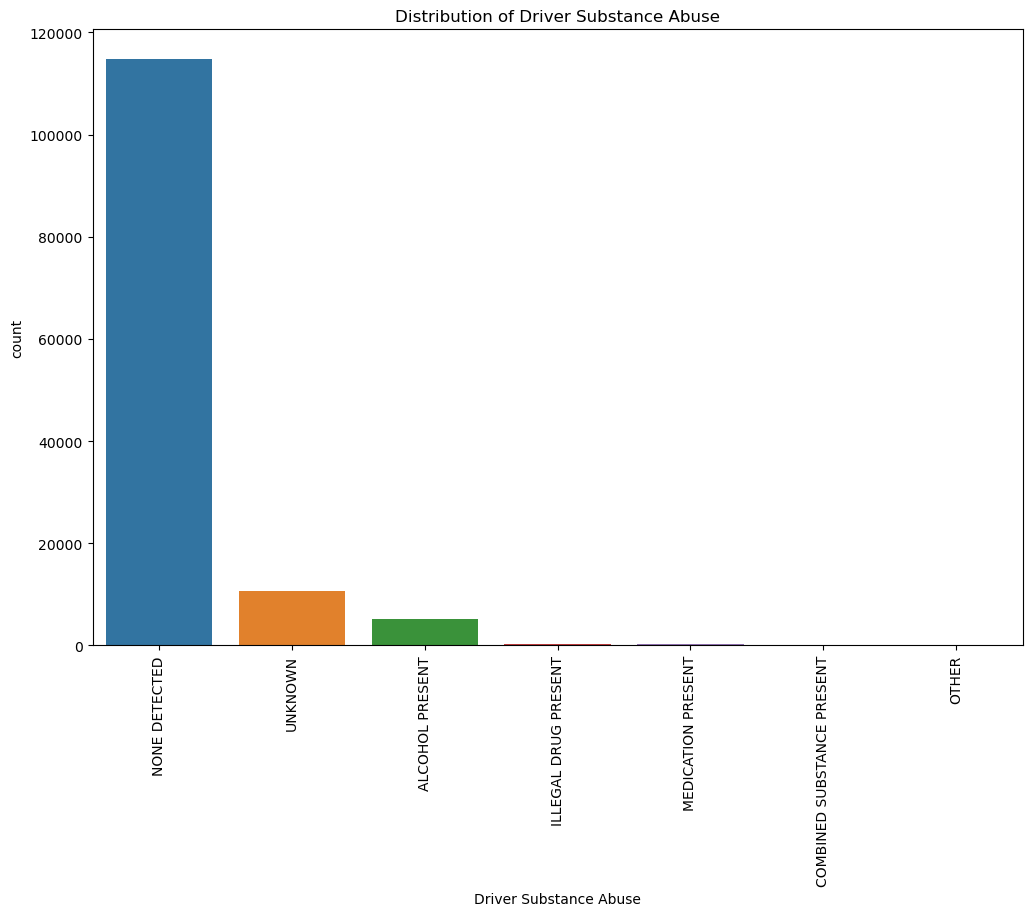

In [81]:
def plot_categorical_feature_bar(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=crashes_data, order = crashes_data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

selected_feature = 'Driver Substance Abuse'  
plot_categorical_feature_bar(selected_feature)

### Encoding Categorical Features:

In [82]:
crashes_data.columns

Index(['ACRS Report Type', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle',
       'Equipment Problems'],
      dtype='object')

In [83]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [84]:
ohe = OneHotEncoder(sparse_output=False)

In [85]:
oe_categories = [['UNKNOWN','PROPERTY DAMAGE CRASH','INJURY CRASH','FATAL CRASH'],['NO','YES'],
                 ['UNKNOWN','NO APPARENT INJURY','SUSPECTED MINOR INJURY','POSSIBLE INJURY','SUSPECTED SERIOUS INJURY','FATAL INJURY']]

In [86]:
ode = OrdinalEncoder(categories=oe_categories)

In [87]:
from sklearn.compose import make_column_transformer

In [88]:
ct = make_column_transformer(
    (ohe, ['Related Non-Motorist', 'Collision Type', 'Weather','Surface Condition', 'Light', 
           'Traffic Control','Driver Substance Abuse', 'Non-Motorist Substance Abuse',
           'Driver Distracted By','Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
           'Driverless Vehicle', 'Parked Vehicle','Equipment Problems']),
    (ode, ['ACRS Report Type', 'Driver At Fault', 'Injury Severity']),
    remainder = 'passthrough'
)

In [89]:
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Related Non-Motorist', 'Collision Type',
                                  'Weather', 'Surface Condition', 'Light',
                                  'Traffic Control', 'Driver Substance Abuse',
                                  'Non-Motorist Substance Abuse',
                                  'Driver Distracted By',
                                  'Vehicle Damage Extent', 'Vehicle Body Type',
                                  'Vehicle Movement', 'Driverless Vehicle',
                                  'Parked Vehicle', 'Equipment Problems']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['UNKNOWN',
                                                             'PROPERTY DAMAGE '
                                                             'CRASH',
                                                             'INJURY CRASH',
                                                             'FATAL CRASH'],
                                                            ['NO', 'YES'],
                                                            ['UNKNOWN',
                                                             'NO APPARENT '
                                                             'INJURY',
                                                             'SUSPECTED MINOR '
                                                             'INJURY',
                                                             'POSSIBLE INJURY',
                                                             'SUSPECTED '
                                                             'SERIOUS INJURY',
                                                             'FATAL INJURY']]),
                                 ['ACRS Report Type', 'Driver At Fault',
                                  'Injury Severity'])])

In [90]:
crashes_data = ct.fit_transform(crashes_data)

In [91]:
crashes_data

,onehotencoder__Related Non-Motorist_BICYCLIST,onehotencoder__Related Non-Motorist_IN ANIMAL-DRAWN VEH,onehotencoder__Related Non-Motorist_MACHINE OPERATOR/RIDER,onehotencoder__Related Non-Motorist_NON,onehotencoder__Related Non-Motorist_OTHER,onehotencoder__Related Non-Motorist_PEDESTRIAN,onehotencoder__Related Non-Motorist_UNKNOWN,onehotencoder__Collision Type_ANGLE MEETS LEFT HEAD ON,onehotencoder__Collision Type_ANGLE MEETS LEFT TURN,onehotencoder__Collision Type_ANGLE MEETS RIGHT TURN,onehotencoder__Collision Type_HEAD ON,onehotencoder__Collision Type_HEAD ON LEFT TURN,onehotencoder__Collision Type_OPPOSITE DIR BOTH LEFT TURN,onehotencoder__Collision Type_OPPOSITE DIRECTION SIDESWIPE,onehotencoder__Collision Type_OTHER,onehotencoder__Collision Type_SAME DIR BOTH LEFT TURN,onehotencoder__Collision Type_SAME DIR REAR END,onehotencoder__Collision Type_SAME DIR REND LEFT TURN,onehotencoder__Collision Type_SAME DIR REND RIGHT TURN,onehotencoder__Collision Type_SAME DIRECTION LEFT TURN,onehotencoder__Collision Type_SAME DIRECTION RIGHT TURN,onehotencoder__Collision Type_SAME DIRECTION SIDESWIPE,onehotencoder__Collision Type_SINGLE VEHICLE,onehotencoder__Collision Type_STRAIGHT MOVEMENT ANGLE,onehotencoder__Collision Type_UNKNOWN,...,onehotencoder__Vehicle Movement_SKIDDING,onehotencoder__Vehicle Movement_SLOWING OR STOPPING,onehotencoder__Vehicle Movement_STARTING FROM LANE,onehotencoder__Vehicle Movement_STARTING FROM PARKED,onehotencoder__Vehicle Movement_STOPPED IN TRAFFIC LANE,onehotencoder__Vehicle Movement_UNKNOWN,onehotencoder__Driverless Vehicle_NO,onehotencoder__Driverless Vehicle_UNKNOWN,onehotencoder__Parked Vehicle_NO,onehotencoder__Parked Vehicle_UNKNOWN,onehotencoder__Parked Vehicle_YES,onehotencoder__Equipment Problems_AIR BAG FAILED,onehotencoder__Equipment Problems_BELT(S) MISUSED,onehotencoder__Equipment Problems_BELTS/ANCHORS BROKE,onehotencoder__Equipment Problems_FACING WRONG WAY,onehotencoder__Equipment Problems_NO MISUSE,onehotencoder__Equipment Problems_NOT STREPPED RIGHT,onehotencoder__Equipment Problems_OTHER,onehotencoder__Equipment Problems_SIZE/TYPE IMPROPER,onehotencoder__Equipment Problems_STRAP/TETHER LOOSE,onehotencoder__Equipment Problems_UNKNOWN,ordinalencoder__ACRS Report Type,ordinalencoder__Driver At Fault,ordinalencoder__Injury Severity,remainder__Speed Limit
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,40
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,35
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,40
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131506,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,50
131507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,25
131508,0.

In [92]:
pd.set_option('display.max_columns', 200)  # Show all columns
columns = pd.DataFrame(crashes_data.columns, columns=['Column Name'])
columns.transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
Column Name,onehotencoder__Related Non-Motorist_BICYCLIST,onehotencoder__Related Non-Motorist_IN ANIMAL-...,onehotencoder__Related Non-Motorist_MACHINE OP...,onehotencoder__Related Non-Motorist_NON,onehotencoder__Related Non-Motorist_OTHER,onehotencoder__Related Non-Motorist_PEDESTRIAN,onehotencoder__Related Non-Motorist_UNKNOWN,onehotencoder__Collision Type_ANGLE MEETS LEFT...,onehotencoder__Collision Type_ANGLE MEETS LEFT...,onehotencoder__Collision Type_ANGLE MEETS RIGH...,onehotencoder__Collision Type_HEAD ON,onehotencoder__Collision Type_HEAD ON LEFT TURN,onehotencoder__Collision Type_OPPOSITE DIR BOT...,onehotencoder__Collision Type_OPPOSITE DIRECTI...,onehotencoder__Collision Type_OTHER,onehotencoder__Collision Type_SAME DIR BOTH LE...,onehotencoder__Collision Type_SAME DIR REAR END,onehotencoder__Collision Type_SAME DIR REND LE...,onehotencoder__Collision Type_SAME DIR REND RI...,onehotencoder__Collision Type_SAME DIRECTION L...,onehotencoder__Collision Type_SAME DIRECTION R...,onehotencoder__Collision Type_SAME DIRECTION S...,onehotencoder__Collision Type_SINGLE VEHICLE,onehotencoder__Collision Type_STRAIGHT MOVEMEN...,onehotencoder__Collision Type_UNKNOWN,"onehotencoder__Weather_BLOWING SAND, SOIL, DIRT",onehotencoder__Weather_BLOWING SNOW,onehotencoder__Weather_CLEAR,onehotencoder__Weather_CLOUDY,onehotencoder__Weather_FOGGY,onehotencoder__Weather_OTHER,onehotencoder__Weather_RAINING,onehotencoder__Weather_SEVERE WINDS,onehotencoder__Weather_SLEET,onehotencoder__Weather_SNOW,onehotencoder__Weather_UNKNOWN,onehotencoder__Weather_WINTRY MIX,onehotencoder__Surface Condition_DRY,onehotencoder__Surface Condition_ICE,"onehotencoder__Surface Condition_MUD, DIRT, GR...",onehotencoder__Surface Condition_OIL,onehotencoder__Surface Condition_OTHER,onehotencoder__Surface Condition_SAND,onehotencoder__Surface Condition_SLUSH,onehotencoder__Surface Condition_SNOW,onehotencoder__Surface Condition_UNKNOWN,onehotencoder__Surface Condition_WATER(STANDIN...,onehotencoder__Surface Condition_WET,onehotencoder__Light_DARK -- UNKNOWN LIGHTING,onehotencoder__Light_DARK LIGHTS ON,onehotencoder__Light_DARK NO LIGHTS,onehotencoder__Light_DAWN,onehotencoder__Light_DAYLIGHT,onehotencoder__Light_DUSK,onehotencoder__Light_OTHER,onehotencoder__Light_UNKNOWN,onehotencoder__Traffic Control_FLASHING TRAFFI...,onehotencoder__Traffic Control_NO CONTROLS,onehotencoder__Traffic Control_OTHER,onehotencoder__Traffic Control_PERSON,onehotencoder__Traffic Control_RAILWAY CROSSIN...,onehotencoder__Traffic Control_SCHOOL ZONE SIG...,onehotencoder__Traffic Control_STOP SIGN,onehotencoder__Traffic Control_TRAFFIC SIGNAL,onehotencoder__Traffic Control_UNKNOWN,onehotencoder__Traffic Control_WARNING SIGN,onehotencoder__Traffic Control_YIELD SIGN,onehotencoder__Driver Substance Abuse_ALCOHOL ...,onehotencoder__Driver Substance Abuse_COMBINED...,onehotencoder__Driver Substance Abuse_ILLEGAL ...,onehotencoder__Driver Substance Abuse_MEDICATI...,onehotencoder__Driver Substance Abuse_NONE DET...,onehotencoder__Driver Substance Abuse_OTHER,onehotencoder__Driver Substance Abuse_UNKNOWN,onehotencoder__Non-Motorist Substance Abuse_AL...,onehotencoder__Non-Motorist Substance Abuse_CO...,onehotencoder__Non-Motorist Substance Abuse_IL...,onehotencoder__Non-Motorist Substance Abuse_ME...,onehotencoder__Non-Motorist Substance Abuse_NON,onehotencoder__Non-Motorist Substance Abuse_NO...,onehotencoder__Non-Motorist Substance Abuse_OTHER,onehotencoder__Non-Motorist Subs

In [93]:
columns.shape

(158, 1)

In [94]:
remove_words = ['onehotencoder__','ordinalencoder__', 'remainder__']

In [95]:
for word in remove_words:
    crashes_data.columns = crashes_data.columns.str.replace(word, '')

In [96]:
crashes_data

,Related Non-Motorist_BICYCLIST,Related Non-Motorist_IN ANIMAL-DRAWN VEH,Related Non-Motorist_MACHINE OPERATOR/RIDER,Related Non-Motorist_NON,Related Non-Motorist_OTHER,Related Non-Motorist_PEDESTRIAN,Related Non-Motorist_UNKNOWN,Collision Type_ANGLE MEETS LEFT HEAD ON,Collision Type_ANGLE MEETS LEFT TURN,Collision Type_ANGLE MEETS RIGHT TURN,Collision Type_HEAD ON,Collision Type_HEAD ON LEFT TURN,Collision Type_OPPOSITE DIR BOTH LEFT TURN,Collision Type_OPPOSITE DIRECTION SIDESWIPE,Collision Type_OTHER,Collision Type_SAME DIR BOTH LEFT TURN,Collision Type_SAME DIR REAR END,Collision Type_SAME DIR REND LEFT TURN,Collision Type_SAME DIR REND RIGHT TURN,Collision Type_SAME DIRECTION LEFT TURN,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Collision Type_UNKNOWN,"Weather_BLOWING SAND, SOIL, DIRT",Weather_BLOWING SNOW,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_OTHER,Weather_RAINING,Weather_SEVERE WINDS,Weather_SLEET,Weather_SNOW,Weather_UNKNOWN,Weather_WINTRY MIX,Surface Condition_DRY,Surface Condition_ICE,"Surface Condition_MUD, DIRT, GRAVEL",Surface Condition_OIL,Surface Condition_OTHER,Surface Condition_SAND,Surface Condition_SLUSH,Surface Condition_SNOW,Surface Condition_UNKNOWN,Surface Condition_WATER(STANDING/MOVING),Surface Condition_WET,Light_DARK -- UNKNOWN LIGHTING,Light_DARK LIGHTS ON,Light_DARK NO LIGHTS,Light_DAWN,Light_DAYLIGHT,Light_DUSK,Light_OTHER,Light_UNKNOWN,Traffic Control_FLASHING TRAFFIC SIGNAL,Traffic Control_NO CONTROLS,Traffic Control_OTHER,Traffic Control_PERSON,Traffic Control_RAILWAY CROSSING DEVICE,Traffic Control_SCHOOL ZONE SIGN DEVICE,Traffic Control_STOP SIGN,Traffic Control_TRAFFIC SIGNAL,Traffic Control_UNKNOWN,Traffic Control_WARNING SIGN,Traffic Control_YIELD SIGN,Driver Substance Abuse_ALCOHOL PRESENT,Driver Substance Abuse_COMBINED SUBSTANCE PRESENT,Driver Substance Abuse_ILLEGAL DRUG PRESENT,Driver Substance Abuse_MEDICATION PRESENT,Driver Substance Abuse_NONE DETECTED,Driver Substance Abuse_OTHER,Driver Substance Abuse_UNKNOWN,Non-Motorist Substance Abuse_ALCOHOL PRESENT,Non-Motorist Substance Abuse_COMBINED SUBSTANCE PRESENT,Non-Motorist Substance Abuse_ILLEGAL DRUG PRESENT,Non-Motorist Substance Abuse_MEDICATION PRESENT,Non-Motorist Substance Abuse_NON,Non-Motorist Substance Abuse_NONE DETECTED,Non-Motorist Substance Abuse_OTHER,Non-Motorist Substance Abuse_UNKNOWN,Driver Distracted By_ADJUSTING AUDIO AND OR CLIMATE CONTROLS,Driver Distracted By_BY MOVING OBJECT IN VEHICLE,Driver Distracted By_DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT,Driver Distracted By_EATING OR DRINKING,Driver Distracted By_INATTENTIVE OR LOST IN THOUGHT,Driver Distracted By_LOOKED BUT DID NOT SEE,Driver Distracted By_MOBILEPHONE,Driver Distracted By_NO DRIVER PRESENT,Driver Distracted By_NOT DISTRACTED,Driver Distracted By_OTHER DISTRACTION,Driver Distracted By_SMOKING RELATED,Driver Distracted By_UNKNOWN,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL,Vehicle Damage Extent_UNKNOWN,Vehicle Body Type_AMBULANCE/EMERGENCY,Vehicle Body Type_AMBULANCE/NON EMERGENCY,Vehicle Body Type_BUS,Vehicle Body Type_CAR,Vehicle Body Type_FARM VEHICLE,Vehicle Body Type_FIRE VEHICLE/EMERGENCY,Vehicle Body Type_FIRE VEHICLE/NON EMERGENCY,Vehicle Body Type_MOTORCYCLE,Vehicle Body Type_OTHER,Vehicle Body Type_PICKUP TRUCK,Vehicle Body Type_POLICE VEHICLE/EMERGENCY,Vehicle Body Type_POLICE VEHICLE/NON EMERGENCY,Vehicle Body Type_TRUCK,Vehicle Body Type_TRUCK TRACTOR,Vehicle Body Type_UNKNOWN,Vehicle Body Type_VAN,Vehicle Movement_ACCELERATING,Vehicle Movement_BACKING,Vehicle Movement_CHANGING LANES,Vehicle Movement_DRIVERLESS MOVING VEH.,Vehicle Movement_ENTERING TRAFFIC LANE,Vehicle Movement_LEAVING TRAFFIC LANE,Vehicle Movement_MAKING LEFT TURN,Vehicle Movement_MAKING RIGHT TURN,Vehic

In [97]:
crashes_data.columns

Index(['Related Non-Motorist_BICYCLIST',
       'Related Non-Motorist_IN ANIMAL-DRAWN VEH',
       'Related Non-Motorist_MACHINE OPERATOR/RIDER',
       'Related Non-Motorist_NON', 'Related Non-Motorist_OTHER',
       'Related Non-Motorist_PEDESTRIAN', 'Related Non-Motorist_UNKNOWN',
       'Collision Type_ANGLE MEETS LEFT HEAD ON',
       'Collision Type_ANGLE MEETS LEFT TURN',
       'Collision Type_ANGLE MEETS RIGHT TURN',
       ...
       'Equipment Problems_NO MISUSE', 'Equipment Problems_NOT STREPPED RIGHT',
       'Equipment Problems_OTHER', 'Equipment Problems_SIZE/TYPE IMPROPER',
       'Equipment Problems_STRAP/TETHER LOOSE', 'Equipment Problems_UNKNOWN',
       'ACRS Report Type', 'Driver At Fault', 'Injury Severity',
       'Speed Limit'],
      dtype='object', length=158)

In [98]:
crashes_data['Driver At Fault'].unique()

array([1., 0.])

In [99]:
crashes_data['ACRS Report Type'].unique()

array([1., 2., 3., 0.])

In [100]:
crashes_data['Injury Severity'].unique()

array([1., 2., 4., 3., 5., 0.])

In [101]:
unique_values = crashes_data['Related Non-Motorist_BICYCLIST'].unique()
rounded_values = [round(value, 2) for value in unique_values]
print(rounded_values)

[0.0, 1.0]


### Modelling:

##### Defining variables.

In [102]:
indpt_feat = crashes_data.drop('Driver At Fault', axis='columns')

dpt_feat = crashes_data['Driver At Fault']

X = indpt_feat
y = dpt_feat

In [103]:
#print(X)

In [104]:
#print(y)

##### Train_Test_Split method.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17, test_size=0.2)

In [107]:
X_train.shape

(105208, 157)

In [108]:
X_test.shape

(26303, 157)

In [109]:
y_train.shape

(105208,)

In [110]:
y_test.shape

(26303,)

###### Libraries for ML model.

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np

In [112]:
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=17, solver='sag'))

results = {}
scoring_metric = 'accuracy'
kfold = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
cv_scores = []
for _ in tqdm(range(5), desc=f"Evaluation Logistic Regression", unit="fold"):
    cv_score = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring_metric)
    cv_scores.extend(cv_score)
results['Logistic Regression'] = np.mean(cv_scores)
print(f'Logistic Regression: {np.mean(cv_score)} ({np.std(cv_score)})')

Evaluation Logistic Regression: 100%|█████████████████████████████████████████████████| 5/5 [17:38<00:00, 211.61s/fold]

Logistic Regression: 0.8424454329237605 (0.0014290005564389604)


In [113]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  

print('Model: Logistic Regression')
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC:", test_roc_auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model: Logistic Regression
Test Accuracy: 0.8459871497547808
Test Precision: 0.8489343458243002
Test Recall: 0.8459871497547808
Test F1 Score: 0.8468195811186474
Test ROC AUC: 0.92564371226173

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     10286
         1.0       0.89      0.85      0.87     16017

    accuracy                           0.85     26303
   macro avg       0.84      0.84      0.84     26303
weighted avg       0.85      0.85      0.85     26303



In [119]:
from sklearn.metrics import confusion_matrix,  roc_curve, precision_recall_curve

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [121]:
conf_matrix

array([[ 8620,  1666],
       [ 2385, 13632]], dtype=int64)

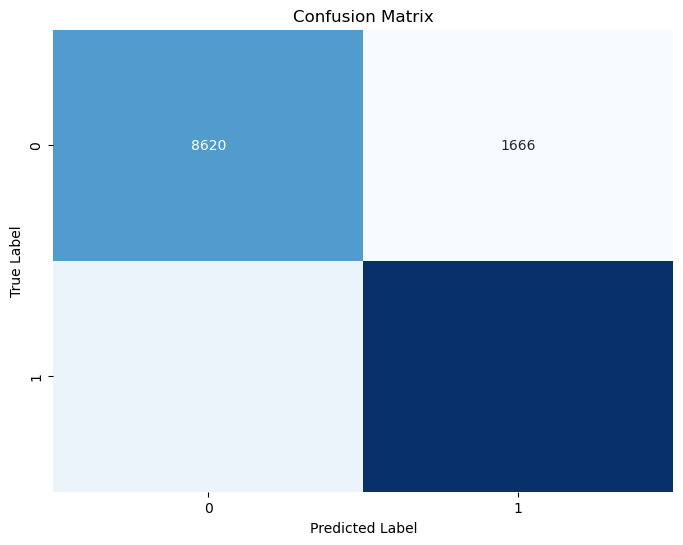

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

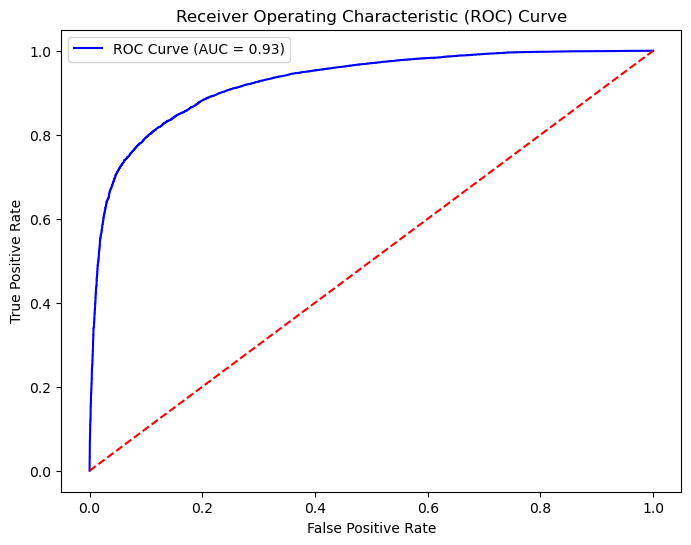

In [123]:

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

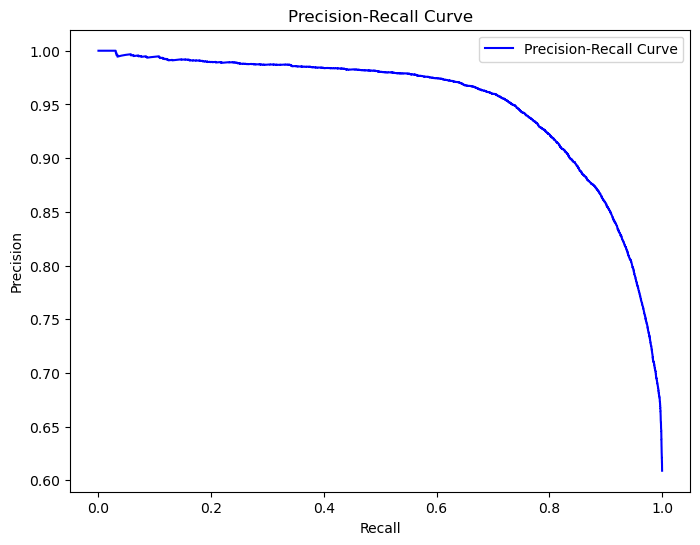

In [124]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

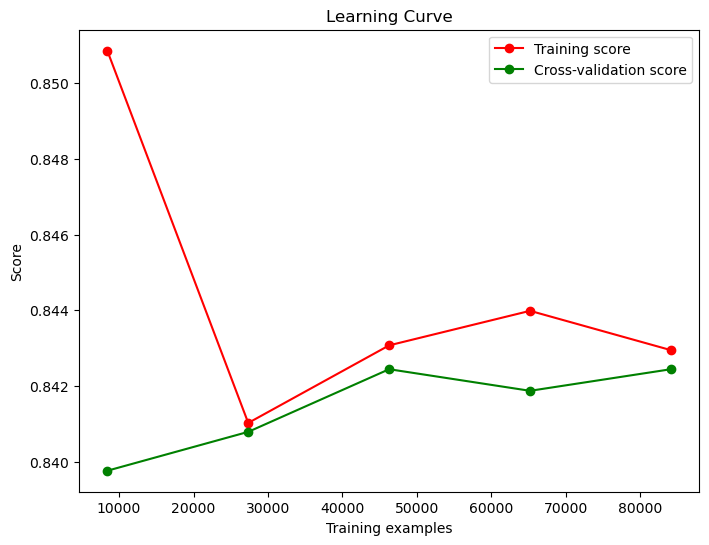

In [125]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train, y_train, cv=kfold, scoring=scoring_metric)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


###### Checking if prediction model is working:

Applying random data from dataFrame X to predict y.

In [126]:
import random

In [127]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return random_data

random_data = random_data_generator(X)
print(random_data)


[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 25]


In [128]:
random_data_reshaped = np.array(random_data).reshape(1, -1)
print(logreg.predict(random_data_reshaped))

[1.]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Applying data from a specific row in X to check if output matches the y.

In [141]:
row_indexDF = 86409
row_XDF = pd.DataFrame(X.iloc[row_indexDF]).T
row_XDF.columns = X.columns
row_XDF

,Related Non-Motorist_BICYCLIST,Related Non-Motorist_IN ANIMAL-DRAWN VEH,Related Non-Motorist_MACHINE OPERATOR/RIDER,Related Non-Motorist_NON,Related Non-Motorist_OTHER,Related Non-Motorist_PEDESTRIAN,Related Non-Motorist_UNKNOWN,Collision Type_ANGLE MEETS LEFT HEAD ON,Collision Type_ANGLE MEETS LEFT TURN,Collision Type_ANGLE MEETS RIGHT TURN,Collision Type_HEAD ON,Collision Type_HEAD ON LEFT TURN,Collision Type_OPPOSITE DIR BOTH LEFT TURN,Collision Type_OPPOSITE DIRECTION SIDESWIPE,Collision Type_OTHER,Collision Type_SAME DIR BOTH LEFT TURN,Collision Type_SAME DIR REAR END,Collision Type_SAME DIR REND LEFT TURN,Collision Type_SAME DIR REND RIGHT TURN,Collision Type_SAME DIRECTION LEFT TURN,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Collision Type_UNKNOWN,"Weather_BLOWING SAND, SOIL, DIRT",Weather_BLOWING SNOW,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_OTHER,Weather_RAINING,Weather_SEVERE WINDS,Weather_SLEET,Weather_SNOW,Weather_UNKNOWN,Weather_WINTRY MIX,Surface Condition_DRY,Surface Condition_ICE,"Surface Condition_MUD, DIRT, GRAVEL",Surface Condition_OIL,Surface Condition_OTHER,Surface Condition_SAND,Surface Condition_SLUSH,Surface Condition_SNOW,Surface Condition_UNKNOWN,Surface Condition_WATER(STANDING/MOVING),Surface Condition_WET,Light_DARK -- UNKNOWN LIGHTING,Light_DARK LIGHTS ON,Light_DARK NO LIGHTS,Light_DAWN,Light_DAYLIGHT,Light_DUSK,Light_OTHER,Light_UNKNOWN,Traffic Control_FLASHING TRAFFIC SIGNAL,Traffic Control_NO CONTROLS,Traffic Control_OTHER,Traffic Control_PERSON,Traffic Control_RAILWAY CROSSING DEVICE,Traffic Control_SCHOOL ZONE SIGN DEVICE,Traffic Control_STOP SIGN,Traffic Control_TRAFFIC SIGNAL,Traffic Control_UNKNOWN,Traffic Control_WARNING SIGN,Traffic Control_YIELD SIGN,Driver Substance Abuse_ALCOHOL PRESENT,Driver Substance Abuse_COMBINED SUBSTANCE PRESENT,Driver Substance Abuse_ILLEGAL DRUG PRESENT,Driver Substance Abuse_MEDICATION PRESENT,Driver Substance Abuse_NONE DETECTED,Driver Substance Abuse_OTHER,Driver Substance Abuse_UNKNOWN,Non-Motorist Substance Abuse_ALCOHOL PRESENT,Non-Motorist Substance Abuse_COMBINED SUBSTANCE PRESENT,Non-Motorist Substance Abuse_ILLEGAL DRUG PRESENT,Non-Motorist Substance Abuse_MEDICATION PRESENT,Non-Motorist Substance Abuse_NON,Non-Motorist Substance Abuse_NONE DETECTED,Non-Motorist Substance Abuse_OTHER,Non-Motorist Substance Abuse_UNKNOWN,Driver Distracted By_ADJUSTING AUDIO AND OR CLIMATE CONTROLS,Driver Distracted By_BY MOVING OBJECT IN VEHICLE,Driver Distracted By_DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT,Driver Distracted By_EATING OR DRINKING,Driver Distracted By_INATTENTIVE OR LOST IN THOUGHT,Driver Distracted By_LOOKED BUT DID NOT SEE,Driver Distracted By_MOBILEPHONE,Driver Distracted By_NO DRIVER PRESENT,Driver Distracted By_NOT DISTRACTED,Driver Distracted By_OTHER DISTRACTION,Driver Distracted By_SMOKING RELATED,Driver Distracted By_UNKNOWN,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL,Vehicle Damage Extent_UNKNOWN,Vehicle Body Type_AMBULANCE/EMERGENCY,Vehicle Body Type_AMBULANCE/NON EMERGENCY,Vehicle Body Type_BUS,Vehicle Body Type_CAR,Vehicle Body Type_FARM VEHICLE,Vehicle Body Type_FIRE VEHICLE/EMERGENCY,Vehicle Body Type_FIRE VEHICLE/NON EMERGENCY,Vehicle Body Type_MOTORCYCLE,Vehicle Body Type_OTHER,Vehicle Body Type_PICKUP TRUCK,Vehicle Body Type_POLICE VEHICLE/EMERGENCY,Vehicle Body Type_POLICE VEHICLE/NON EMERGENCY,Vehicle Body Type_TRUCK,Vehicle Body Type_TRUCK TRACTOR,Vehicle Body Type_UNKNOWN,Vehicle Body Type_VAN,Vehicle Movement_ACCELERATING,Vehicle Movement_BACKING,Vehicle Movement_CHANGING LANES,Vehicle Movement_DRIVERLESS MOVING VEH.,Vehicle Movement_ENTERING TRAFFIC LANE,Vehicle Movement_LEAVING TRAFFIC LANE,Vehicle Movement_MAKING LEFT TURN,Vehicle Movement_MAKING RIGHT TURN,Vehic

In [129]:
row_index = 86409
row_X = np.array(X.iloc[row_index]).reshape(1, -1)

print(row_X)

row_y = np.array(y.iloc[row_index])

print(row_y)

print(logreg.predict(row_X))

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1. 35.]]
0.0
[0.]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


###### Saving the model:

In [130]:
import pickle

pickle.dump(logreg, open('logreg_model.pkl', 'wb'))

In [131]:
with open('logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

###### Validating if the model saved in file is working:

In [132]:
predict = loaded_model.predict(row_X)
predict

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.])

In [133]:
proba = logreg.predict_proba(random_data_reshaped)
print(proba)

[[0.06241009 0.93758991]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
predicted_class = loaded_model.predict(random_data_reshaped)[0]

probability_predicted_class = proba[0, int(predicted_class)] * 100

print("Probability of the predicted class (class {}): {:.2f}%".format(int(predicted_class), probability_predicted_class))

Probability of the predicted class (class 1): 93.76%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##### In Visual Studio the was built the web appliction with streamlit framework for the frontend and the model running in the backend.

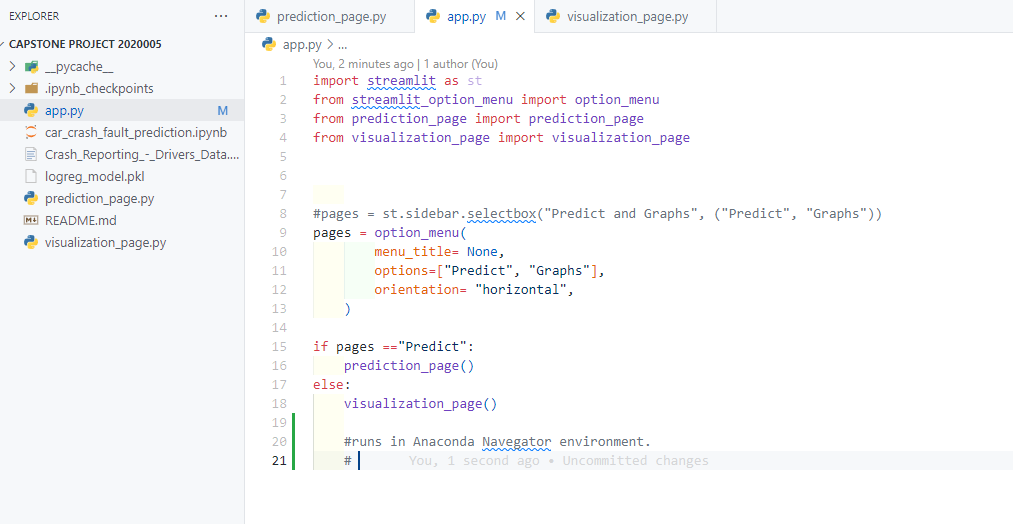

#### Web app created with streamlit.

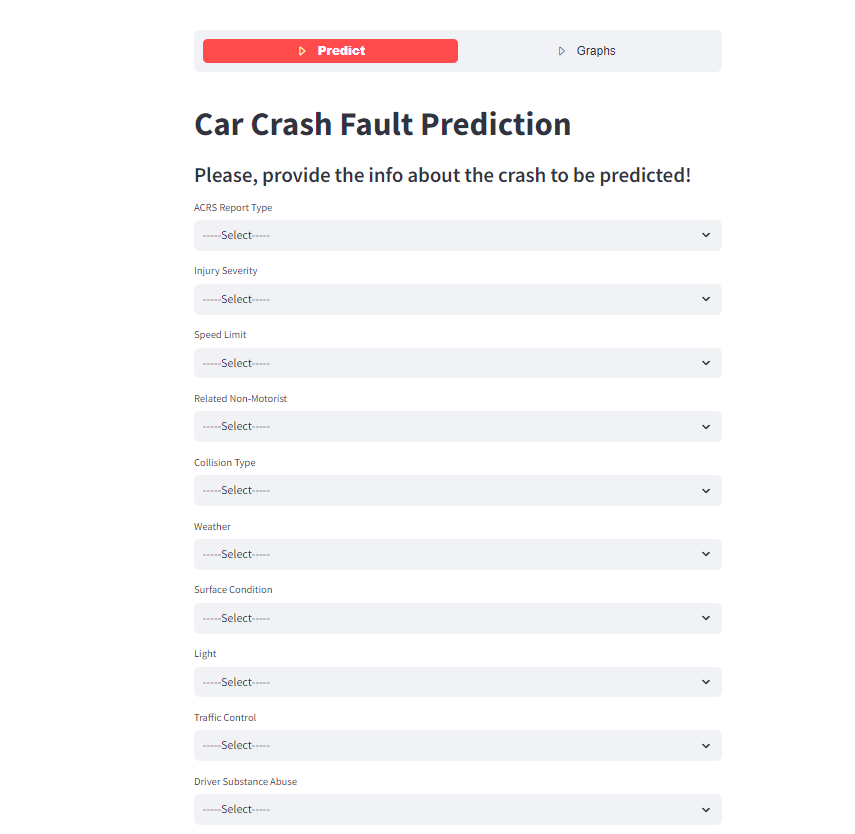